# Đồ án Cuối Kỳ - Nhóm 23

## **1. Data Collection**

### **1.1. Chủ đề của bộ dữ liệu mà nhóm lựa chọn**
- Dữ liệu nói về thói quen sử dụng điện thoại thông minh và mức độ “nghiện” điện thoại ở thanh thiếu niên - bao gồm thông tin về thời gian sử dụng, tần suất sử dụng, cũng như các chỉ số liên quan đến sức khỏe, học tập, tâm lý, v.v.
- Bối cảnh thực tế: phản ánh hành vi sử dụng điện thoại thông minh trong nhóm tuổi thiếu niên - từ đó có thể phân tích xem việc dùng điện thoại ảnh hưởng như thế nào đến giấc ngủ, học tập, cảm xúc, sức khỏe tâm thần...

### **1.2. Nguồn gốc của bộ dữ liệu**
- Nền tảng: Kaggle. Link đầy đủ: [Teen Smartphone Usage and Addiction Impact Dataset
](https://www.kaggle.com/datasets/sumedh1507/teen-phone-addiction?brid=0i4ntFyCRqVKUnM6KOK12Q).
- Tác giả: Dataset do người dùng “sumedh1507” đăng tải trên Kaggle.
- Thời gian: dữ liệu được cập nhật công khai vào khoảng 5 tháng trước.

### **1.3. Cấp phép sử dụng bộ dữ liệu**
Bộ dữ liệu được tác giả cấp quyền **CC0** - Creative Commons Zero, nghĩa là tác giả cho phép người dùng có toàn quyền sử dụng bộ dữ liệu này mà không cần xin phép tác giả.

### **1.4. Cách bộ dữ liệu này được thu thập**
- Phương pháp thu thập kết quả: Sử dụng khảo sát.
- Đối tượng mục tiêu và phương pháp lấy mẫu: Học sinh trung học và các sinh viên vừa vào đại học (từ 13-19 tuổi) điền vào mẫu khảo sát.
- Khoảng thời gian thu thập dữ liệu: Dữ liệu được thu thập trong khoảng thời gian 3 tháng tại một số trường học ở thành thị và bán thành thị.
- Bất kỳ hạn chế nào xuất hiện trong quá trình khảo sát: Tác giả không ghi nhận.

### **1.5. Lý do nhóm chọn bộ dữ liệu này**
- Chủ đề “nghiện điện thoại ở thanh thiếu niên” rất thực tiễn và gần gũi - liên quan đến giáo dục, sức khỏe tâm thần, thói quen sống; phù hợp để khám phá ảnh hưởng công nghệ đến xã hội hiện đại, khi mà thế hệ Gen Z đang bị gán rất nhiều "định kiến" về sự phụ thuộc vào công nghệ.
- Ngoài ra, với bộ dữ liệu này, sẽ có rất nhiều insight bổ ích được phân tích. Ví dụ như:
    - Độ tuổi/giới tính nào có tỷ lệ "nghiện" điện thoại thông minh nhiều hơn?
    - Liệu thời gian dùng điện thoại có ảnh hưởng đến mức độ lo âu, giấc ngủ, hay kết quả học tập?
    - Mức độ thân thiết giữa gia đình và con cái có khiến tỷ lệ các bạn sử dụng điện thoại thông minh nhiều hơn?

## **2. Data Exploration**

Để bắt đầu quá trình phân tích dữ liệu, trước tiên cần hiểu rõ cấu trúc, chất lượng và đặc điểm tổng quan của bộ dữ liệu. Việc khám phá dữ liệu giúp nhóm đánh giá mức độ đầy đủ, tính chính xác, cũng như các vấn đề tồn tại trong dữ liệu trước khi tiến hành đặt câu hỏi nghiên cứu và xây dựng mô hình phân tích.

### **2.1. Tổng quan về bộ dữ liệu**
#### 2.1.1. Các thông tin cơ bản

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

project_root = os.path.abspath("..")
sys.path.append(project_root)

from src.data_processing import *
from src.visualization import *
from src.models import *

sns.set(style='whitegrid', rc={'figure.figsize': (8,5)})

df = pd.read_csv('../data/raw/teen_phone_addiction_dataset.csv')

In [2]:
print("===== BASIC INFORMATION =====")

# 1. Số dòng
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

# 2. Số cột
num_cols = df.shape[1]
print(f"Number of columns: {num_cols}")

# 3. Mỗi dòng đại diện cho điều gì
print("\nEach row represents: One teenager's smartphone usage profile and related behavioral/mental health attributes.")

# 4. Kích thước tổng dataset
dataset_size_bytes = df.memory_usage(deep=True).sum()
dataset_size_mb = dataset_size_bytes / (1024**2)

print(f"\nOverall dataset size: {dataset_size_mb:.2f} MB")

print("\n\n===== FIRST 5 ROWS OF THE DATASET =====")
display(df.head())

===== BASIC INFORMATION =====
Number of rows: 3000
Number of columns: 25

Each row represents: One teenager's smartphone usage profile and related behavioral/mental health attributes.

Overall dataset size: 1.39 MB


===== FIRST 5 ROWS OF THE DATASET =====


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


#### 2.1.2. Tính toàn vẹn dữ liệu

In [3]:
print("===== DATA INTEGRITY =====")

# 1. Kiểm tra số hàng trùng lặp
dup_count = df.duplicated().sum()
print(f"Number of duplicated rows: {dup_count}")

# Hiển thị các dòng trùng (nếu cần xem chi tiết)
if dup_count > 0:
    display(df[df.duplicated()])

# 2. Kiểm tra số hàng trống hoàn toàn
empty_rows = df.isnull().all(axis=1).sum()
print(f"Number of entirely empty rows: {empty_rows}")

# Hiển thị các dòng trống nếu có
if empty_rows > 0:
    display(df[df.isnull().all(axis=1)])

# 3. Kiểm tra tổng số giá trị thiếu
missing_values_total = df.isnull().sum().sum()
print(f"Total missing values across dataset: {missing_values_total}")

===== DATA INTEGRITY =====
Number of duplicated rows: 0
Number of entirely empty rows: 0
Total missing values across dataset: 0


**1. Các dòng trùng lặp**
- Kết quả kiểm tra cho thấy không có dòng nào bị trùng lặp trong toàn bộ bộ dữ liệu.
- Điều này nghĩa là mỗi dòng dữ liệu đều đại diện cho một người tham gia khác nhau, không có bản ghi bị lặp lại.

**Kết luận**: Không cần xử lý hoặc loại bỏ bất kỳ dòng nào do trùng lặp.

**2. Các dòng trống hoàn toàn**
- Dataset không có bất kỳ dòng nào trống hoàn toàn.
- Tất cả các dòng đều chứa ít nhất một giá trị hợp lệ, nghĩa là không có hàng “rác” trong dữ liệu.

**Kết luận**: Không cần xóa dòng nào vì không có hàng trống.

**3. Giá trị thiếu**
- Kết quả cho thấy dataset có 0 giá trị thiếu trên tất cả các cột.
- Điều này thể hiện dữ liệu được chuẩn hóa và thu thập khá tốt (có thể là do tác giả đặt ràng buộc "bắt buộc điền" ở tất cả các câu hỏi), không cần tiền xử lý cho missing values.

**Kết luận**: Dataset hoàn toàn đầy đủ, không có missing values, thuận lợi cho việc phân tích trực tiếp.

#### 2.1.3. Phân tích các cột dữ liệu

**1. Ý nghĩa từng cột**
Dựa trên mô tả dataset, các cột có ý nghĩa như sau:
- `ID`: Mã định danh của từng người tham gia khảo sát.
- `Name`: Tên của người tham gia.
- `Age`: Tuổi.
- `Gender`: Giới tính.
- `Location`: Khu vực sinh sống.
- `School_Grade`: Khối học hiện tại.
- `Daily_Usage_Hours`: Tổng thời gian (theo giờ) sử dụng điện thoại mỗi ngày.
- `Sleep_Hours`: Số giờ ngủ trung bình mỗi ngày.
- `Academic_Performance`: Điểm học tập ở trường (theo thang điểm 100).
- `Social_Interactions`: Mức độ tương tác xã hội (theo thang điểm 10).
- `Exercise_Hours`: Số giờ tập thể dục mỗi tuần.
- `Anxiety_Level`: Mức độ lo âu (theo thang điểm 10).
- `Depression_Level`: Mức độ trầm cảm (theo thang điểm 10).
- `Self_Esteem`: Lòng tự tôn (theo thang điểm 10).
- `Parental_Control`: Mức độ kiểm soát của phụ huynh (theo thang điểm 10).
- `Screen_Time_Before_Bed`: Số giờ sử dụng điện thoại trước khi bắt đầu ngủ.
- `Phone_Checks_Per_Day`: Số lần kiểm tra điện thoại mỗi ngày.
- `Apps_Used_Daily`: Số ứng dụng sử dụng trong một ngày.
- `Time_on_Social_Media`: Thời gian dùng điện thoại cho việc lướt mạng xã hội.
- `Time_on_Gaming`: Thời gian sử dụng điện thoại để chơi game.
- `Time_on_Education`: Thời gian dùng điện thoại cho mục đích học tập.
- `Phone_Usage_Purpose`: Mục đích sử dụng chính (browsing/gaming/education…).
- `Family_Communication`: Mức độ giao tiếp thường xuyên với gia đình (theo thang điểm 10).
- `Weekend_Usage_Hours`: Số giờ dành ra vào ngày cuối tuần để sử dụng điện thoại.
- `Addiction_Level`: Mức độ nghiện điện thoại.

**2. Những cột quan trọng và phù hợp phân tích**
Tùy hướng nghiên cứu, các cột sau rất có giá trị:
- Phân tích hành vi sử dụng điện thoại:
    - `Daily_Usage_Hours`
    - `Apps_Used_Daily`
    - `Time_on_Social_Media`
    - `Time_on_Gaming`
    - `Time_on_Education`
    - `Screen_Time_Before_Bed`
    - `Phone_Checks_Per_Day`
    - `Phone_Usage_Purpose`
    - `Addiction_Level`
    - `Weekend_Usage_Hours`

- Phân tích tác động đến giấc ngủ, học tập, sức khỏe:
    - `Sleep_Hours`
    - `Academic_Performance`
    - `Exercise_Hours`
    - `Anxiety_Level`
    - `Depression_Level`
    - `Self_Esteem`
      
- Phân tích những yếu tố khách quan tác động:
    - `Social_Interactions`
    - `Parental_Control`
    - `Family_Communication`

- Nhân khẩu học:
    - `Age`
    - `Gender`
    - `School_Grade`

- Dùng cho mô hình dự đoán
Feature tốt cho ML:
    - `Daily_Usage_Hours`
    - `Phone_Checks_Per_Day`
    - `Time_on_Social_Media`
    - `Time_on_Gaming`
    - `Sleep_Hours`
    - `Exercise_Hours`
    - `Academic_Performance`
    - `Social_Interactions`

**3. Những cột nên được loại bỏ**
- `Name`: Dữ liệu định danh, không mang giá trị phân tích nên loại.
- `ID`: Dùng để phân biệt dòng nhưng không có ý nghĩa thống kê nên vẫn giữ để tracking, nhưng loại khỏi phân tích & mô hình ML.
- `Location`: Không có quá nhiều phân tích quan trọng liên quan đến địa điểm nơi ở nên loại.

In [4]:
cols_to_drop = ["Name", "ID", "Location"]

df = df.drop(columns=cols_to_drop)

#### 2.1.4. Loại dữ liệu của từng cột

In [5]:
print("===== DATA TYPES =====")
print(df.dtypes)

# 1. Kiểm tra các cột numeric nhưng lưu dạng object (text)
numeric_suspects = df.select_dtypes(include='object').columns
print("\nColumns stored as object:")
print(numeric_suspects)

# 2. Thử convert để xem cột nào thực ra là số
for col in numeric_suspects:
    try:
        df[col].astype(float)
        print(f"Potential numeric column stored as object: {col}")
    except:
        pass

===== DATA TYPES =====
Age                         int64
Gender                     object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object

Columns stored as object:
Index(['Gender', 'School_Grade', 'Phone_Usage_Purpose'], dtype='object')


Một số cột hiện đang có kiểu `object` nhưng thực chất là thông tin phân loại (`categorical`), không phải kiểu chuỗi thuần: `Gender`, `Phone_Usage_Purpose`. Ngoài ra, cần chuyển `School_Grade` về kiểu dữ liệu `int` để thuận tiện cho việc phân tích. 

In [6]:
# 1. Chuyển thành categorical
cat_cols = ['Gender', 'Phone_Usage_Purpose']
for col in cat_cols:
    df[col] = df[col].astype('category')

# 2. Chuyển School_Grade thành int
df['School_Grade'] = df['School_Grade'].str.extract(r'(\d+)').astype(int)
df['School_Grade'] = df['School_Grade'].astype('int64')

print("===== DATA TYPES =====")
print(df.dtypes)

===== DATA TYPES =====
Age                          int64
Gender                    category
School_Grade                 int64
Daily_Usage_Hours          float64
Sleep_Hours                float64
Academic_Performance         int64
Social_Interactions          int64
Exercise_Hours             float64
Anxiety_Level                int64
Depression_Level             int64
Self_Esteem                  int64
Parental_Control             int64
Screen_Time_Before_Bed     float64
Phone_Checks_Per_Day         int64
Apps_Used_Daily              int64
Time_on_Social_Media       float64
Time_on_Gaming             float64
Time_on_Education          float64
Phone_Usage_Purpose       category
Family_Communication         int64
Weekend_Usage_Hours        float64
Addiction_Level            float64
dtype: object


### **2.2. Phân tích các cột Numeric**
#### 2.2.1. Distribution & Central Tendency

Numeric columns: ['Age', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']

===== NUMERICAL SUMMARY STATISTICS =====


,mean,median,std
Age,15.969667,16.0,1.989489
School_Grade,9.518667,9.0,1.715605
Daily_Usage_Hours,5.020667,5.0,1.956501
Sleep_Hours,6.489767,6.5,1.490713
Academic_Performance,74.947333,75.0,14.684156
Social_Interactions,5.097667,5.0,3.139333
Exercise_Hours,1.040667,1.0,0.734620
Anxiety_Level,5.590000,6.0,2.890678
Depression_Level,5.460333,5.0,2.871557
Self_Esteem,5.546333,6.0,2.860754


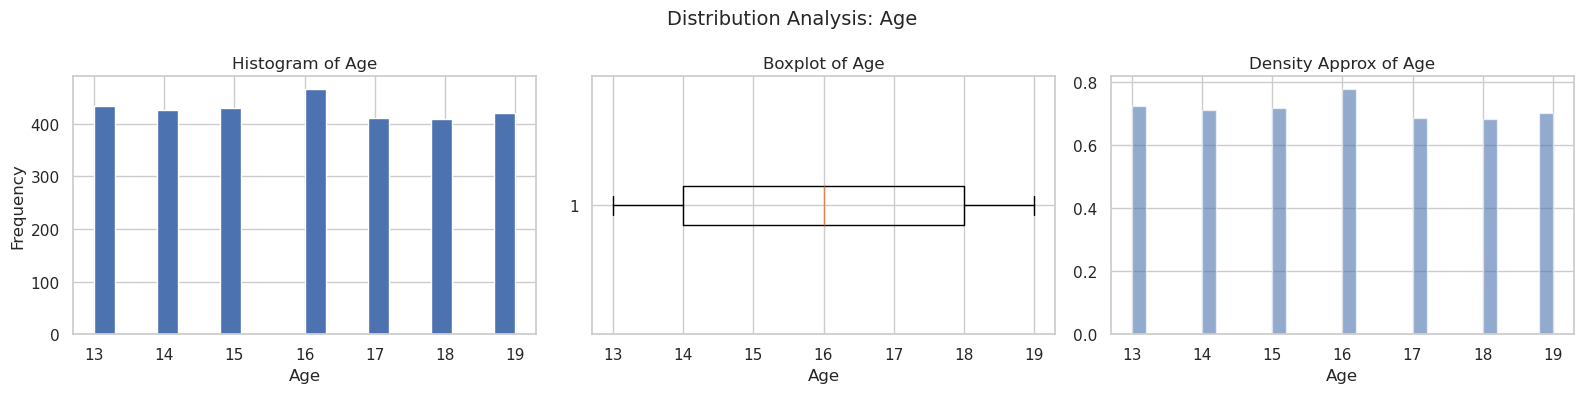

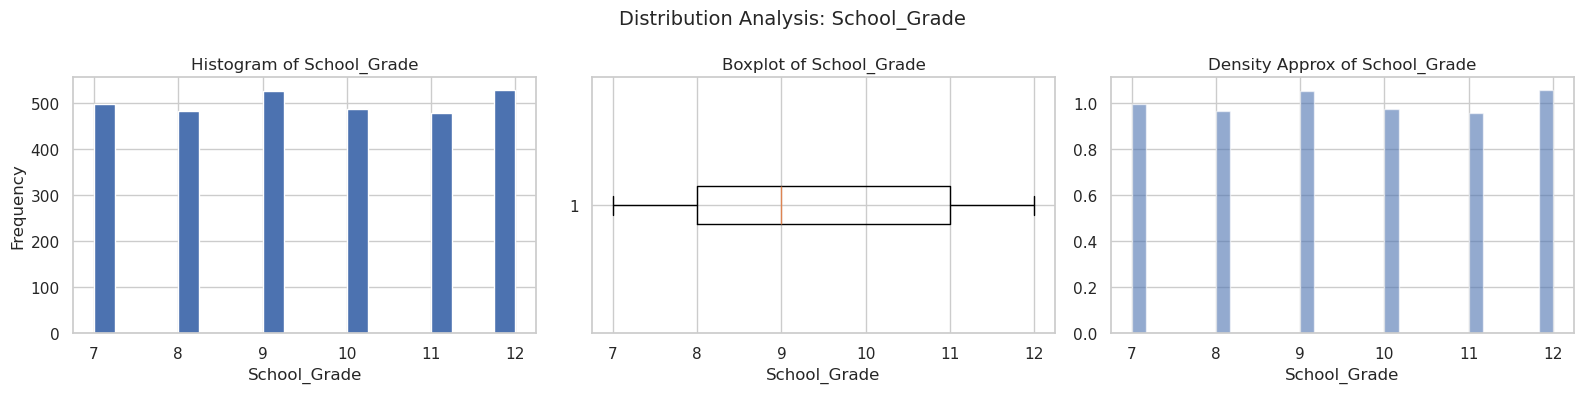

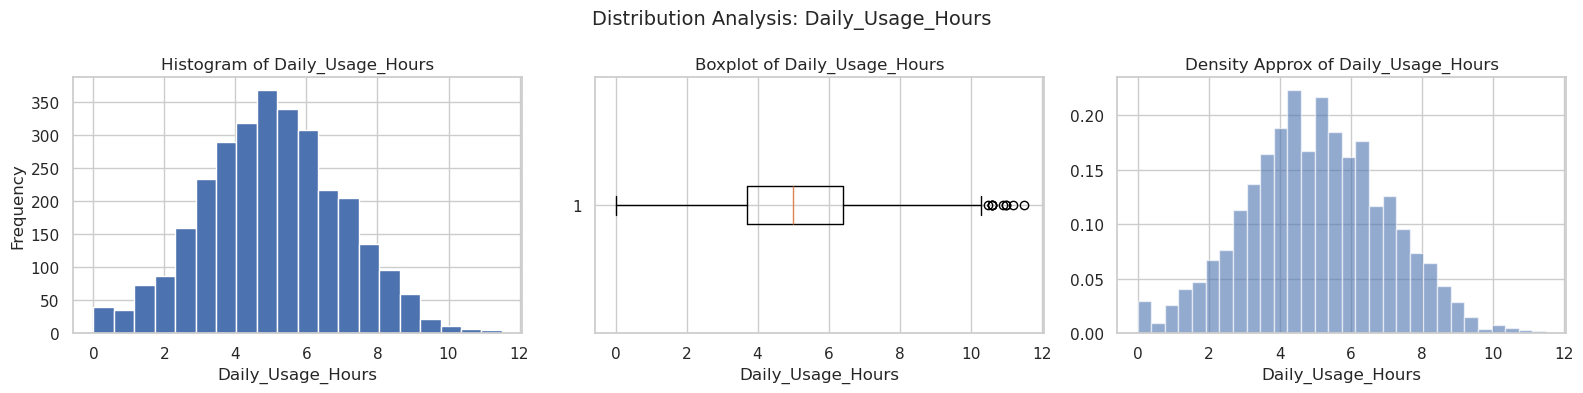

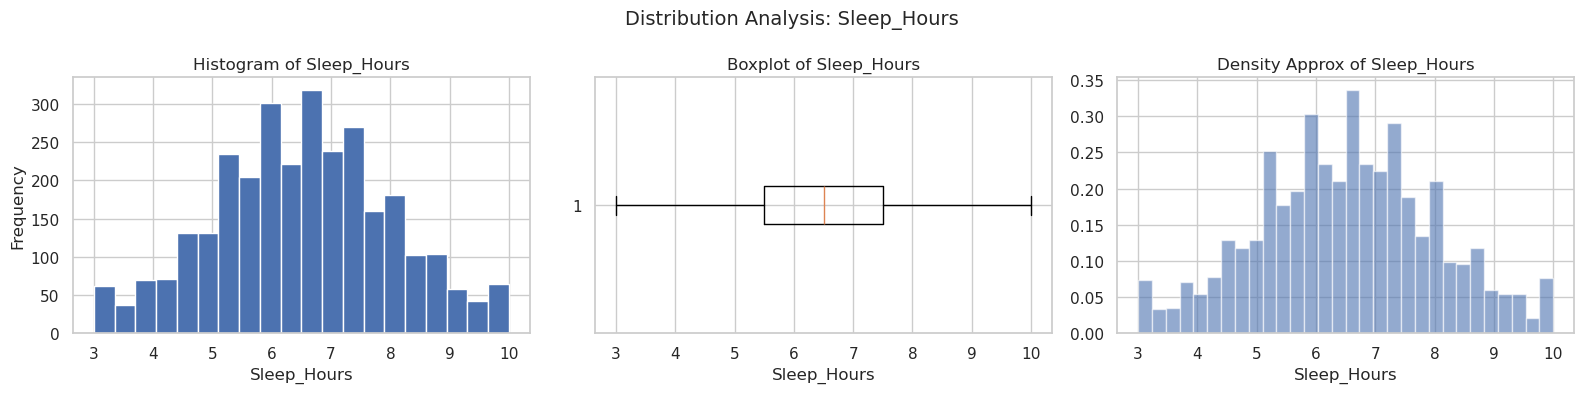

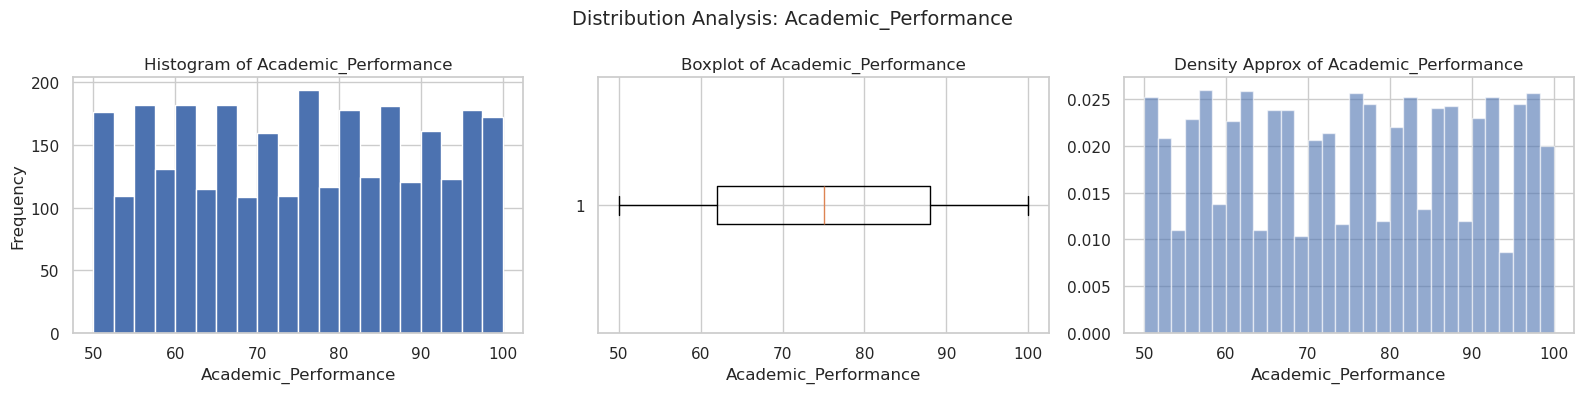

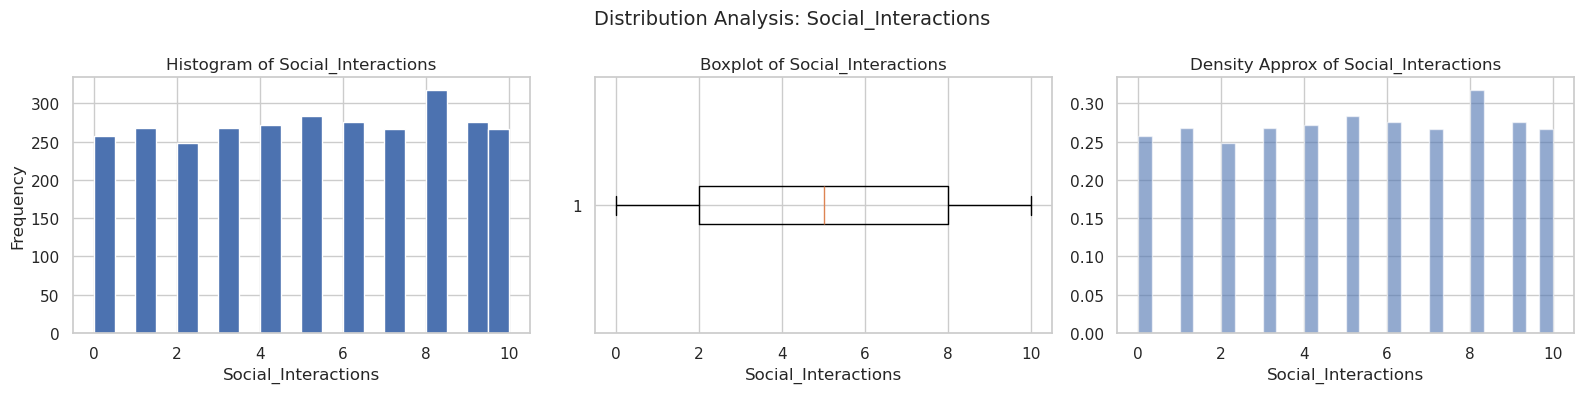

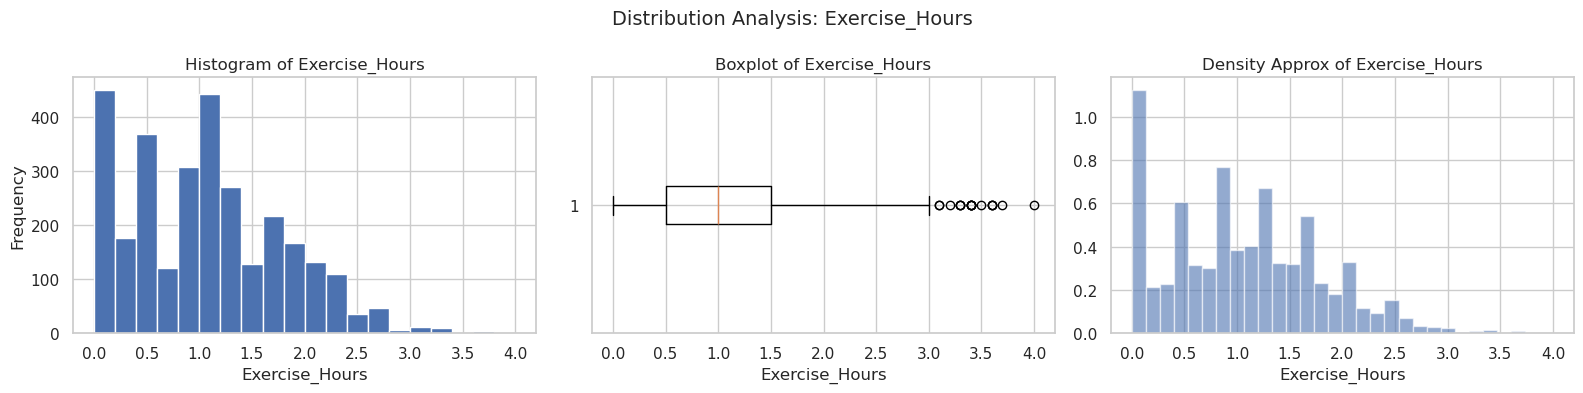

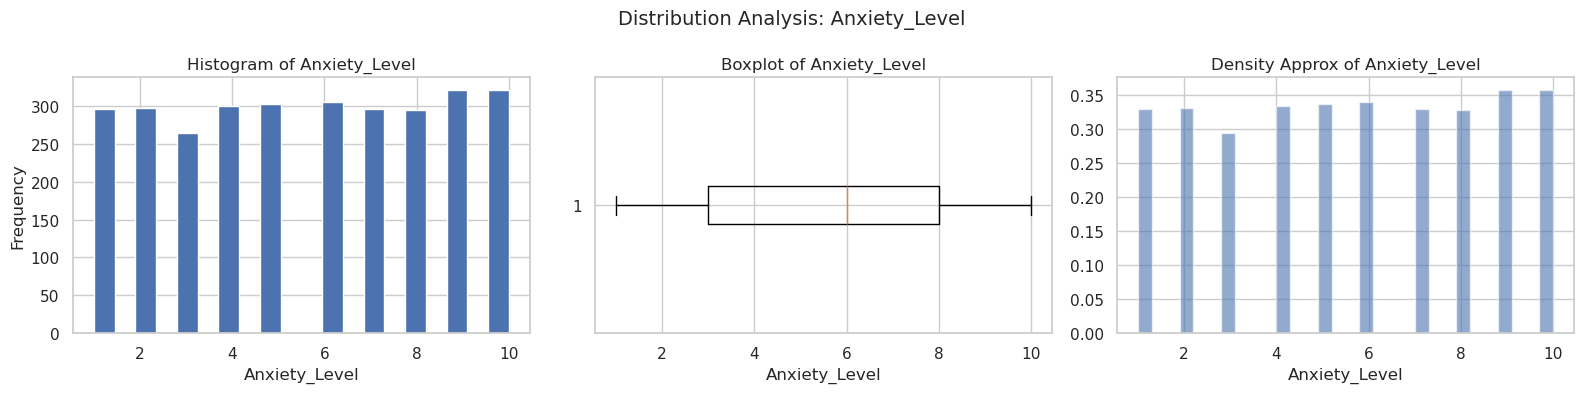

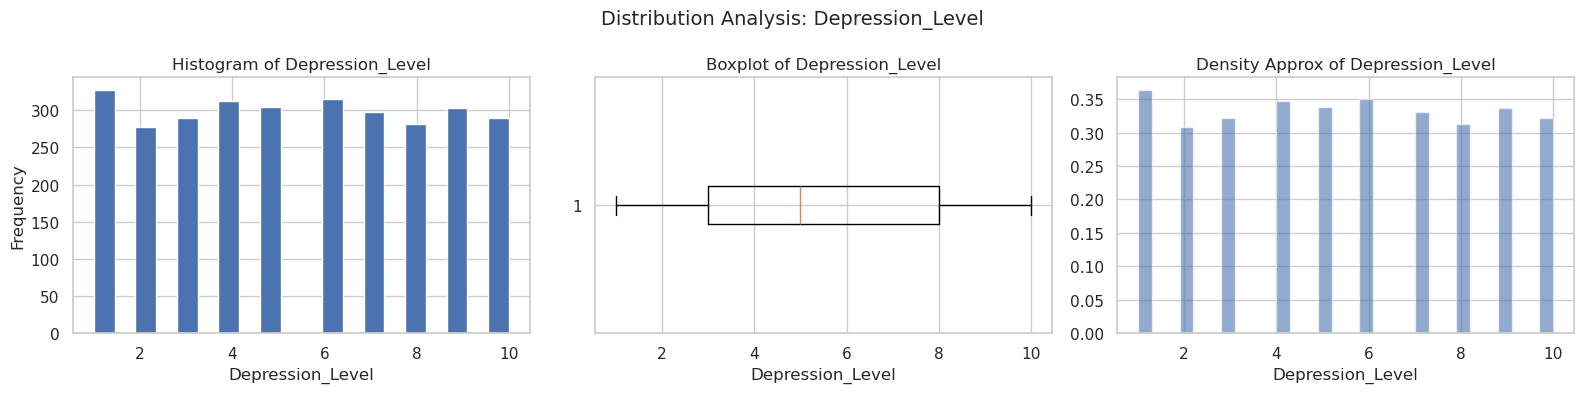

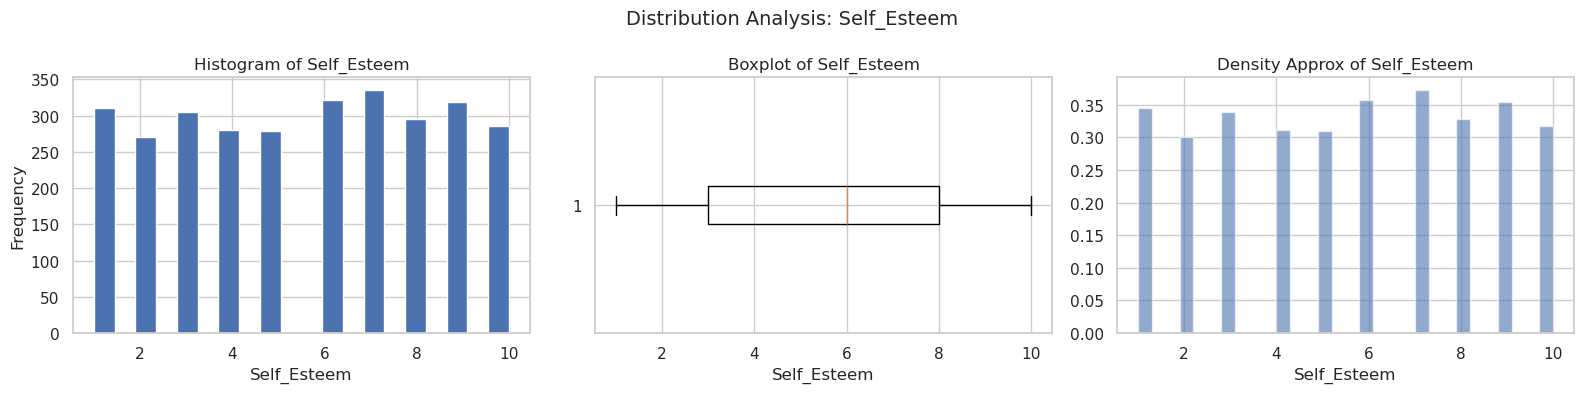

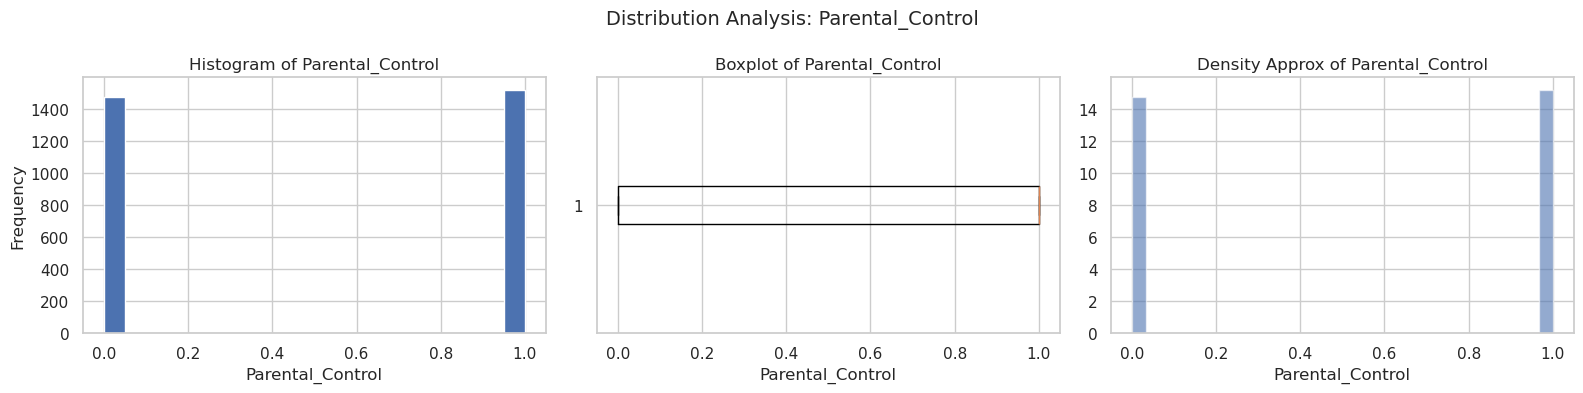

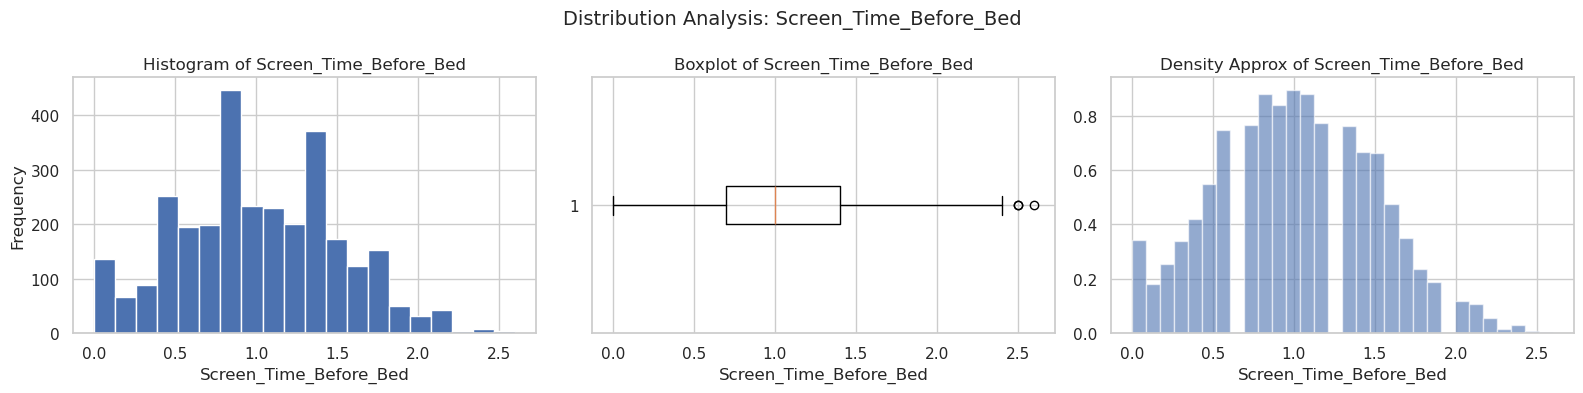

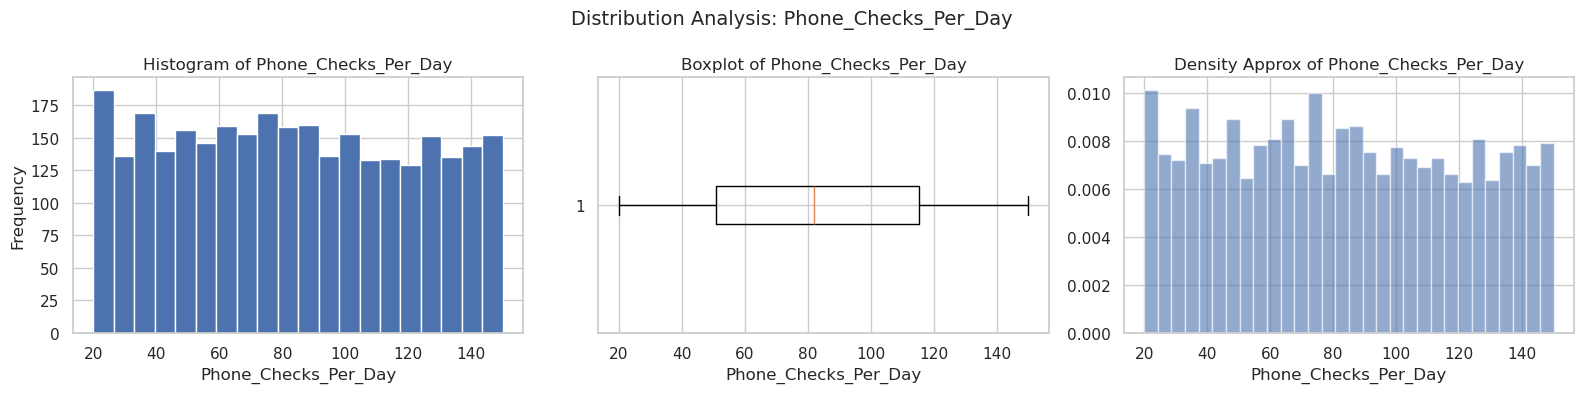

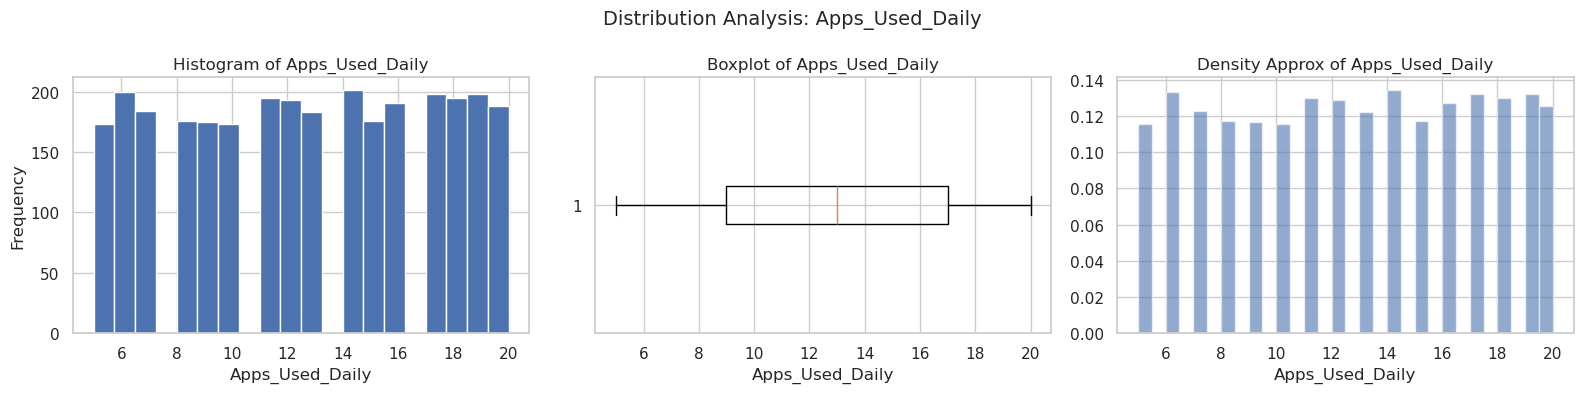

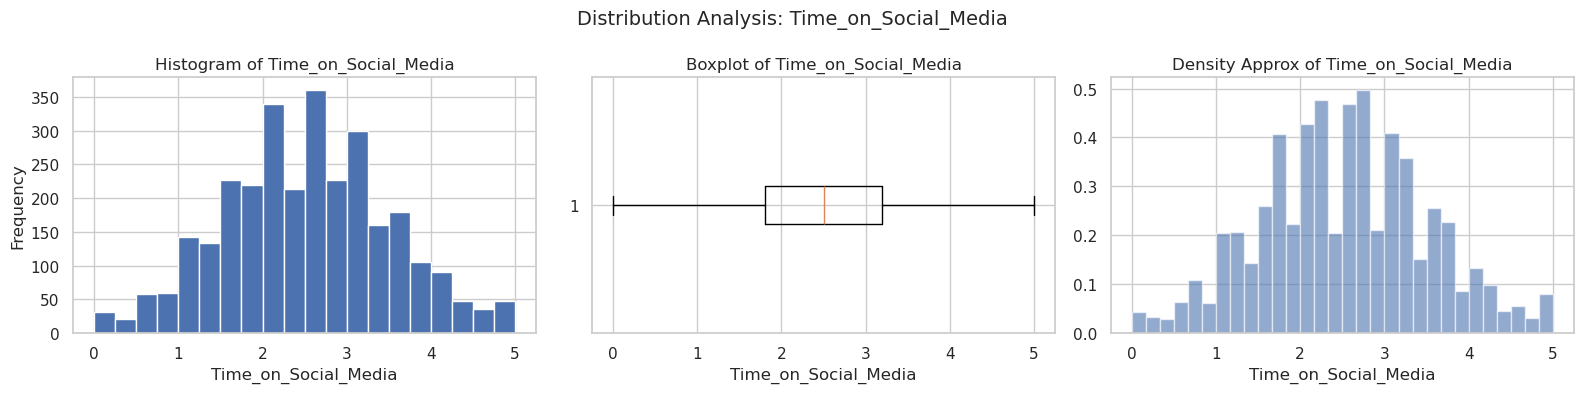

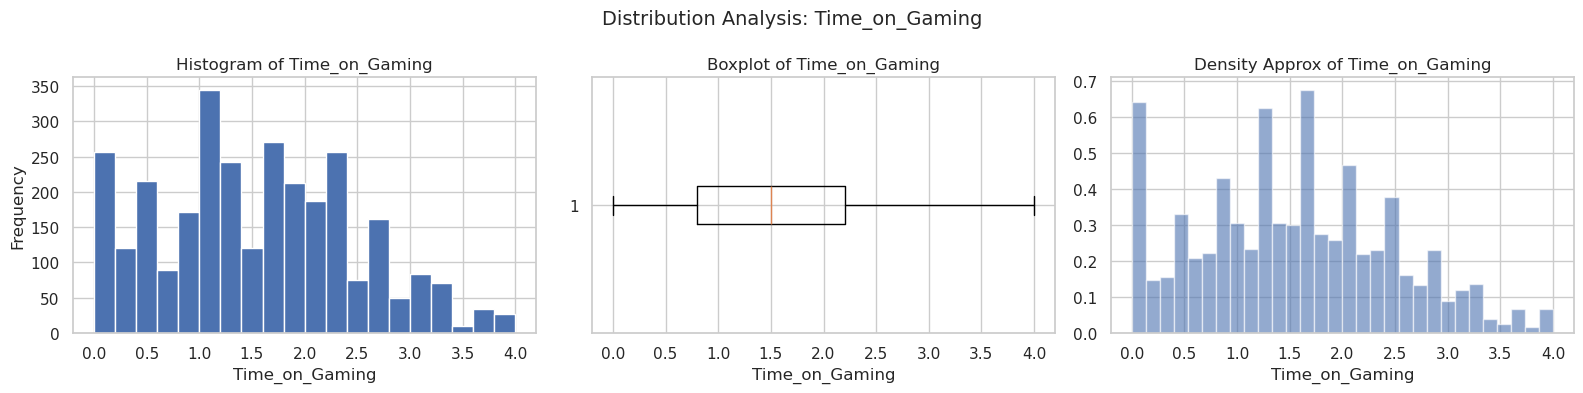

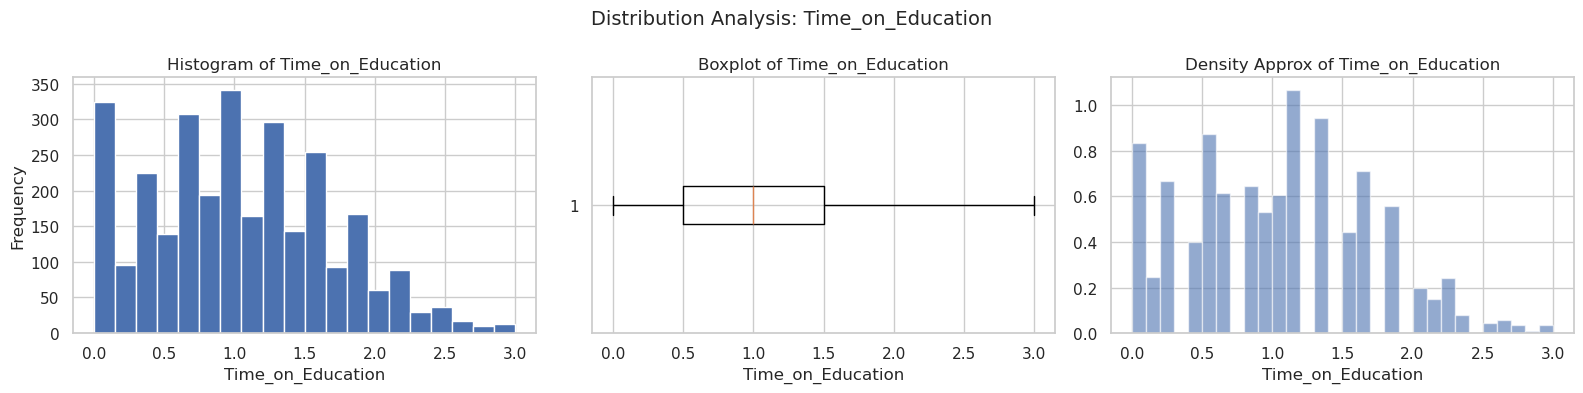

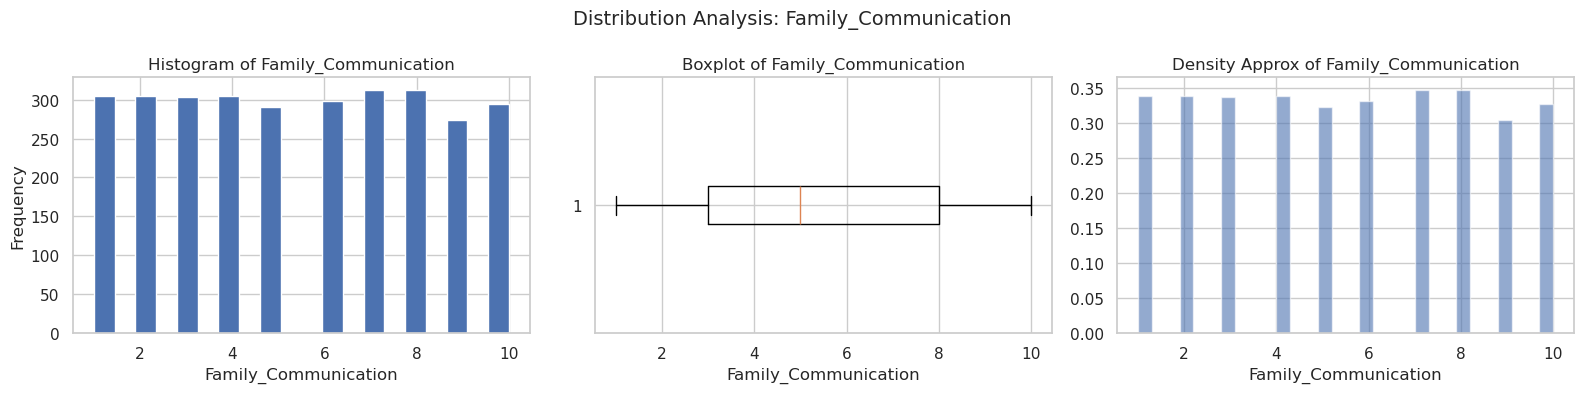

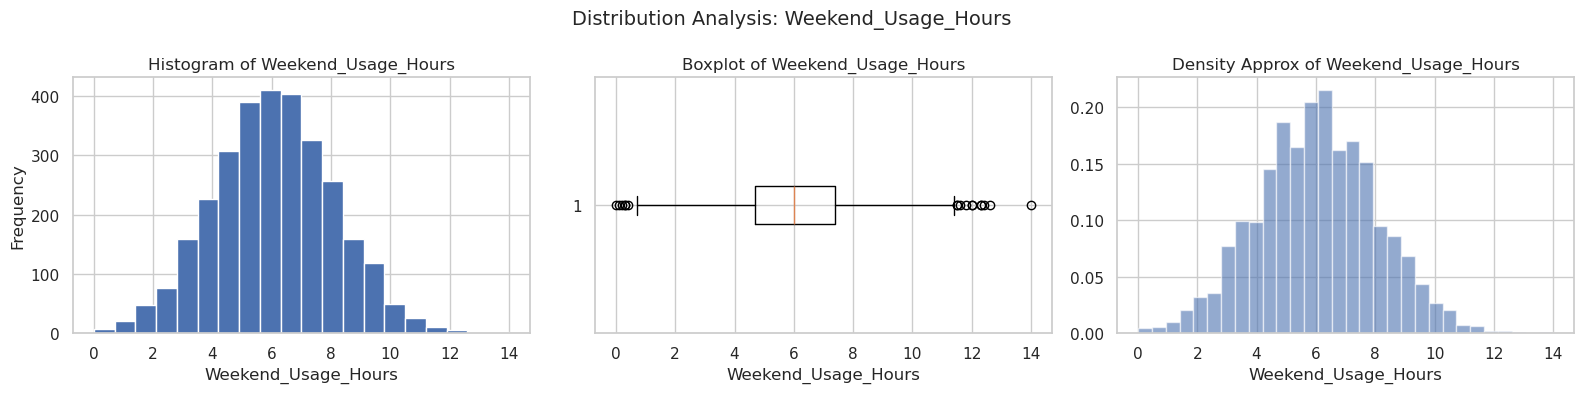

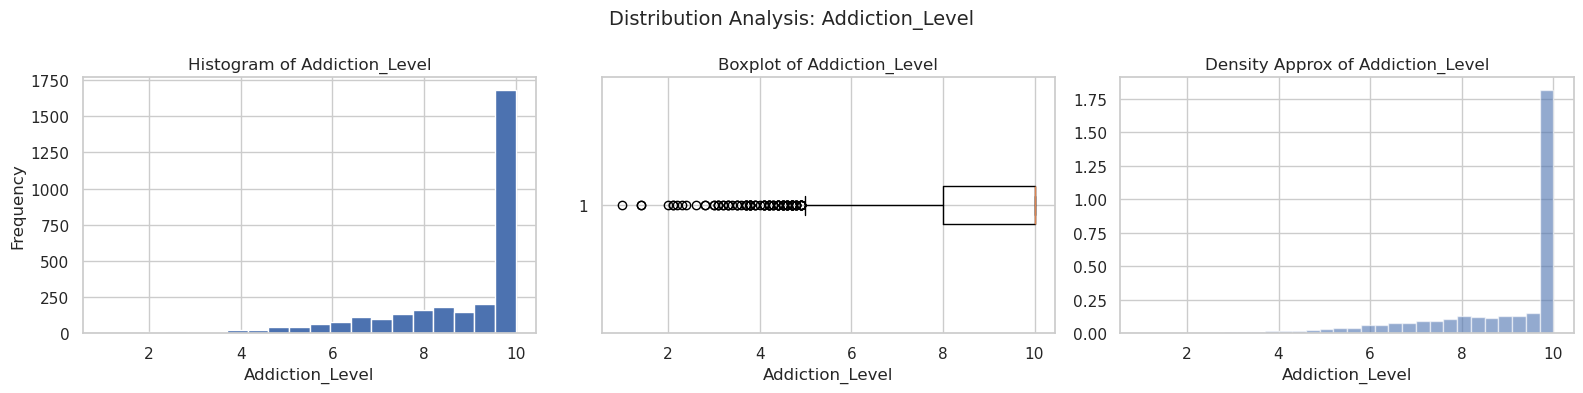

In [7]:
# 1. Lấy danh sách các cột dạng numerical
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(numeric_cols))

# 2. Bảng thống kê mean – median – std
stats = df[numeric_cols].agg(['mean', 'median', 'std']).T
print("\n===== NUMERICAL SUMMARY STATISTICS =====")
display(stats)

# 3. Vẽ biểu đồ
plot_all_numeric(df)

Dựa trên histogram, boxplot và density approximation của các biến số, có thể rút ra các nhận xét về hình dạng phân phối (distribution shape) như sau:
- `Age`, `School_Grade`: Phân phối của hai biến này gần như uniform (**đồng đều**). Các cột histogram có chiều cao tương đối tương đương, không xuất hiện lệch rõ rệt hay outliers, cho thấy mẫu được phân bố khá cân bằng.

- `Daily_Usage_Hours`: Biến này có phân phối approximately normal (gần như chuẩn), tập trung quanh 4–6 giờ/ngày. Tuy nhiên, đuôi phải dài hơn đuôi trái và xuất hiện một số outliers ở mức sử dụng cao (>9 giờ), cho thấy phân phối right-skewed (**lệch phải nhẹ**).

- `Sleep_Hours`: Phân phối của `Sleep_Hours` **gần như chuẩn**, tập trung chủ yếu trong khoảng 5–8 giờ. Density plot có dạng chuông khá rõ, chỉ lệch nhẹ về phía phải, phản ánh thói quen ngủ tương đối ổn định của phần lớn đối tượng.

- `Academic_Performance`: Biến Academic_Performance có phân phối gần đối xứng, **hơi lệch trái nhẹ**. Điều này cho thấy phần lớn học sinh đạt mức điểm trung bình đến cao, trong khi số lượng học sinh có kết quả thấp ít hơn.

- `Social_Interactions`: Phân phối của Social_Interactions **gần như đồng đều**, các giá trị từ 0 đến 10 xuất hiện với tần suất tương đối đồng đều. Điều này phản ánh mức độ tương tác xã hội đa dạng giữa các cá nhân.

- `Exercise_Hours`: Exercise_Hours có phân phối **lệch phải** rõ rệt. Phần lớn giá trị tập trung ở mức thấp (0–1.5 giờ), trong khi chỉ một số ít cá nhân có thời gian vận động cao, thể hiện qua các outliers phía phải.

- `Anxiety_Level`, `Depression_Level`, `Self_Esteem`: Ba biến này có phân phối **gần như đồng đều**.

- `Parental_Control`: Parental_Control là biến nhị phân (0/1), do đó phân phối mang tính **bimodal**, với hai đỉnh rõ rệt tại 0 và 1. Điều này phản ánh hai nhóm rõ ràng: có và không có sự kiểm soát của phụ huynh.

- `Screen_Time_Before_Bed`: Biến này có phân phối **gần chuẩn nhưng lệch phải nhẹ**, tập trung quanh 0.8–1.2 giờ. Một số outliers phía phải cho thấy vẫn tồn tại nhóm sử dụng điện thoại rất lâu trước khi ngủ.

- `Phone_Checks_Per_Day`: Phân phối của Phone_Checks_Per_Day **gần như đồng đều** trong khoảng rộng (20–150 lần/ngày). Điều này phản ánh sự khác biệt lớn trong thói quen kiểm tra điện thoại giữa các cá nhân.

- `Apps_Used_Daily`: Biến này có phân phối **gần như đồng đều**, trải từ khoảng 5 đến 20 ứng dụng mỗi ngày, cho thấy mức độ đa dạng trong hành vi sử dụng ứng dụng.

- `Time_on_Social_Media`: Time_on_Social_Media có phân phối **gần như chuẩn**, tập trung quanh 2–3 giờ/ngày, với độ lệch phải nhẹ. Một số người dùng dành thời gian rất cao cho mạng xã hội, tạo ra đuôi phải dài.

- `Time_on_Gaming`: Phân phối của Time_on_Gaming **lệch phải** rõ rệt, với phần lớn cá nhân chơi game dưới 2 giờ/ngày và một số ít có thời gian chơi rất cao (outliers).

- `Time_on_Education`: Time_on_Education có phân phối **lệch phải**, phần lớn tập trung trong khoảng 0.5–1.5 giờ/ngày, trong khi một số ít học sinh dành nhiều thời gian hơn cho học tập.

- `Family_Communication`: Phân phối của Family_Communication **gần như đồng đều**, cho thấy mức độ giao tiếp trong gia đình rất đa dạng và không tập trung vào một mức cụ thể.

- `Weekend_Usage_Hours`: Biến này có phân phối **gần như chuẩn**, tập trung quanh 5–7 giờ/ngày vào cuối tuần, nhưng có đuôi phải dài và một số outliers ở mức rất cao, phản ánh xu hướng sử dụng điện thoại nhiều hơn vào cuối tuần.

- `Addiction_Level`: Addiction_Level có phân phối **lệch trái** rất mạnh, với phần lớn giá trị tập trung ở mức cao (8–10). Điều này cho thấy đa số đối tượng trong mẫu có mức độ nghiện điện thoại cao, trong khi chỉ một nhóm nhỏ có mức độ thấp.

#### 2.2.2. Range & Outliers

In [8]:
# 1. Tính min – max
range_stats = df[numeric_cols].agg(['min', 'max']).T

print("===== MIN & MAX VALUES =====")
display(range_stats)

===== MIN & MAX VALUES =====


,min,max
Age,13.0,19.0
School_Grade,7.0,12.0
Daily_Usage_Hours,0.0,11.5
Sleep_Hours,3.0,10.0
Academic_Performance,50.0,100.0
Social_Interactions,0.0,10.0
Exercise_Hours,0.0,4.0
Anxiety_Level,1.0,10.0
Depression_Level,1.0,10.0
Self_Esteem,1.0,10.0


Nhìn sơ lược có thể thấy: Tất cả các giá trị min-max của các cột kiểu numeric đều **hợp lệ**.


===== OUTLIER ANALYSIS: Age =====
IQR Lower bound: 8.00, Upper bound: 24.00
IQR Outliers count: 0
Z-score Outliers count: 0


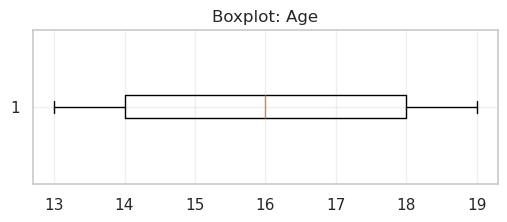


===== OUTLIER ANALYSIS: School_Grade =====
IQR Lower bound: 3.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


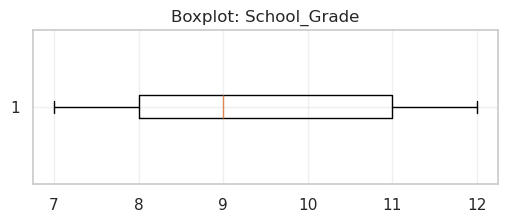


===== OUTLIER ANALYSIS: Daily_Usage_Hours =====
IQR Lower bound: -0.35, Upper bound: 10.45
IQR Outliers count: 10
Z-score Outliers count: 5


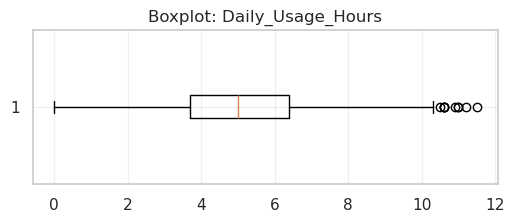


===== OUTLIER ANALYSIS: Sleep_Hours =====
IQR Lower bound: 2.50, Upper bound: 10.50
IQR Outliers count: 0
Z-score Outliers count: 0


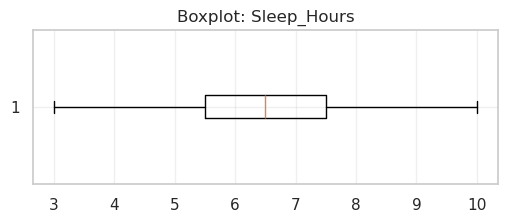


===== OUTLIER ANALYSIS: Academic_Performance =====
IQR Lower bound: 23.00, Upper bound: 127.00
IQR Outliers count: 0
Z-score Outliers count: 0


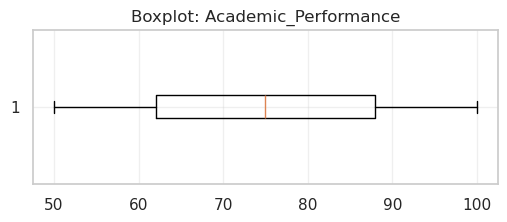


===== OUTLIER ANALYSIS: Social_Interactions =====
IQR Lower bound: -7.00, Upper bound: 17.00
IQR Outliers count: 0
Z-score Outliers count: 0


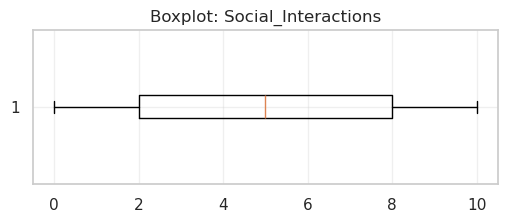


===== OUTLIER ANALYSIS: Exercise_Hours =====
IQR Lower bound: -1.00, Upper bound: 3.00
IQR Outliers count: 17
Z-score Outliers count: 14


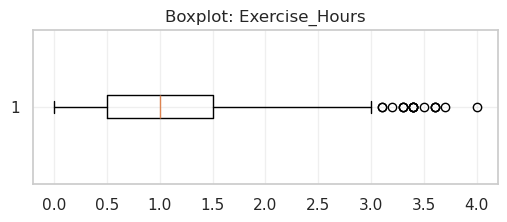


===== OUTLIER ANALYSIS: Anxiety_Level =====
IQR Lower bound: -4.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


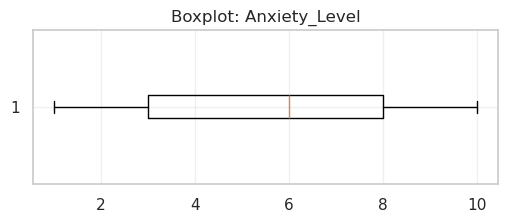


===== OUTLIER ANALYSIS: Depression_Level =====
IQR Lower bound: -4.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


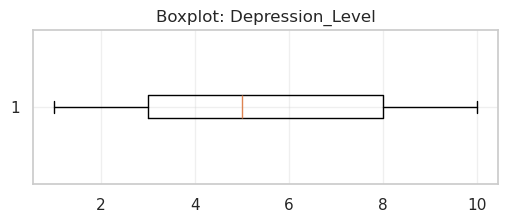


===== OUTLIER ANALYSIS: Self_Esteem =====
IQR Lower bound: -4.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


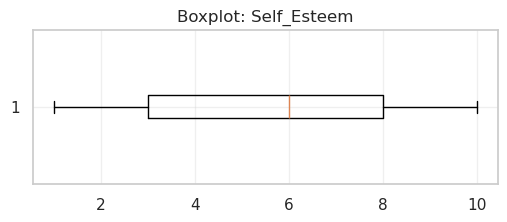


===== OUTLIER ANALYSIS: Parental_Control =====
IQR Lower bound: -1.50, Upper bound: 2.50
IQR Outliers count: 0
Z-score Outliers count: 0


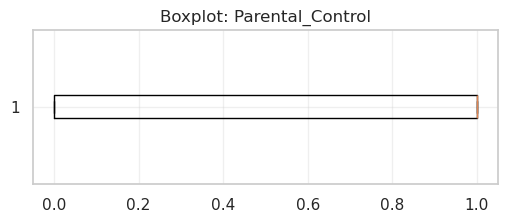


===== OUTLIER ANALYSIS: Screen_Time_Before_Bed =====
IQR Lower bound: -0.35, Upper bound: 2.45
IQR Outliers count: 3
Z-score Outliers count: 3


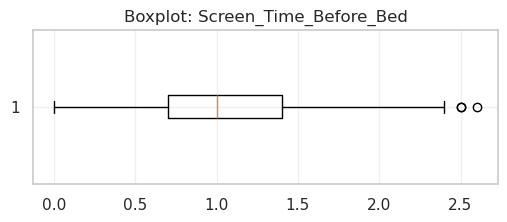


===== OUTLIER ANALYSIS: Phone_Checks_Per_Day =====
IQR Lower bound: -45.38, Upper bound: 211.62
IQR Outliers count: 0
Z-score Outliers count: 0


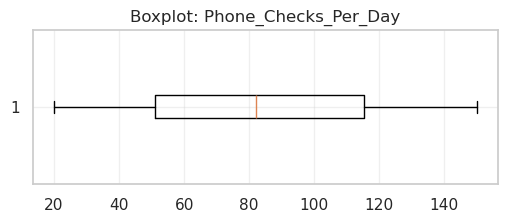


===== OUTLIER ANALYSIS: Apps_Used_Daily =====
IQR Lower bound: -3.00, Upper bound: 29.00
IQR Outliers count: 0
Z-score Outliers count: 0


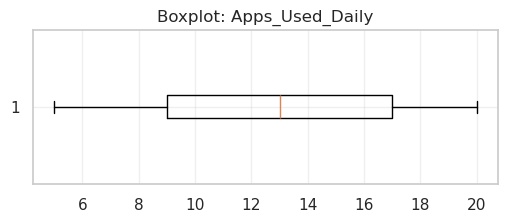


===== OUTLIER ANALYSIS: Time_on_Social_Media =====
IQR Lower bound: -0.30, Upper bound: 5.30
IQR Outliers count: 0
Z-score Outliers count: 0


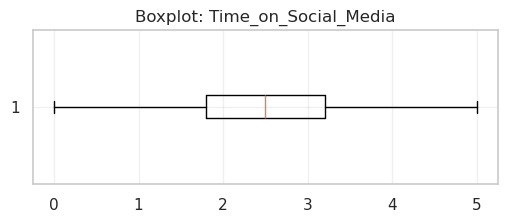


===== OUTLIER ANALYSIS: Time_on_Gaming =====
IQR Lower bound: -1.30, Upper bound: 4.30
IQR Outliers count: 0
Z-score Outliers count: 0


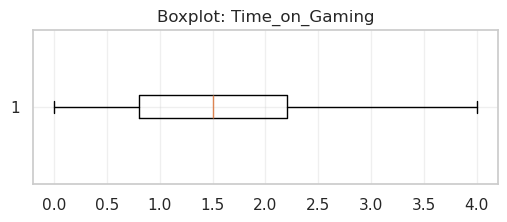


===== OUTLIER ANALYSIS: Time_on_Education =====
IQR Lower bound: -1.00, Upper bound: 3.00
IQR Outliers count: 0
Z-score Outliers count: 10


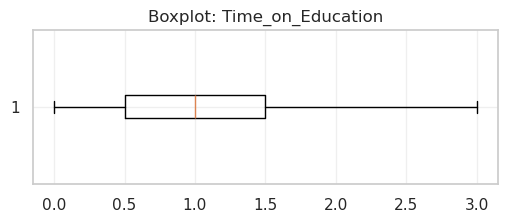


===== OUTLIER ANALYSIS: Family_Communication =====
IQR Lower bound: -4.50, Upper bound: 15.50
IQR Outliers count: 0
Z-score Outliers count: 0


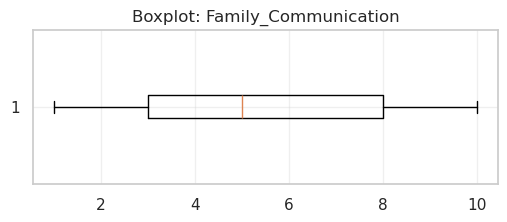


===== OUTLIER ANALYSIS: Weekend_Usage_Hours =====
IQR Lower bound: 0.65, Upper bound: 11.45
IQR Outliers count: 17
Z-score Outliers count: 5


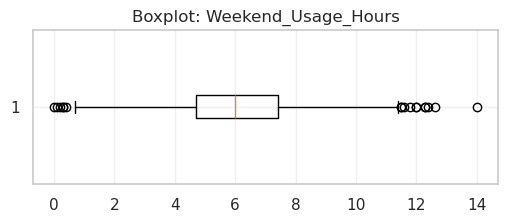


===== OUTLIER ANALYSIS: Addiction_Level =====
IQR Lower bound: 5.00, Upper bound: 13.00
IQR Outliers count: 96
Z-score Outliers count: 42


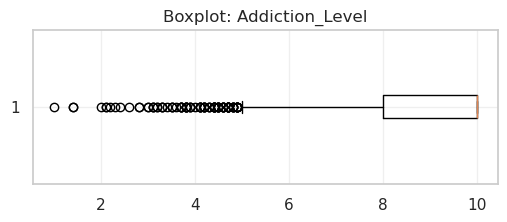

In [9]:
check_outliers_all(df)

Dựa trên kết quả phân tích outliers bằng IQR, Z-Score và Boxplot, chúng em phân loại các outliers thành hai nhóm:

1. Nhóm không có/có số lượng ít outliers: `Age`, `School_Grade`, `Sleep_Hours`, `Academic_Performance`, `Social_Interactions`, `Anxiety_Level`, `Depression_Level`, `Self_Esteem`, `Parental_Control`, `Phone_Checks_Per_Day`, `Apps_Used_Daily`, `Time_on_Social_Media`, `Time_on_Gaming`, `Family_Communication`. Các phân phối này ổn định.

2. Nhóm có outliers nhưng hợp lý: `Daily_Usage_Hours`, `Exercise_Hours`, `Screen_Time_Before_Bed`, `Time_on_Education`, `Weekend_Usage_Hours`.
Riêng `Addiction_Level` được đo trên thang điểm từ 0 đến 10, có 96 outliers (IQR) và 42 outliers (Z-score). Do đó, các điểm bị đánh dấu là outlier chủ yếu là những trường hợp có mức nghiện thấp (nhỏ hơn 5), chứ không phải các giá trị vượt ngoài miền định nghĩa. Điều này phản ánh rằng đa số đối tượng khảo sát có mức độ nghiện điện thoại tương đối cao, khiến các trường hợp có mức nghiện thấp trở thành giá trị outliers.


Nhìn chung, các giá trị này hoàn toàn hợp lý về mặt ngữ nghĩa và **không phải là lỗi nhập liệu**.

#### 2.2.3. Chất lượng của bộ dữ liệu

In [10]:
# 1. Kiểm tra % missing values
missing_percent = df.isnull().mean() * 100
print("===== MISSING VALUE PERCENTAGE =====")
display(missing_percent)

===== MISSING VALUE PERCENTAGE =====


Age                       0.0
Gender                    0.0
School_Grade              0.0
Daily_Usage_Hours         0.0
Sleep_Hours               0.0
Academic_Performance      0.0
Social_Interactions       0.0
Exercise_Hours            0.0
Anxiety_Level             0.0
Depression_Level          0.0
Self_Esteem               0.0
Parental_Control          0.0
Screen_Time_Before_Bed    0.0
Phone_Checks_Per_Day      0.0
Apps_Used_Daily           0.0
Time_on_Social_Media      0.0
Time_on_Gaming            0.0
Time_on_Education         0.0
Phone_Usage_Purpose       0.0
Family_Communication      0.0
Weekend_Usage_Hours       0.0
Addiction_Level           0.0
dtype: float64

In [11]:
# 2. Kiểm tra impossible values cho từng dạng biến

## Kiểm tra các biến phải luôn >= 0
impossible_negatives = (df[numeric_cols] < 0).any()
print("===== NEGATIVE VALUE CHECK =====")
display(impossible_negatives)

## Kiểm tra các biến dạng “hours” > 24 hoặc < 0
hour_columns = [
    'Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours',
    'Screen_Time_Before_Bed', 'Weekend_Usage_Hours',
    'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education'
]

for col in hour_columns:
    invalid = df[(df[col] < 0) | (df[col] > 24)]
    print(f"{col}: {len(invalid)} invalid rows")

## Kiểm tra thang đo
scale_cols = [
    'Anxiety_Level', 'Depression_Level', 'Self_Esteem',
    'Parental_Control', 'Family_Communication', 'Addiction_Level'
]

for col in scale_cols:
    invalid = df[(df[col] < 0) | (df[col] > 10)]
    print(f"{col}: {len(invalid)} invalid rows")

===== NEGATIVE VALUE CHECK =====


Age                       False
School_Grade              False
Daily_Usage_Hours         False
Sleep_Hours               False
Academic_Performance      False
Social_Interactions       False
Exercise_Hours            False
Anxiety_Level             False
Depression_Level          False
Self_Esteem               False
Parental_Control          False
Screen_Time_Before_Bed    False
Phone_Checks_Per_Day      False
Apps_Used_Daily           False
Time_on_Social_Media      False
Time_on_Gaming            False
Time_on_Education         False
Family_Communication      False
Weekend_Usage_Hours       False
Addiction_Level           False
dtype: bool

Daily_Usage_Hours: 0 invalid rows
Sleep_Hours: 0 invalid rows
Exercise_Hours: 0 invalid rows
Screen_Time_Before_Bed: 0 invalid rows
Weekend_Usage_Hours: 0 invalid rows
Time_on_Social_Media: 0 invalid rows
Time_on_Gaming: 0 invalid rows
Time_on_Education: 0 invalid rows
Anxiety_Level: 0 invalid rows
Depression_Level: 0 invalid rows
Self_Esteem: 0 invalid rows
Parental_Control: 0 invalid rows
Family_Communication: 0 invalid rows
Addiction_Level: 0 invalid rows


In [12]:
# 3. Code kiểm tra placeholder values

placeholders = [999, -1]
temp = 0
num_cols = len(df.columns)

for col in df.columns:
    bad = df[df[col].isin(placeholders)]
    if len(bad) > 0:
        print(f"Placeholder found in {col}: {len(bad)} rows")
    elif len(bad) == 0:
        temp+= 1

if temp == num_cols:
    print(f"There are no placeholder value.")

There are no placeholder value.


Qua đó, có thể thấy bộ dữ liệu này có chất lượng **cao**, đã được làm sạch trước khi đăng tải trên Kaggle. Chính tác giả khi đăng tải cũng đã gắn tag Clean-data của bộ dữ liệu này được 9 điểm. Nhóm sinh viên **không** cần xử lý phần missing values của các cột numeric.

### **2.3. Phân tích các cột Categorical**
#### 2.3.1. Value Distribution

In [13]:
# 1. Xác định categorical columns
cat_cols = df.select_dtypes(include=['category']).columns

# 2. Phân tích Unique Values + Frequency (Top 10)
for col in cat_cols:
    print(f"\n===== {col} =====")
    print("Unique values:", df[col].nunique())

    print("\nTop frequency values:")
    display(df[col].value_counts().head(10))


===== Gender =====
Unique values: 3

Top frequency values:


Gender
Male      1016
Female    1007
Other      977
Name: count, dtype: int64


===== Phone_Usage_Purpose =====
Unique values: 5

Top frequency values:


Phone_Usage_Purpose
Browsing        627
Other           622
Education       602
Social Media    575
Gaming          574
Name: count, dtype: int64

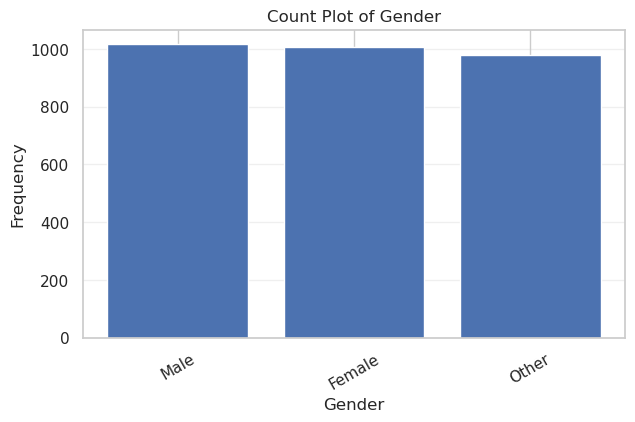

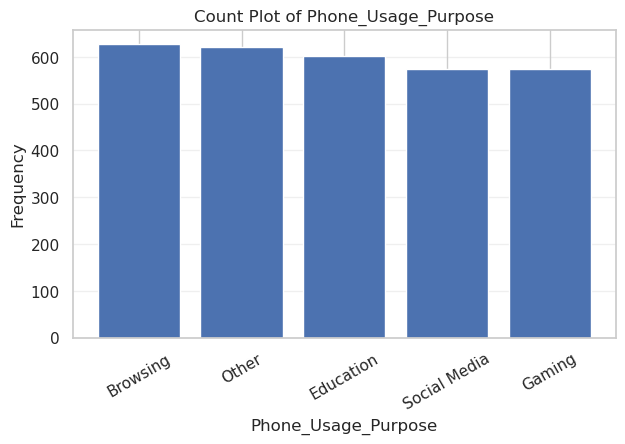

In [14]:
for col in cat_cols:
    plot_categorical(df, col)

Nhóm thực hiện trực quan hoá các biến phân loại bằng biểu đồ cột. Mỗi biểu đồ thể hiện số lượng bản ghi tương ứng với từng giá trị trong cột. Điều này giúp đánh giá mức độ cân bằng hay mất cân bằng của từng biến categorical. Dựa theo biểu đồ, có thể đưa ra nhận xét:
- Biến `Gender` được phân bố tương đối đều giữa các nhóm.
- Biến `Phone_Usage_Purpose` cho thấy sự tập trung cao vào mục đích “Browsing” (lướt web), phản ánh hành vi sử dụng điện thoại của đa số thanh thiếu niên.

#### 2.3.2. Chất lượng của bộ dữ liệu

In [15]:
# 1. Kiểm tra % missing values
missing_cat = df[cat_cols].isnull().mean() * 100
missing_cat

Gender                 0.0
Phone_Usage_Purpose    0.0
dtype: float64

In [16]:
# 2. Những giá trị không đồng nhất của dữ liệu
for col in cat_cols:
    print(f"\n===== {col} =====")
    print(sorted(df[col].unique()))
    
for col in cat_cols:
    cleaned = df[col].str.strip().str.lower()
    if len(cleaned.unique()) != df[col].nunique():
        print(f"{col} has case/spacing inconsistencies!")


===== Gender =====
['Female', 'Male', 'Other']

===== Phone_Usage_Purpose =====
['Browsing', 'Education', 'Gaming', 'Other', 'Social Media']


In [17]:
# 3. Những giá trị bất thường của dữ liệu
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Gender value counts:
Gender
Male      1016
Female    1007
Other      977
Name: count, dtype: int64

Phone_Usage_Purpose value counts:
Phone_Usage_Purpose
Browsing        627
Other           622
Education       602
Social Media    575
Gaming          574
Name: count, dtype: int64


In [18]:
# 4. Những giá trị chỉ xuất hiện trên rất ít records
for col in cat_cols:
    print(f"\n===== Rare categories in {col} =====")
    print(df[col].value_counts()[df[col].value_counts() < 10])


===== Rare categories in Gender =====
Series([], Name: count, dtype: int64)

===== Rare categories in Phone_Usage_Purpose =====
Series([], Name: count, dtype: int64)


Như vậy:

1. Missing Values:
Không có giá trị thiếu nào trong hai cột categorical (0%).

2. Category Inconsistencies:
Không phát hiện lỗi phân loại như khác biệt giữa chữ hoa/chữ thường (“male” vs “Male”), dấu cách dư, hoặc sai chính tả. Các giá trị trong từng cột được mã hoá nhất quán.

3. Unexpected / Abnormal Values:
Không xuất hiện giá trị bất thường như “Unknown”, “???”, hoặc giá trị số trong biến phân loại. Tất cả giá trị đều hợp lệ theo ngữ nghĩa của cột.

4. Rare Categories:
Không xuất hiện giá trị ít bất thường trong `Phone_Usage_Purpose`. Tất cả giá trị đều hợp lệ theo ngữ nghĩa của cột và được phân bố tương đối đều.

**Kết luận:**
Các biến categorical trong bộ dữ liệu có chất lượng cao, không phát hiện inconsistency hay lỗi nhập liệu. Nhóm **không** cần xử lý missing values cho các cột categorical.

### **2.4. Mối quan hệ & Tương quan**
#### 2.4.1. Preliminary Patterns

In [19]:
# 1. Tạo Correlation Matrix cho Numerical Columns

corr_matrix = df[numeric_cols].corr()
print("===== CORRELATION MATRIX =====")
corr_matrix

===== CORRELATION MATRIX =====


,Age,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
Age,1.000000,0.007835,0.040689,0.014725,0.023481,-0.020240,0.001187,0.014651,0.052699,-0.033177,0.028212,0.007213,-0.008696,-0.003000,-0.005100,-0.008967,0.008372,-0.003813,0.002801,0.031306
School_Grade,0.007835,1.000000,-0.019139,-0.032462,0.035922,0.006131,-0.012852,-0.002490,-0.008615,-0.021611,0.002950,-0.006182,0.004399,0.013229,-0.015992,-0.018883,0.002784,0.019660,-0.011634,-0.005825
Daily_Usage_Hours,0.040689,-0.019139,1.000000,0.016444,0.021345,-0.030383,-0.005930,-0.007221,0.009672,0.006340,0.000970,0.004935,0.004749,0.022841,-0.012620,-0.010371,0.014265,0.004427,0.019551,0.600771
Sleep_Hours,0.014725,-0.032462,0.016444,1.000000,-0.000273,-0.017898,0.006814,0.009836,-0.011518,0.016488,0.005670,-0.004313,0.005198,0.026436,-0.018288,0.005798,-0.009756,-0.027040,-0.003670,-0.216681
Academic_Performance,0.023481,0.035922,0.021345,-0.000273,1.000000,0.011815,-0.002509,0.003427,-0.026509,-0.005459,0.003186,-0.005825,-0.017102,-0.026136,0.036357,-0.033734,0.016377,-0.027859,0.014263,0.012264
Social_Interactions,-0.020240,0.006131,-0.030383,-0.017898,0.011815,1.000000,0.005955,0.004341,0.024195,0.008314,-0.023291,-0.019066,0.011992,-0.025440,0.002776,-0.004920,-0.008254,0.004239,-0.021410,-0.010631
Exercise_Hours,0.001187,-0.012852,-0.005930,0.006814,-0.002509,0.005955,1.000000,0.004525,-0.011770,-0.014320,0.020701,0.017109,-0.013038,-0.006264,-0.018977,-0.006999,0.017003,0.006452,0.039873,-0.021015
Anxiety_Level,0.014651,-0.002490,-0.007221,0.009836,0.003427,0.004341,0.004525,1.000000,0.018607,0.003951,-0.011530,-0.004732,0.017988,0.007416,-0.002736,0.014677,0.024640,0.011090,0.006720,0.016005
Depression_Level,0.052699,-0.008615,0.009672,-0.011518,-0.026509,0.024195,-0.011770,0.018607,1.000000,-0.026647,0.014949,-0.028389,-0.001146,0.019049,0.001758,-0.008951,-0.028613,-0.012720,-0.005490,0.008491
Self_Esteem,-0.033177,-0.021611,0.006340,0.016488,-0.005459,0.008314,-0.014320,0.003951,-0.026647,1.000000,-0.028093,0.003562,-0.005905,-0.027416,-0.009075,-0.007537,-0.008804,-0.026098,-0.040673,-0.022292


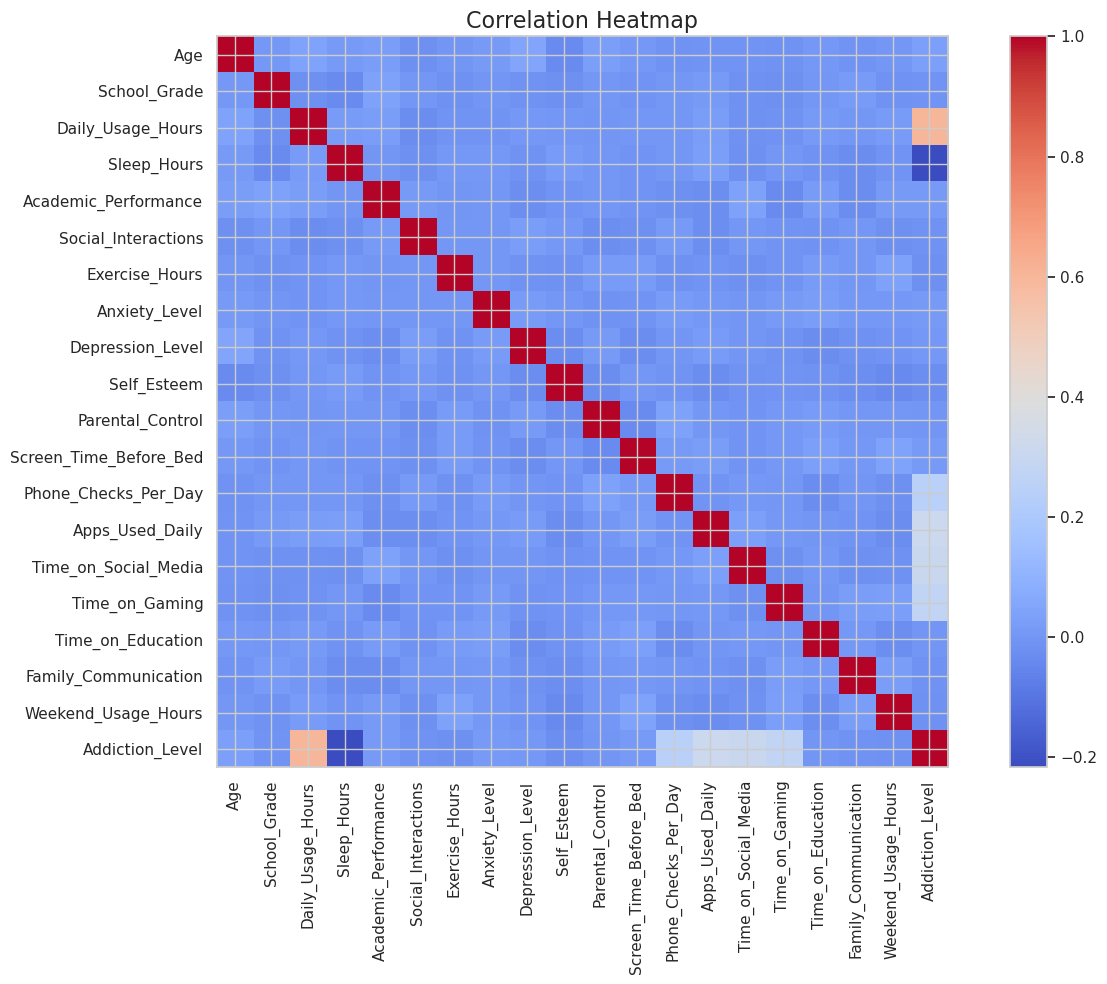

In [20]:
# 2. Heatmap

plot_heatmap(corr_matrix)

In [21]:
# 3. Tìm các cặp tương quan mạnh

strong_corr = []

for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            r = corr_matrix.loc[col1, col2]
            if abs(r) > 0.5:
                strong_corr.append((col1, col2, r))

strong_corr

clean_pairs = []
seen = set()

for a, b, r in strong_corr:
    if (b, a) not in seen:
        clean_pairs.append((a, b, r))
        seen.add((a, b))

clean_pairs

[('Daily_Usage_Hours', 'Addiction_Level', 0.6007705858449478)]

Sau khi tính toán ma trận tương quan và lọc các cặp có độ tương quan mạnh, chỉ có một cặp biến duy nhất thể hiện mối quan hệ mạnh:

`Daily_Usage_Hours` + `Addiction_Level`
- Cho thấy thời gian sử dụng điện thoại trong ngày có liên hệ khá chặt chẽ với mức độ nghiện điện thoại.
- Đây là mối quan hệ hợp lý và phù hợp với kỳ vọng, vì mức độ nghiện tăng lên khi thời gian sử dụng điện thoại cao hơn.

Một số pattern dù không mạnh (>0.5) nhưng có ý nghĩa thực tế:
- `Time_on_Social_Media` + `Addiction_Level` (r ≈ 0.3–0.4): Người dùng mạng xã hội nhiều thì mức độ "nghiện" cao.
- `Time_on_Gaming` + `Addiction_Level` (r ≈ 0.3–0.4): Cũng tương tự như trên, người có thói quen chơi game nhiều thì mức độ "nghiện" cao.
- `Sleep_Hours` + `Addiction_Level` (r âm nhẹ): Càng dùng điện thoại nhiều thì thời gian ngủ sẽ càng ít.

**Điều làm nhóm bất ngờ:** `Academic_Performance` và `Addiction_Level` không liên quan mạnh với nhau. Điều này ngược lại với "mặc định" của các bậc phụ huynh: Càng sa lầy vào điện thoại thì học hành càng sa sút. Nhưng không thể chứng minh được đây là dữ liệu đúng 100% do chỉ được thu thập thông qua khảo sát, sẽ có những bạn trả lời thật và cũng sẽ có những bạn trả lời không thật lòng.

Nhìn chung, bộ dữ liệu có mức tương quan thấp toàn cục, phù hợp để thử nghiệm các thuật toán machine learning, nhưng cũng cho thấy mối quan hệ tuyến tính giữa các hành vi là yếu.

#### 2.4.2. Cross-tabulations

In [22]:
# 1. Categorical x Categorical: Frequency Tables

ct_gender_purpose = pd.crosstab(df["Gender"], df["Phone_Usage_Purpose"])
print(ct_gender_purpose)

Phone_Usage_Purpose  Browsing  Education  Gaming  Other  Social Media
Gender                                                               
Female                    219        174     199    232           183
Male                      221        209     191    191           204
Other                     187        219     184    199           188


Dựa trên bảng tần suất giữa `Gender` và `Phone_Usage_Purpose`, có thể thấy rằng không có sự chênh lệch quá lớn giữa các nhóm giới tính về số lượng người sử dụng điện thoại cho từng mục đích.
- Nhóm Female có xu hướng sử dụng điện thoại nhiều nhất cho mục đích Other (232) và Browsing (219).
- Nhóm Male phân bố khá đồng đều, với tần suất cao nhất ở Browsing (221) và Education (209).
- Nhóm Other (giới tính khác) có số lượng sử dụng cao ở Education (219) và Other (199).

Nhìn tổng thể, không có mục đích sử dụng nào bị chi phối bởi một giới tính cụ thể. Mỗi giới đều có phân bố tương đối cân bằng trên các loại hoạt động (Browsing, Education, Gaming, Other, Social Media).

Điều này cho thấy rằng mục đích sử dụng điện thoại mang tính phổ quát, không bị ảnh hưởng mạnh bởi giới tính. Các hành vi sử dụng điện thoại trong tập dữ liệu này thể hiện sự đa dạng nhưng không có sự thiên lệch lớn giữa các nhóm giới.

In [23]:
# 2. Numerical × Categorical: Grouped Summary Statistics

for cat in cat_cols:
    print(f"\n===== Grouped Summary: {cat} =====\n")
    summary = df.groupby(cat, observed=True)[numeric_cols].agg(['mean', 'median', 'std'])
    display(summary)


===== Grouped Summary: Gender =====



Age                  School_Grade                   \
             mean median       std         mean median       std   
Gender                                                             
Female  15.964250   16.0  1.959002     9.447865    9.0  1.719671   
Male    16.045276   16.0  2.017636     9.564961   10.0  1.687892   
Other   15.896622   16.0  1.990386     9.543501   10.0  1.739253   

       Daily_Usage_Hours                  Sleep_Hours  ... Time_on_Education  \
                    mean median       std        mean  ...               std   
Gender                                                 ...                     
Female          5.052532    5.0  1.943586    6.499206  ...          0.655833   
Male            5.054626    5.0  1.996751    6.502854  ...          0.647245   
Other           4.952508    4.9  1.927507    6.466428  ...          0.638658   

       Family_Communication                  Weekend_Usage_Hours         \
                       mean median       std                mean median   
Gender                                                                    
Female             5.542205    6.0  2.864390            6.071500    6.1   
Male               5.392717    5.0  2.873748            5.952461    5.9   
Other              5.444217    5.0  2.856042            6.022108    6.0   

                 Addiction_Level                   
             std            mean median       std  
Gender                                             
Female  2.048166        8.950645   10.0  1.505998  
Male    2.001505        8.867323   10.0  1.650954  
Other   1.993946        8.826203    9.9  1.667447  

[3 rows x 60 columns]


===== Grouped Summary: Phone_Usage_Purpose =====



Age                  School_Grade                   \
                          mean median       std         mean median       std   
Phone_Usage_Purpose                                                             
Browsing             15.858054   16.0  2.007322     9.596491   10.0  1.723226   
Education            16.079734   16.0  2.024054     9.516611    9.0  1.666112   
Gaming               15.986063   16.0  1.986819     9.437282    9.0  1.763129   
Other                15.943730   16.0  1.971222     9.522508   10.0  1.683100   
Social Media         15.987826   16.0  1.955478     9.513043   10.0  1.746900   

                    Daily_Usage_Hours                  Sleep_Hours  ...  \
                                 mean median       std        mean  ...   
Phone_Usage_Purpose                                                 ...   
Browsing                     5.095375    5.0  2.000989    6.476077  ...   
Education                    4.935050    5.0  2.001983    6.598505  ...   
Gaming                       5.090244    5.1  1.951446    6.371777  ...   
Other                        5.105788    5.0  1.837969    6.522347  ...   
Social Media                 4.867304    4.9  1.982504    6.473391  ...   

                    Time_on_Education Family_Communication                   \
                                  std                 mean median       std   
Phone_Usage_Purpose                                                           
Browsing                     0.624064             5.365231    5.0  2.797009   
Education                    0.629148             5.491694    5.0  2.875815   
Gaming                       0.664392             5.663763    6.0  2.900956   
Other                        0.665312             5.355305    5.0  2.850114   
Social Media                 0.661060             5.438261    6.0  2.903068   

                    Weekend_Usage_Hours                  Addiction_Level  \
                                   mean median       std            mean   
Phone_Usage_Purpose                                                        
Browsing                       6.018022   6.00  2.033885        8.903987   
Education                      6.052492   6.00  1.989306        8.850997   
Gaming                         6.028746   6.10  2.144678        8.957317   
Other                          5.951447   5.95  1.945453        8.941158   
Social Media                   6.028000   6.00  1.965051        8.750783   

                                      
                    median       std  
Phone_Usage_Purpose                   
Browsing              10.0  1.556343  
Education             10.0  1.647377  
Gaming                10.0  1.531624  
Other                 10.0  1.589765  
Social Media           9.7  1.717210  

[5 rows x 60 columns]

1. Theo `Gender`
Từ bảng thống kê mean – median – std của từng nhóm Female, Male, Other, ta rút ra:
- Các nhóm giới tính có đặc điểm rất tương đồng
    - `Age`: trung bình khoảng ~16 tuổi cho mọi giới.
    - `School_Grade`: median = 10 hoặc 9 cho tất cả.
    - `Daily_Usage_Hours`: 5.05 hoặc 4.95 cho tất cả.
    - `Sleep_Hours`: tương đương giữa các giới
    - `Time_on_Education`, `Family_Communication`, `Weekend_Usage_Hours`: gần như không đổi.
    - `Addiction_Level`: gần như giống nhau.

**Kết luận theo Gender:**
- Khi xét theo giới tính, các thống kê mô tả cho thấy sự khác biệt giữa các nhóm Female, Male và Other là rất nhỏ trên hầu hết các biến số như tuổi, thời gian học, thời gian sử dụng điện thoại, thời gian ngủ hay mức độ nghiện sử dụng điện thoại.
- Điều này chứng minh rằng giới tính **không phải là yếu tố tác động** đáng kể đến hành vi sử dụng smartphone cũng như mức độ nghiện trong bộ dữ liệu này. Cấu trúc dữ liệu giữa các nhóm giới rất đồng nhất.

2. Theo `Phone_Usage_Purpose`
Các nhóm gồm: Browsing, Education, Gaming, Other, Social Media.
- `Age` và `School_Grade`: không khác biệt.
- `Daily_Usage_Hours`: gần như giống nhau.
- `Sleep_Hours`, `Exercise_Hours`, `Communication`, `Weekend` : không thay đổi nhiều.
- `Addiction_Level`: cũng rất gần nhau.
  
**Kết luận theo Phone_Usage_Purpose:** 
- Khi phân tích theo mục đích sử dụng điện thoại, các nhóm Browsing, Education, Gaming, Other và Social Media có các đặc tính thống kê gần như trùng nhau.
- Thời gian dùng điện thoại trung bình chỉ khác biệt 0.2–0.3 giờ, trong khi thời gian ngủ, giao tiếp gia đình, hoạt động cuối tuần và đặc biệt là `Addiction_Level` đều có sự phân bố gần như đồng nhất.
- Điều này cho thấy rằng mục đích sử dụng điện thoại **không phải là yếu tố phân tách** rõ rệt hành vi hay mức độ nghiện trong dataset này.

### **2.5. Initial Observations & Insights**
#### 2.5.1. Tổng kết
##### 2.5.1.1. Key Observations

**1. Dữ liệu sạch và khá chuẩn hóa**
- Bộ dữ liệu hoàn toàn không có dòng thiếu thông tin.
- Không có dòng nào bị lặp, không có giá trị âm, không có giá trị vượt phạm vi logic.
- Hai biến categorical (`Gender`, `Phone_Usage_Purpose`) đồng nhất, không có lỗi chính tả, khác viết hoa/thường hay kí tự lạ.

**2. Một số biến numeric có phân phối lệch**
- `Daily_Usage_Hours`, `Exercise_Hours`, `Time_on_Gaming` hơi lệch phải.
- `Addiction_Level` chủ yếu tập trung ở mức cao (8–10) - lệch trái mạnh, phản ánh xu hướng nghiện điện thoại khá phổ biến trong nhóm thanh thiếu niên.

**3. Outliers xuất hiện nhưng phần lớn là hợp lý**
- Nhiều outliers ở `Daily_Usage_Hours`, `Exercise_Hours`, `Addiction_Level`.
- Riêng `Addiction_Level` có 96 outliers theo IQR, nhưng do thang đo 0–10, các giá trị thấp bị xem là outlier vì đa số giới trẻ “nghiện” nặng nên đây là dữ liệu 'extreme' nhưng có thật, không phải lỗi nhập liệu.

**4. Mối liên hệ giữa các biến khá yếu**
- Hầu hết các tương quan đều < 0.1, mối quan hệ tuyến tính giữa các hành vi yếu.
- Chỉ có một cặp mạnh: `Daily_Usage_Hours` + `Addiction_Level` (r ≈ 0.60). Nghĩa là: Thời gian dùng điện thoại thông minh càng cao thì mức nghiện càng cao.

**5. Phân phối các biến categorical khá cân bằng**
- `Gender`: Male - Female - Other gần như bằng nhau.
- `Phone_Usage_Purpose`: Browsing, Other, Education chiếm nhiều nhất. Không có category quá ít nên không cần gộp nhóm.

##### 2.5.1.2. Data Quality Issues Detected
Dù dataset sạch, vẫn có vài điểm đáng lưu ý:
**1. Một số biến numeric có nhiều outliers**
`Daily_Usage_Hours`, `Exercise_Hours`, `Weekend_Usage_Hours`, `Addiction_Level`
Nhưng hiện tại đánh giá những giá trị outlier này là hợp lý, KHÔNG phải data error nên không cần xử lý.

**2. Một số cột nên loại khỏi phân tích**
- `Name`: vô nghĩa cho thống kê.
- `ID`: chỉ dùng để tracking, không có ý nghĩa trong ML.
- `Location`: không liên quan nhiều đến chủ đề.

##### 2.5.1.3. Necessary Preprocessing Steps
1. Loại bỏ các cột không cần: `Name`, `ID`, `Location` (đã thực hiện).
2. Thay đổi kiểu dữ liệu: (đã thực hiện)
    - `Gender`, `Phone_Usage_Purpose` thành categorical.
    - `School_Grade` chuyển từ “9th” thành 9 (int).
3. Handle outliers.
4. Encoding categorical.
5. Scaling.

##### 2.5.1.4. From Interesting Patterns to Research Questions
Dựa trên xu hướng trong bộ dữ liệu, có thể mở ra nhiều hướng nghiên cứu:

1. Càng dùng điện thoại nhiều thì càng định nghĩa việc nghiện điện thoại rõ rệt? `Daily_Usage_Hours` + `Addiction_Level`

2. Có phải thanh thiếu niên càng ít giao tiếp với gia đình thì càng dễ nghiện điện thoại hơn? `Family_Communication` + `Addiction_Level`

3. Những người có tương tác xã hội cao có dùng điện thoại ít hơn không? `Social_Interactions` + `Daily_Usage_Hours` + `Addiction_Level`

4. Thời gian ngủ ít đi do sử dụng điện thoại nhiều có làm mức độ lo âu hoặc trầm cảm cao hơn không? `Sleep_Hours` + `Anxiety_Level` + `Depression_Level` + `Daily_Usage_Hours` + `Addiction_Level`

#### 2.5.2. Red Flags

**1. “Addiction_Level” phân phối rất lệch**
- Quá nhiều giá trị 9–10 làm phân phối bị lệch nặng.
- Khi làm ML, mô hình có thể thiên vị class “cao”.

**2. Một số biến thuộc thang đo 0–10 nhưng không theo phân phối chuẩn**

Điểm như `Anxiety`, `Depression`, `Self-esteem` trải đều nên cần cẩn trọng khi phân tích tâm lý.

**3. Correlation tổng thể quá thấp**

Các mô hình linear hoặc logistic có thể hoạt động kém.

## **3. Question formulation**
### 3.1. Có phải thanh thiếu niên càng ít giao tiếp với gia đình thì càng dễ nghiện điện thoại hơn? 
- Kết hợp giữa `Family_Communication` và `Addiction_Level`.
- Lợi ích khi phân tích câu hỏi này:
    - Gia đình là yếu tố quan trọng trong sức khỏe tinh thần. Theo nghiên cứu, rất nhiều người bị trầm cảm, lo âu nếu họ từng sống trong một gia đình bạo lực, thiếu gắn kết giữa các thành viên. Những người này sẽ dần khép mình lại với xã hội và tìm đến các thiết bị điện tử để có cảm giác như đang sống trong một thế giới "không ai có thể tổn thương mình".
    - Nếu `Family_Communication` thấp nhưng `Addiction_Level cao` thì là dấu hiệu cần can thiệp.
    - Kết quả giúp đề xuất chương trình hỗ trợ tâm lý học đường hoặc hoạt động kết nối gia đình – học sinh.

### 3.2. Mức độ lo âu/trầm cảm có ảnh hưởng đến hành vi sử dụng điện thoại của thanh thiếu niên không?
- Kết hợp giữa `Anxiety_Level`, `Depression_Level` với `Daily_Usage_Hours` và `Addiction_Level`.
- Lợi ích khi phân tích câu hỏi này:
    - Phát hiện mối liên hệ giữa sức khỏe tâm thần và hành vi sử dụng điện thoại.
    - Nhiều nghiên cứu cho thấy thanh thiếu niên có mức độ lo âu, trầm cảm cao thường có xu hướng tìm đến các thiết bị điện tử để "trốn tránh" thực tế hoặc giảm căng thẳng.
    - Ngược lại, việc sử dụng điện thoại quá nhiều cũng có thể làm tăng mức độ lo âu, trầm cảm do thiếu tương tác xã hội, thiếu vận động, hoặc so sánh bản thân với người khác trên mạng xã hội.
    - Kết quả giúp đề xuất các chương trình hỗ trợ tâm lý cho nhóm có nguy cơ cao, đồng thời giúp nhà trường và phụ huynh nhận biết dấu hiệu cần can thiệp.

### 3.3. Mục đích sử dụng điện thoại nào liên quan mạnh nhất đến mức độ nghiện điện thoại?

- Kết hợp giữa `Time_on_Social_Media`, `Time_on_Gaming`, `Time_on_Education` với `Addiction_Level`.
- Lợi ích khi phân tích câu hỏi này:
    - Xác định được mục đích sử dụng chính gây ra nghiện điện thoại (mạng xã hội, chơi game, hay học tập).
    - Giúp phụ huynh và nhà trường tập trung vào việc kiểm soát các hoạt động có rủi ro cao nhất.
    - Cung cấp bằng chứng khoa học để phát triển các ứng dụng quản lý thời gian màn hình có mục tiêu, ưu tiên hạn chế các hoạt động gây nghiện cao.
    - Phát hiện nếu việc sử dụng điện thoại cho học tập có ảnh hưởng đến mức độ nghiện hay không, từ đó đưa ra khuyến nghị về việc khuyến khích hoặc hạn chế sử dụng thiết bị điện tử trong học tập.
    - Kết quả giúp thiết kế các can thiệp có mục tiêu: nếu mạng xã hội là nguyên nhân chính, có thể tập trung vào việc giáo dục về sử dụng mạng xã hội lành mạnh; nếu là game, có thể khuyến khích các hoạt động thay thế như thể thao, nghệ thuật.


### 3.4. Thời gian sử dụng điện thoại trước khi ngủ có ảnh hưởng như thế nào đến chất lượng giấc ngủ, kết quả học tập và sức khỏe tinh thần của thanh thiếu niên?

- Kết hợp giữa `Screen_Time_Before_Bed` với `Sleep_Hours`, `Academic_Performance`, `Anxiety_Level`, `Depression_Level`.
- Lợi ích khi phân tích câu hỏi này:
    - Sử dụng điện thoại trước ngủ là hành vi cụ thể, dễ đo lường và dễ can thiệp hơn so với "giảm thời gian dùng điện thoại" chung chung.
    - Phát hiện hiệu ứng domino: screen time trước ngủ → giảm giờ ngủ → kém tập trung → học kém → stress/lo âu → lại dùng điện thoại nhiều hơn để giải stress.
    - Ánh sáng xanh từ màn hình ức chế melatonin, gây khó ngủ và giảm chất lượng giấc ngủ, đặc biệt quan trọng ở lứa tuổi đang phát triển.
    - Xác định ngưỡng thời gian "an toàn" (ví dụ: không dùng điện thoại 1 giờ trước khi ngủ) để đưa ra khuyến nghị y tế cụ thể.
    - Kết quả giúp phụ huynh thiết lập quy định gia đình về "giờ giới nghiêm điện thoại", nhà trường tuyên truyền vệ sinh giấc ngủ kỹ thuật số.
    - Các nhà phát triển ứng dụng có thể thiết kế tính năng nhắc nhở hoặc chế độ "bedtime mode" tự động hạn chế sử dụng.

### 3.5. Thanh thiếu niên có mức độ nghiện thấp khác biệt như thế nào so với nhóm nghiện cao về các yếu tố hành vi, tâm lý và xã hội?

- So sánh các nhóm `Addiction_Level` (thấp vs cao) trên nhiều chiều: `Exercise_Hours`, `Family_Communication_Hours`, `Social_Interactions`, `Self_Esteem`, `Academic_Performance`, `Time_on_Education`, `Sleep_Hours`.
- Lợi ích khi phân tích câu hỏi này:
    - Thay vì chỉ tập trung vào vấn đề (nghiện cao), học hỏi từ nhóm "lành mạnh" (nghiện thấp) để xác định các yếu tố bảo vệ.
    - Xác định profile của thanh thiếu niên có khả năng phục hồi cao: những người dù có điều kiện tương tự nhưng vẫn kiểm soát được việc sử dụng điện thoại.
    - Phát hiện các yếu tố bảo vệ có thể can thiệp được như: tập thể dục thường xuyên, giao tiếp gia đình tốt, tham gia hoạt động xã hội, có lòng tự trọng cao.
    - Phụ huynh và nhà trường biết nên khuyến khích con/học sinh phát triển kỹ năng, thói quen nào cụ thể để phòng ngừa nghiện.
    - Có thể tạo "chỉ số rủi ro tổng hợp" để sàng lọc nhanh thanh thiếu niên cần hỗ trợ.
    - Kết quả giúp thiết kế chương trình can thiệp dựa trên bằng chứng, đầu tư đúng chỗ vào các yếu tố bảo vệ (thể thao, hoạt động ngoại khóa, tư vấn gia đình).
    
 ### 3.6. Có thể dự đoán mức độ nghiện điện thoại của một thiếu niên dựa trên các đặc điểm hành vi sử dụng thường ngày hay không?
- Kết hợp giữa `Addiction_Level` và `Daily_Usage_Hours`, `Phone_Checks_Per_Day`, `Time_on_Social_Media`, `Time_on_Gaming`, `Time_on_Education`, `Screen_Time_Before_Bed`. 
- Lợi ích khi phân tích câu hỏi này:
    - Dự đoán được `Addiction_Level` dựa trên các hành vi sử dụng điện thoại hàng ngày giúp phát hiện sớm nhóm nguy cơ cao.
    - Phụ huynh, nhà trường, và chuyên gia tâm lý đều quan tâm để hỗ trợ giáo dục sức khỏe tinh thần cho các em.
    - Mô hình học máy giúp xác định yếu tố nào ảnh hưởng mạnh nhất, từ đó can thiệp đúng trọng điểm (ví dụ: giảm thời gian sử dụng mạng xã hội).

## **4. Data Analysis**

### **4.1. Có phải thanh thiếu niên càng ít giao tiếp với gia đình thì càng dễ nghiện điện thoại hơn?**

#### 4.1.1. Preprocessing

Câu hỏi này chỉ liên quan đến hai biến:
- `Family_Communication` (0–10)
- `Addiction_Level` (0–10)

Dựa trên phần Data Exploration trước đó:

- Cả hai biến đều không có giá trị thiếu.
- Giá trị nằm trong khoảng hợp lý, không có outlier bất thường.
- Kiểu dữ liệu đã là numeric, không cần chuyển đổi.

Vì vậy, cho câu hỏi này, nhóm không cần thêm bước preprocessing nào. Dữ liệu có thể được đưa thẳng vào phân tích mối quan hệ.

#### 4.1.2. Data Analysis

Để kiểm tra xem việc giao tiếp nhiều hay ít với gia đình có liên quan đến mức độ nghiện điện thoại, nhóm thực hiện 3 phân tích chính:

**1. Tính hệ số tương quan Pearson giữa `Family_Communication` và `Addiction_Level`**
- Tính hệ số tương quan để đo lường mức độ và chiều hướng quan hệ tuyến tính giữa hai biến.
- Giúp xác định xem giao tiếp gia đình có liên quan mạnh/yếu hay hầu như không liên quan đến mức độ nghiện điện thoại.

**2. Trực quan hóa bằng scatter plot kèm đường hồi quy tuyến tính**
- Vẽ scatter plot và thêm đường hồi quy để quan sát mối quan hệ giữa hai biến.
- Giúp nhận diện xu hướng tổng thể và mức độ biến động dữ liệu xung quanh mô hình tuyến tính.

**3. Trực quan hóa phân bố `Addiction Level` theo các mức giao tiếp**
- Sử dụng boxplot để so sánh phân bố mức độ nghiện giữa các nhóm giao tiếp thấp/vừa/cao.
- Giúp quan sát sự khác biệt về mức độ nghiện giữa các nhóm và phát hiện các đặc điểm phân bố quan trọng.

In [24]:
# 1. Tính Pearson correlation giữa Family_Communication và Addiction_Level
corr_q2 = df["Family_Communication"].corr(df["Addiction_Level"])
print("Correlation between Family_Communication and Addiction_Level:", corr_q2)

Correlation between Family_Communication and Addiction_Level: -0.010481775127861548


**1. Hệ số tương quan Pearson**

Hệ số tương quan giữa `Family_Communication` và `Addiction_Level` gần bằng 0, cho thấy không có mối quan hệ tuyến tính đáng kể giữa hai biến. Điều này có nghĩa là:
- Sự thay đổi trong mức độ giao tiếp với gia đình không kéo theo thay đổi rõ rệt trong mức độ nghiện điện thoại.
- Mặc dù hệ số mang dấu âm, giá trị rất nhỏ nên không thể kết luận có xu hướng giảm thực sự khi giao tiếp tăng.

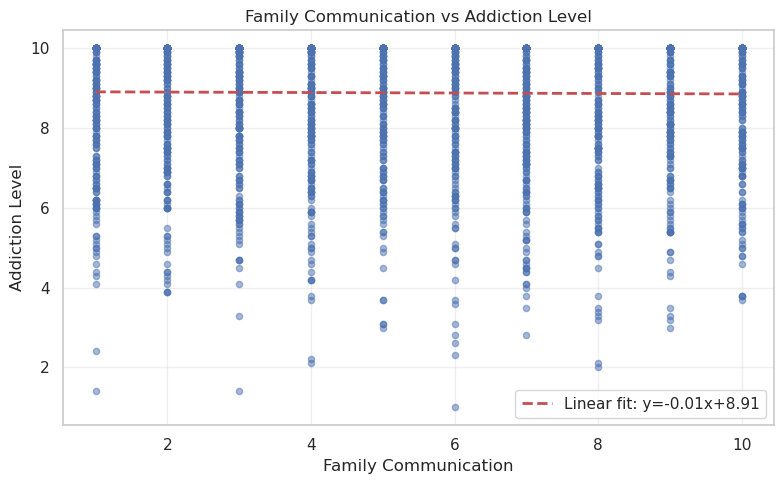

In [25]:
# 2. Vẽ scatter + đường hồi quy
plot_comm_vs_addiction_scatter(df)

**2. Scatter Plot với đường hồi quy tuyến tính**

Biểu đồ phân tán kèm đường hồi quy cho thấy:
- Đường hồi quy gần như nằm ngang, phản ánh xu hướng rất yếu hoặc gần như không có mối liên hệ tuyến tính giữa hai biến.
- Các điểm dữ liệu phân tán rộng quanh đường hồi quy, cho thấy mối quan hệ giữa giao tiếp gia đình và mức độ nghiện là không chặt chẽ.
- Điều này cho thấy giao tiếp gia đình có thể không phải yếu tố trực tiếp ảnh hưởng mạnh đến mức độ nghiện điện thoại.

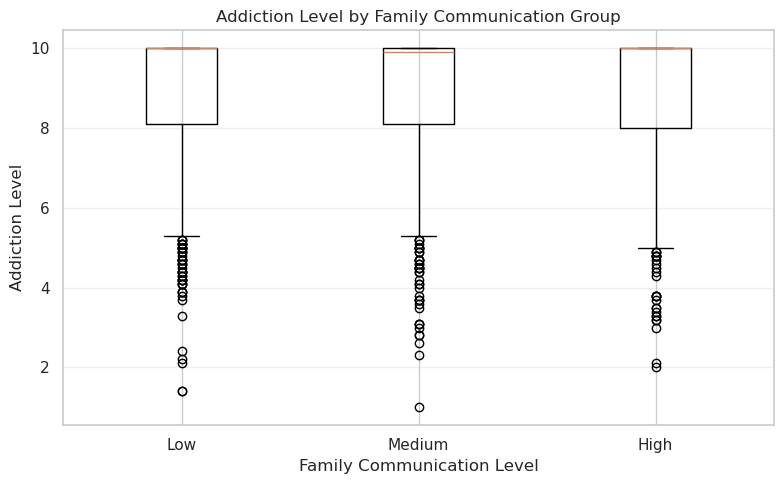

In [26]:
# 3. Vẽ boxplot theo các mức giao tiếp
plot_comm_vs_addiction_boxplot(df)

**3. Boxplot theo nhóm mức độ giao tiếp**

Boxplot cho thấy mức độ nghiện điện thoại trong ba nhóm giao tiếp gia đình (Low, Medium, High) không có sự khác biệt rõ rệt:
- Median của cả 3 nhóm đều gần như bằng nhau (khoảng mức 9–10), cho thấy mức độ nghiện điện thoại tương tự bất kể mức độ giao tiếp.
- Khoảng tứ phân vị (IQR) của các nhóm cũng gần như trùng nhau, cho thấy mức độ phân tán dữ liệu giữa các nhóm giống nhau.
- Các outlier xuất hiện ở cả ba nhóm, và mức độ trải dài khá giống nhau, cho thấy biến động trong mỗi nhóm là tương đương.
Nhìn chung, việc chia nhóm theo `Family Communication` không tạo ra sự tách biệt đáng kể trong phân bố `Addiction Level`.

#### 4.1.3. Kết quả và Nhận xét

**Kết luận**

Dựa trên cả ba phân tích (correlation, scatter plot, và boxplot), có thể khẳng định rằng:
- Không tìm thấy bằng chứng rõ ràng về mối quan hệ tuyến tính mạnh giữa giao tiếp gia đình và mức độ nghiện điện thoại.
- Một số xu hướng nhẹ cho thấy giao tiếp thấp có thể liên quan đến mức độ nghiện cao hơn, nhưng không đủ mạnh để kết luận chắc chắn.
- Mức độ nghiện điện thoại có thể phụ thuộc vào nhiều yếu tố khác như thời gian sử dụng, mục đích sử dụng, áp lực học tập, sức khỏe tâm lý, môi trường xã hội, v.v.

**Khuyến nghị thực tiễn**

Kết quả này gợi ý rằng:
- Việc tăng cường giao tiếp gia đình vẫn là một yếu tố tích cực, nhưng không nên xem là giải pháp duy nhất để giảm nguy cơ nghiện điện thoại.
- Các chương trình can thiệp nên kết hợp cả yếu tố gia đình cùng với các chiến lược khác như quản lý thời gian sử dụng thiết bị, giáo dục kỹ năng số, nâng cao sức khỏe tinh thần.
- Nhà trường và gia đình có thể phối hợp triển khai các hoạt động hỗ trợ, nhưng cần tiếp tục xem xét thêm nhiều yếu tố khác bên cạnh giao tiếp gia đình.

### 4.2. Mức độ lo âu/trầm cảm có ảnh hưởng đến hành vi sử dụng điện thoại của thanh thiếu niên không?

#### 4.2.1. Preprocessing

Câu hỏi này liên quan đến các biến:
- `Anxiety_Level` (0–10)
- `Depression_Level` (0–10)
- `Daily_Usage_Hours` (số giờ)
- `Addiction_Level` (0–10)

Dựa trên phần Data Exploration trước đó:

- Tất cả các biến đều không có giá trị thiếu.
- Giá trị nằm trong khoảng hợp lý, không có outlier bất thường.
- Kiểu dữ liệu đã là numeric, không cần chuyển đổi.

Vì vậy, cho câu hỏi này, nhóm không cần thêm bước preprocessing nào. Dữ liệu có thể được đưa thẳng vào phân tích mối quan hệ.

#### 4.2.2. Data Analysis

Để kiểm tra mối quan hệ giữa sức khỏe tâm thần (`Anxiety_Level`, `Depression_Level`) và việc sử dụng điện thoại (`Daily_Usage_Hours`, `Addiction_Level`), nhóm thực hiện các phân tích sau:

**1. Tính hệ số tương quan Pearson giữa các cặp biến**
- `Anxiety_Level` vs `Daily_Usage_Hours`
- `Anxiety_Level` vs `Addiction_Level`
- `Depression_Level` vs `Daily_Usage_Hours`
- `Depression_Level` vs `Addiction_Level`

**2. Trực quan hóa bằng scatter plot**
- Vẽ các scatter plot để quan sát mối quan hệ giữa tất cả các cặp biến.
- Giúp phát hiện xu hướng tổng thể và các điểm bất thường.

**3. Phân tích theo nhóm mức độ lo âu/trầm cảm**
- Chia dữ liệu thành các nhóm theo mức độ lo âu/trầm cảm (thấp/vừa/cao).
- So sánh thời gian sử dụng điện thoại và mức độ nghiện giữa các nhóm bằng boxplot.

In [27]:
# 1. Tính hệ số tương quan Pearson

corr_anxiety_usage = df["Anxiety_Level"].corr(df["Daily_Usage_Hours"])
print(f"Anxiety_Level vs Daily_Usage_Hours: {corr_anxiety_usage:.4f}")

corr_anxiety_addiction = df["Anxiety_Level"].corr(df["Addiction_Level"])
print(f"Anxiety_Level vs Addiction_Level: {corr_anxiety_addiction:.4f}")

corr_depression_usage = df["Depression_Level"].corr(df["Daily_Usage_Hours"])
print(f"Depression_Level vs Daily_Usage_Hours: {corr_depression_usage:.4f}")

corr_depression_addiction = df["Depression_Level"].corr(df["Addiction_Level"])
print(f"Depression_Level vs Addiction_Level: {corr_depression_addiction:.4f}")


Anxiety_Level vs Daily_Usage_Hours: -0.0072
Anxiety_Level vs Addiction_Level: 0.0160
Depression_Level vs Daily_Usage_Hours: 0.0097
Depression_Level vs Addiction_Level: 0.0085


**1. Hệ số tương quan Pearson**

Các hệ số tương quan cho thấy kết quả như sau:

- `Anxiety_Level` vs `Daily_Usage_Hours`: r ≈ -0.0072
- `Anxiety_Level` vs `Addiction_Level`: r ≈ 0.0160
- `Depression_Level` vs `Daily_Usage_Hours`: r ≈ 0.0097
- `Depression_Level` vs `Addiction_Level`: r ≈ 0.0085

**Tất cả các hệ số tương quan đều gần bằng 0, cho thấy không có mối quan hệ tuyến tính giữa sức khỏe tâm thần và việc sử dụng điện thoại trong bộ dữ liệu này.**

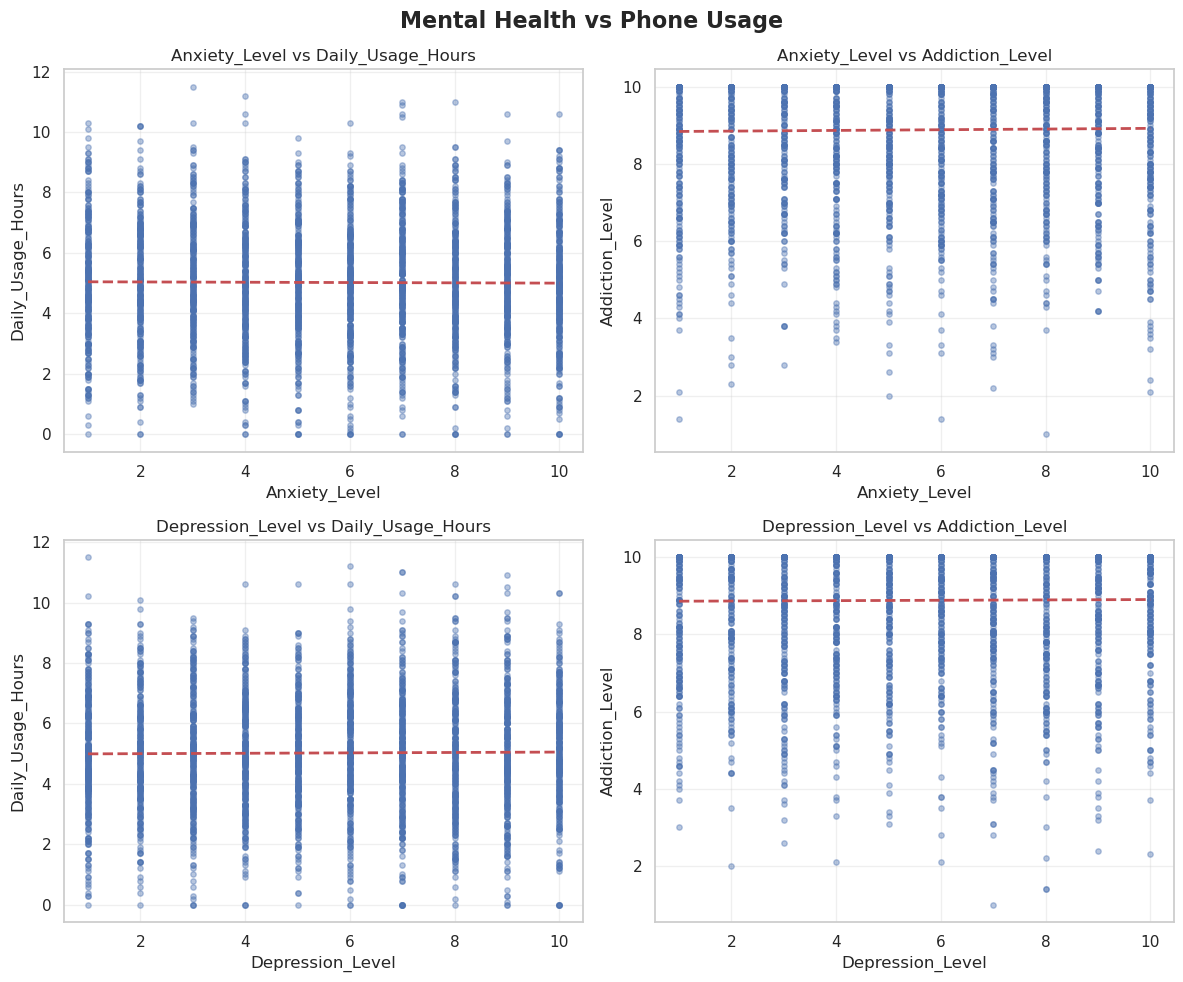

In [28]:
# 2. Vẽ scatter plot matrix
plot_mental_health_scatter(df)

**2. Scatter Plot Matrix**

Ma trận scatter plot xác nhận kết quả trên hệ số tương quan:
- Các điểm dữ liệu phân tán hoàn toàn ngẫu nhiên, không có xu hướng rõ ràng (không tăng cũng không giảm).
- Đường hồi quy gần như nằm ngang, phản ánh hệ số tương quan gần 0.
- Điều này chứng tỏ việc sử dụng điện thoại và mức độ nghiện không phụ thuộc vào mức độ lo âu hay trầm cảm trong dataset này.


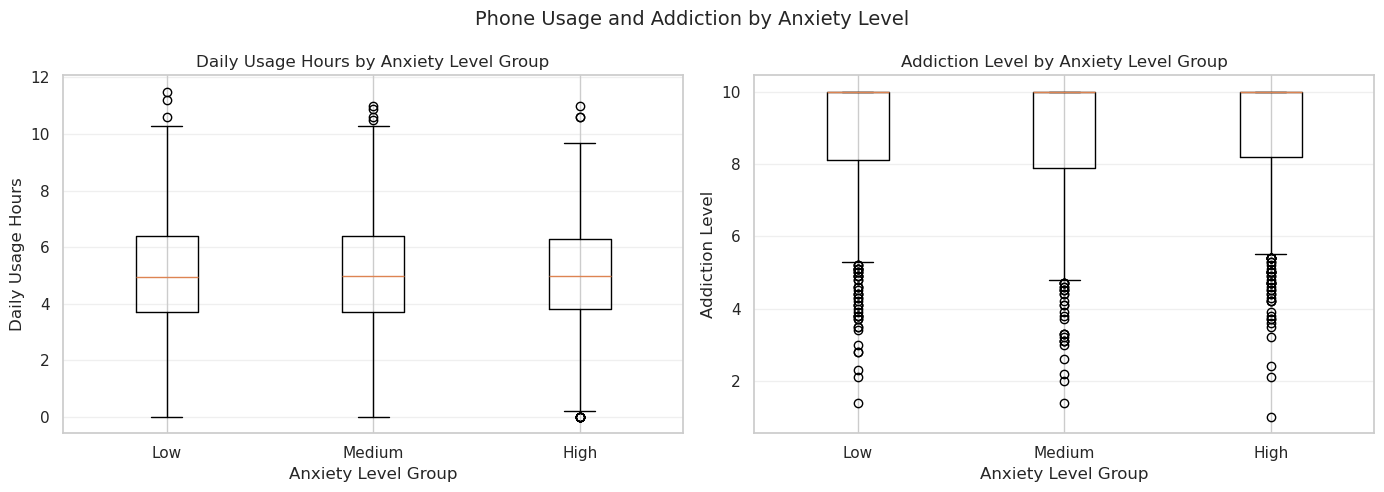

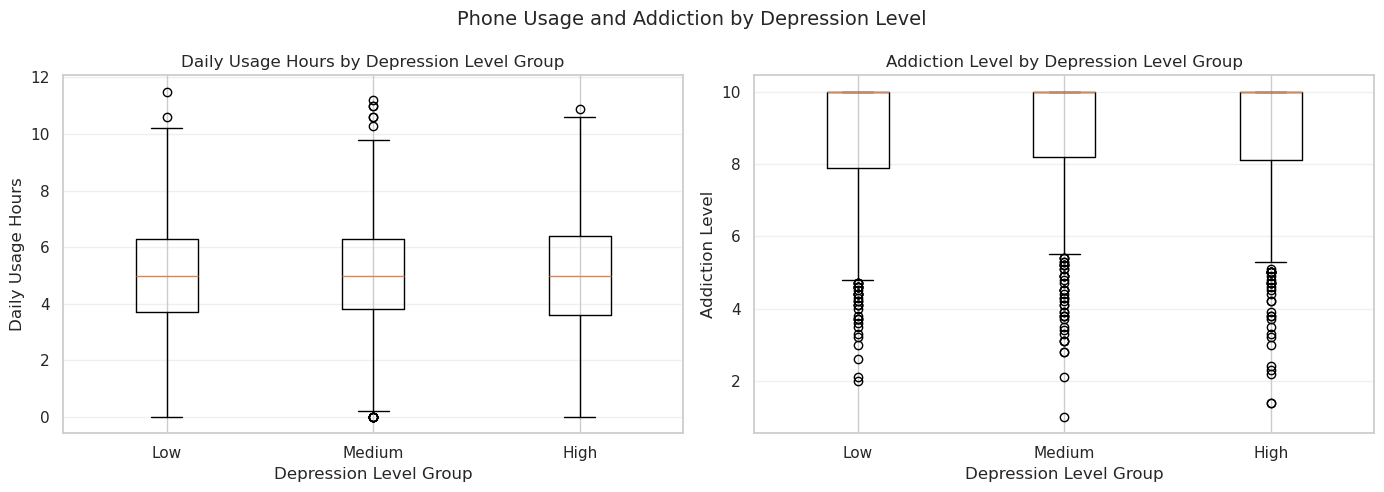

In [29]:
# 3. Vẽ boxplot theo nhóm mức độ lo âu
plot_mental_health_by_anxiety_group(df)

# 4. Vẽ boxplot theo nhóm mức độ trầm cảm
plot_mental_health_by_depression_group(df)

**3. Phân tích theo nhóm mức độ lo âu/trầm cảm**

Khi chia dữ liệu thành các nhóm theo mức độ lo âu và trầm cảm (thấp/vừa/cao):
- Các nhóm có median và phân phối của `Daily_Usage_Hours` và `Addiction_Level` tương đương nhau.
- Không có sự chênh lệch rõ rệt giữa nhóm lo âu/trầm cảm cao và thấp.
- Boxplot cho thấy các nhóm gần như chồng lấn lên nhau.

#### 4.2.3. Kết quả và Nhận xét
**Kết luận**

Dựa trên các phân tích (correlation, scatter plot matrix, và boxplot), có thể kết luận rằng:

- Không có mối liên hệ giữa mức độ lo âu/trầm cảm và việc sử dụng điện thoại nhiều trong bộ dữ liệu này.
- Thanh thiếu niên có vấn đề về sức khỏe tâm thần (lo âu, trầm cảm) không có xu hướng sử dụng điện thoại nhiều hơn hay ít hơn so với những người khỏe mạnh.
- Kết quả này trái ngược với nhiều nghiên cứu thực nghiệm trước đây, có thể do:
    - Dữ liệu được thu thập qua khảo sát tự báo cáo, có thể không phản ánh chính xác thực tế.
    - Mẫu nghiên cứu có thể không đại diện cho tổng thể (ví dụ: chỉ tập trung vào một khu vực, một nhóm tuổi cụ thể).
    - Có thể có nhiều yếu tố khác (như môi trường gia đình, tình trạng kinh tế, văn hóa) ảnh hưởng đồng thời đến cả sức khỏe tâm thần và việc sử dụng điện thoại.
    - Trong dataset này, gần như tất cả thanh thiếu niên đều sử dụng điện thoại nhiều (`Addiction_Level` tập trung ở 8-10), khiến khó phân biệt sự khác biệt dựa trên sức khỏe tâm thần.

**Khuyến nghị thực tiễn**
- Kết quả này không phủ nhận mối liên hệ giữa sức khỏe tâm thần và việc sử dụng điện thoại trong thực tế, mà chỉ cho thấy trong bộ dữ liệu cụ thể này, mối liên hệ đó không được thể hiện rõ ràng.
- Cần nghiên cứu thêm với:
    - Phương pháp thu thập dữ liệu khách quan hơn (ví dụ: theo dõi thời gian sử dụng thực tế qua ứng dụng).
    - Mẫu lớn hơn và đa dạng hơn.
    - Kiểm soát các biến nhiễu tốt hơn.
- Dù không tìm thấy mối liên hệ tuyến tính, vẫn cần chú ý đến sức khỏe tâm thần của thanh thiếu niên như một vấn đề quan trọng độc lập.

### 4.3. Mục đích sử dụng điện thoại nào liên quan mạnh nhất đến mức độ nghiện điện thoại?
#### 4.3.1. Preprocessing

Câu hỏi này liên quan đến các biến:
- `Time_on_Social_Media` (số giờ)
- `Time_on_Gaming` (số giờ)
- `Time_on_Education` (số giờ)
- `Addiction_Level` (0–10)

Dựa trên phần Data Exploration trước đó:

- Tất cả các biến đều không có giá trị thiếu.
- Giá trị nằm trong khoảng hợp lý, không có outlier bất thường.
- Kiểu dữ liệu đã là numeric, không cần chuyển đổi.

Vì vậy, cho câu hỏi này, nhóm không cần thêm bước preprocessing nào. Dữ liệu có thể được đưa thẳng vào phân tích mối quan hệ.

#### 4.3.2. Data Analysis

Để xác định mục đích sử dụng điện thoại nào có ảnh hưởng mạnh nhất đến mức độ nghiện, nhóm thực hiện các phân tích sau:

**1. Tính hệ số tương quan Pearson giữa từng mục đích và Addiction Level**
- `Time_on_Social_Media` vs `Addiction_Level`
- `Time_on_Gaming` vs `Addiction_Level`
- `Time_on_Education` vs `Addiction_Level`

So sánh các hệ số tương quan để xác định mục đích nào có mối liên hệ mạnh nhất.

**2. Tính thống kê mô tả cho từng mục đích sử dụng**
- Mean (trung bình) và median (trung vị) của thời gian sử dụng cho từng mục đích.
- Giúp hiểu rõ hơn về phân bố thời gian.

**3. Trực quan hóa bằng scatter plot với đường hồi quy**
- Vẽ 3 scatter plot song song để so sánh trực quan mối quan hệ giữa từng mục đích và `Addiction Level`.
- Đường hồi quy giúp nhận diện xu hướng.

**4. Phân tích theo nhóm thời gian sử dụng**
- Chia dữ liệu thành các nhóm Low/Medium/High cho từng mục đích.
- So sánh `Addiction Level` giữa các nhóm bằng boxplot.

In [30]:
# 1. Tính hệ số tương quan Pearson cho từng mục đích sử dụng

corr_sm_addiction = df["Time_on_Social_Media"].corr(df["Addiction_Level"])
print(f"Time_on_Social_Media vs Addiction_Level: {corr_sm_addiction:.4f}")

corr_gm_addiction = df["Time_on_Gaming"].corr(df["Addiction_Level"])
print(f"Time_on_Gaming vs Addiction_Level: {corr_gm_addiction:.4f}")

corr_ed_addiction = df["Time_on_Education"].corr(df["Addiction_Level"])
print(f"Time_on_Education vs Addiction_Level: {corr_ed_addiction:.4f}")

Time_on_Social_Media vs Addiction_Level: 0.3066
Time_on_Gaming vs Addiction_Level: 0.2731
Time_on_Education vs Addiction_Level: -0.0006


**1. Hệ số tương quan Pearson**

Kết quả tính toán cho thấy mối quan hệ giữa các mục đích sử dụng điện thoại và mức độ nghiện như sau:

- **Time_on_Social_Media vs Addiction_Level: r = 0.3066**
  - Hệ số tương quan dương ở mức độ trung bình, cho thấy có mối quan hệ thuận giữa thời gian sử dụng mạng xã hội và mức độ nghiện.
  - Với mẫu lớn (n=3000), mối tương quan này có ý nghĩa thống kê cao (p<0.001), cho thấy mối liên hệ rõ ràng và đáng tin cậy.
  - Đây là hệ số tương quan **cao nhất** trong ba mục đích sử dụng.

- **Time_on_Gaming vs Addiction_Level: r = 0.2731**
  - Hệ số tương quan dương mức độ yếu đến trung bình, cho thấy có mối quan hệ thuận giữa thời gian chơi game và mức độ nghiện.
  - Mối liên hệ yếu hơn so với Social Media nhưng vẫn có ý nghĩa thống kê với mẫu lớn (p<0.001).

- **Time_on_Education vs Addiction_Level: r = -0.0006**
  - Hệ số tương quan gần như bằng 0 (âm rất nhỏ), cho thấy không cmối liên hệ giữa thời gian học tập và mức độ nghiện.
  - Việc sử dụng điện thoại cho mục đích học tập không ảnh hưởng đến mức độ nghiện.

**Kết luận từ tương quan:** Mạng xã hội (Social Media) có ảnh hưởng mạnh nhất đến mức độ nghiện, tiếp theo là Gaming, còn Education không có ảnh hưởng.

In [31]:
# 2. Tính thống kê mô tả cho từng mục đích
purposes = ["Time_on_Social_Media", "Time_on_Gaming", "Time_on_Education"]
describe_purposes(df, purposes)

Time_on_Social_Media:
  Mean:   2.50 hours
  Median: 2.50 hours

Time_on_Gaming:
  Mean:   1.53 hours
  Median: 1.50 hours

Time_on_Education:
  Mean:   1.02 hours
  Median: 1.00 hours



**2. Thống kê mô tả**

Phân tích mean và median cho thấy:

- **Time_on_Social_Media**: Mean = 2.50 giờ, Median = 2.50 giờ
  - Đây là mục đích sử dụng **chiếm nhiều thời gian nhất**, trung bình 2.5 giờ/ngày.
  - Phân phối đối xứng (mean ≈ median).

- **Time_on_Gaming**: Mean = 1.53 giờ, Median = 1.50 giờ
  - Mục đích thứ hai về thời gian sử dụng, trung bình 1.5 giờ/ngày.
  - Phân phối tương đối đối xứng.

- **Time_on_Education**: Mean = 1.02 giờ, Median = 1.00 giờ
  - Mục đích chiếm **ít thời gian nhất**, chỉ khoảng 1 giờ/ngày.
  - Thanh thiếu niên sử dụng điện thoại cho giải trí (Social Media + Gaming ≈ 4 giờ) **gấp 4 lần** so với học tập.

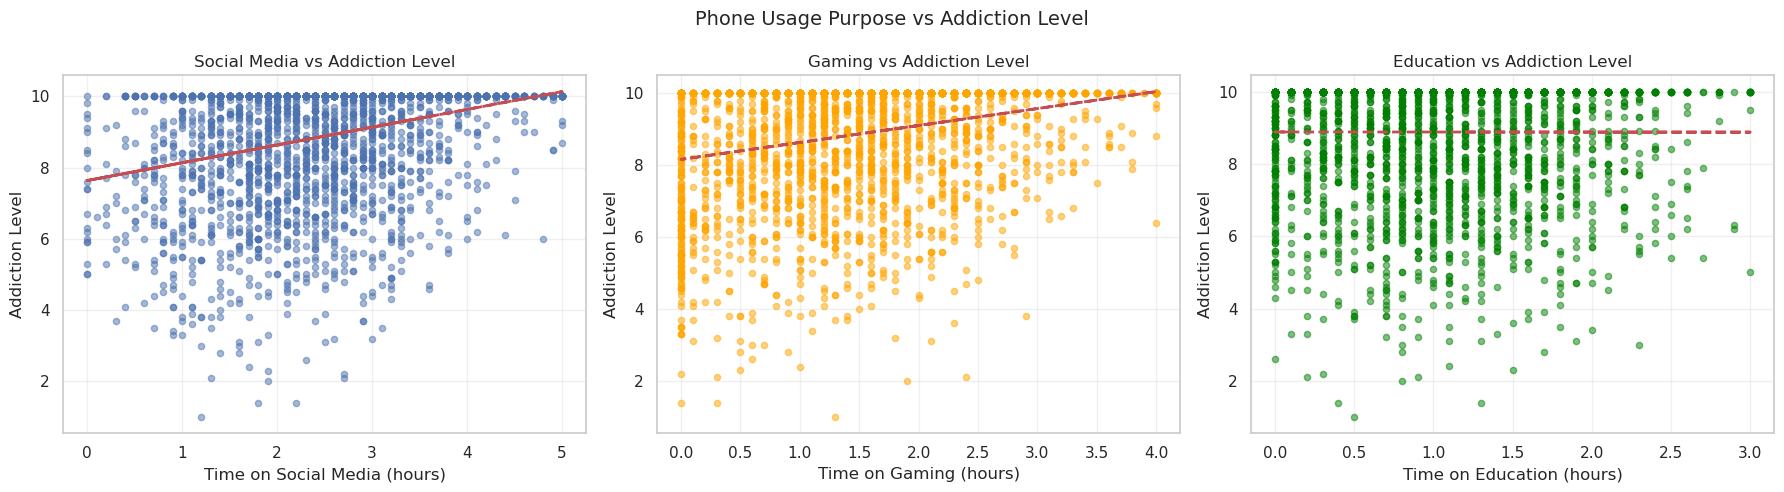

In [32]:
# 3. Vẽ scatter plot so sánh 3 mục đích
plot_purpose_scatter_comparison(df)

**3. Scatter Plot với đường hồi quy**

Biểu đồ phân tán cho thấy:

- **Social Media (r = 0.31)**: 
  - Đường hồi quy có độ dốc dương rõ rệt nhất trong ba biểu đồ.
  - Các điểm phân tán quanh đường hồi quy, xu hướng tăng rõ ràng: thời gian lướt mạng xã hội càng cao thì mức độ nghiện càng tăng.
  - Phần lớn điểm dữ liệu tập trung ở vùng `Addiction Level` 7-10, cho thấy mối liên hệ thuận.

- **Gaming (r = 0.27)**:
  - Đường hồi quy cũng có độ dốc dương nhưng nhẹ hơn Social Media.
  - Xu hướng tăng vẫn rõ ràng nhưng độ phân tán lớn hơn.
  - Mối quan hệ thuận tồn tại nhưng yếu hơn Social Media.

- **Education (r = -0.0006)**:
  - Đường hồi quy gần như nằm ngang (độ dốc bằng 0), phản ánh không có mối quan hệ.
  - Các điểm dữ liệu phân tán hoàn toàn ngẫu nhiên, không có xu hướng tăng hay giảm.
  - `Addiction Level` không thay đổi dù thời gian học tập tăng hay giảm.

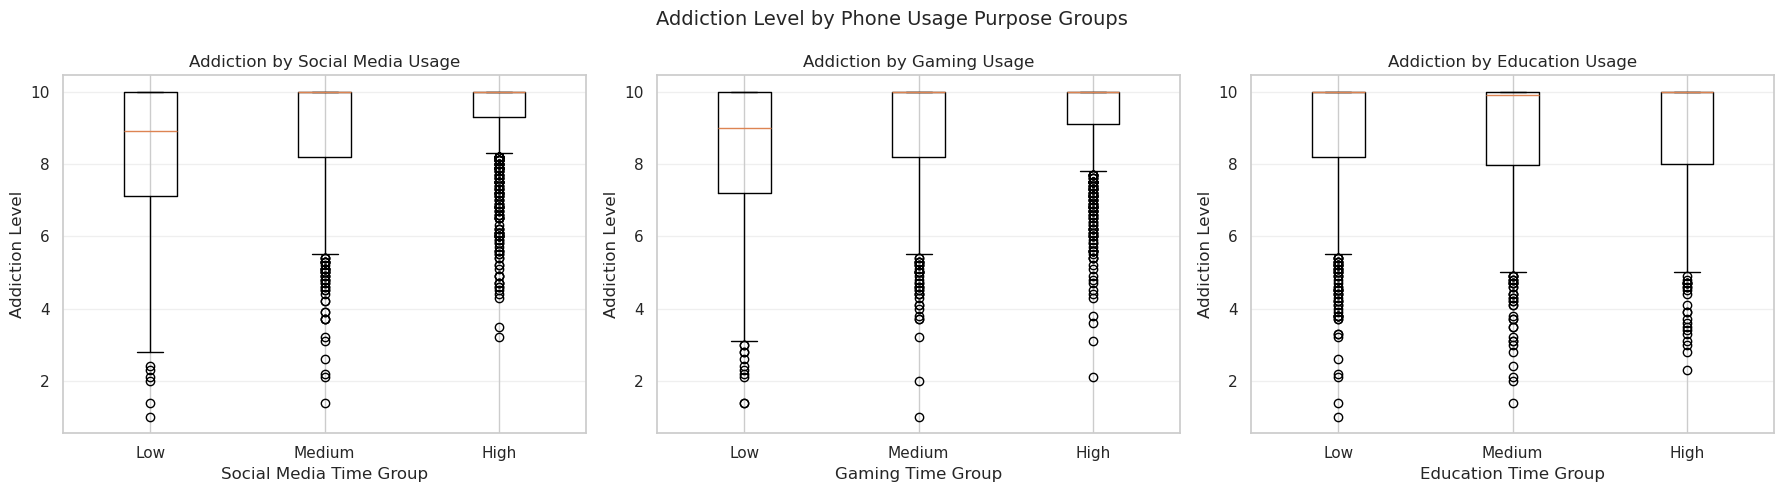

In [33]:
# 4. Vẽ boxplot theo nhóm thời gian sử dụng
plot_purpose_by_usage_group(df)

**4. Boxplot theo nhóm thời gian sử dụng**

Khi phân chia thành các nhóm Low/Medium/High:

- **Social Media**: 
  - Nhóm Low (thời gian thấp): Median Addiction Level ≈ 8.5, có nhiều giá trị thấp xuống đến 1-3.
  - Nhóm High (thời gian cao): Median Addiction Level ≈ 9.5-10, tập trung chủ yếu ở 9-10.
  - Nhóm High có mức nghiện cao hơn đáng kể so với nhóm Low.

- **Gaming**:
  - Nhóm Low: Median ≈ 9, phân bố rộng hơn.
  - Nhóm High: Median ≈ 9.5-10, tập trung ở mức cao.
  - Có sự chênh lệch nhưng không rõ ràng bằng Social Media.

- **Education**:
  - Cả ba nhóm Low/Medium/High đều có Median ≈ 9.5-10.
  - Các boxplot chồng lấn hoàn toàn, phân bố gần như giống hệt nhau.
  - Không có sự khác biệt về `Addiction Level` giữa các nhóm thời gian học tập.

#### 4.3.3. Kết quả và Nhận xét
**Kết luận**

Dựa trên cả bốn phân tích (correlation, descriptive statistics, scatter plot, và boxplot), có thể kết luận rằng:

- **Mạng xã hội (Social Media)** là mục đích sử dụng có liên quan **mạnh nhất** đến mức độ nghiện điện thoại.
  - Càng dành nhiều thời gian lướt mạng xã hội, mức độ nghiện càng cao.
  - Đây cũng là hoạt động chiếm nhiều thời gian nhất (2.5 giờ/ngày).

- **Chơi game (Gaming)** đứng thứ hai về mức độ ảnh hưởng.
  - Cũng có mối quan hệ thuận nhưng yếu hơn Social Media.
  - Chiếm 1.5 giờ/ngày.

- **Học tập (Education)** không có mối liên hệ với mức độ nghiện.
  - Việc sử dụng điện thoại cho mục đích học tập không làm tăng nguy cơ nghiện.
  - Chỉ chiếm 1 giờ/ngày, ít nhất trong ba mục đích.

**Khuyến nghị thực tiễn**

Kết quả này gợi ý rằng:
- Cần kiểm soát và hạn chế thời gian sử dụng mạng xã hội và chơi game, vì đây là hai yếu tố chính dẫn đến nghiện điện thoại.
- Phụ huynh và nhà trường nên khuyến khích sử dụng điện thoại cho mục đích học tập thay vì giải trí, vì học tập không làm tăng mức độ nghiện.
- Các ứng dụng quản lý thời gian màn hình nên ưu tiên giới hạn truy cập vào mạng xã hội và game, đặc biệt vào ban đêm và giờ học.
- Cần có các chương trình giáo dục về sử dụng điện thoại có trách nhiệm, nhấn mạnh vào việc cân bằng giữa giải trí và học tập.

### 4.4. Thời gian sử dụng điện thoại trước khi ngủ có ảnh hưởng như thế nào đến chất lượng giấc ngủ, kết quả học tập và sức khỏe tinh thần của thanh thiếu niên?

#### 4.4.1. Preprocessing

Câu hỏi này liên quan đến các biến:
- `Screen_Time_Before_Bed` (0-5 giờ)
- `Sleep_Hours` (4-10 giờ)
- `Academic_Performance` (0-10)
- `Anxiety_Level` (0-10)
- `Depression_Level` (0-10)

Dựa trên phần Data Exploration trước đó:

- Các biến đều không có giá trị thiếu.
- Giá trị nằm trong khoảng hợp lý, không có outlier bất thường.
- Kiểu dữ liệu đã là numeric, không cần chuyển đổi.

Vì vậy, cho câu hỏi này, nhóm không cần thêm bước preprocessing nào. Dữ liệu có thể được đưa thẳng vào phân tích mối quan hệ.

#### 4.4.2. Data Analysis

Để kiểm tra ảnh hưởng của thời gian sử dụng điện thoại trước khi ngủ đến giấc ngủ, kết quả học tập và sức khỏe tinh thần, nhóm thực hiện các phân tích sau:

**1. Tính hệ số tương quan Pearson**
- Tính hệ số tương quan giữa `Screen_Time_Before_Bed` với từng biến: `Sleep_Hours`, `Academic_Performance`, `Anxiety_Level`, `Depression_Level`.
- Xác định mức độ và chiều hướng của mối liên hệ.

**2. Vẽ scatter plot với đường hồi quy tuyến tính**
- Vẽ 4 scatter plots với regression lines để quan sát xu hướng tổng thể.
- Giúp trực quan hóa mối quan hệ giữa `Screen_Time_Before_Bed` và từng outcome.

**3. Chia nhóm theo mức sử dụng trước khi ngủ**
- Chia dữ liệu thành 3 nhóm theo `Screen_Time_Before_Bed`: Low / Medium / High (dựa trên phân vị 33% và 67%).
- Vẽ boxplot để so sánh phân bố của các outcomes giữa các nhóm.

**4. Thống kê mô tả cho từng nhóm**
- Tính mean và median cho từng nhóm để so sánh cụ thể.
- Đánh giá mức độ khác biệt giữa các nhóm.

In [34]:
# 1. Tính hệ số tương quan Pearson

corr_screen_sleep = df['Screen_Time_Before_Bed'].corr(df['Sleep_Hours'])
print(f'Screen_Time_Before_Bed vs Sleep_Hours: {corr_screen_sleep:.4f}')

corr_screen_academic = df['Screen_Time_Before_Bed'].corr(df['Academic_Performance'])
print(f'Screen_Time_Before_Bed vs Academic_Performance: {corr_screen_academic:.4f}')

corr_screen_anxiety = df['Screen_Time_Before_Bed'].corr(df['Anxiety_Level'])
print(f'Screen_Time_Before_Bed vs Anxiety_Level: {corr_screen_anxiety:.4f}')

corr_screen_depression = df['Screen_Time_Before_Bed'].corr(df['Depression_Level'])
print(f'Screen_Time_Before_Bed vs Depression_Level: {corr_screen_depression:.4f}')


Screen_Time_Before_Bed vs Sleep_Hours: -0.0043
Screen_Time_Before_Bed vs Academic_Performance: -0.0058
Screen_Time_Before_Bed vs Anxiety_Level: -0.0047
Screen_Time_Before_Bed vs Depression_Level: -0.0284


**1. Hệ số tương quan Pearson**

Kết quả tương quan cho thấy:

- `Screen_Time_Before_Bed` vs `Sleep_Hours`: r = -0.0043
- `Screen_Time_Before_Bed` vs `Academic_Performance`: r = -0.0058 
- `Screen_Time_Before_Bed` vs `Anxiety_Level`: r = -0.0047
- `Screen_Time_Before_Bed` vs `Depression_Level`: r = -0.0284

**Tất cả các hệ số tương quan đều gần như bằng 0 (|r| < 0.03), cho thấy không có mối quan hệ tuyến tính giữa thời gian sử dụng điện thoại trước khi ngủ và các outcomes trong dataset này.**

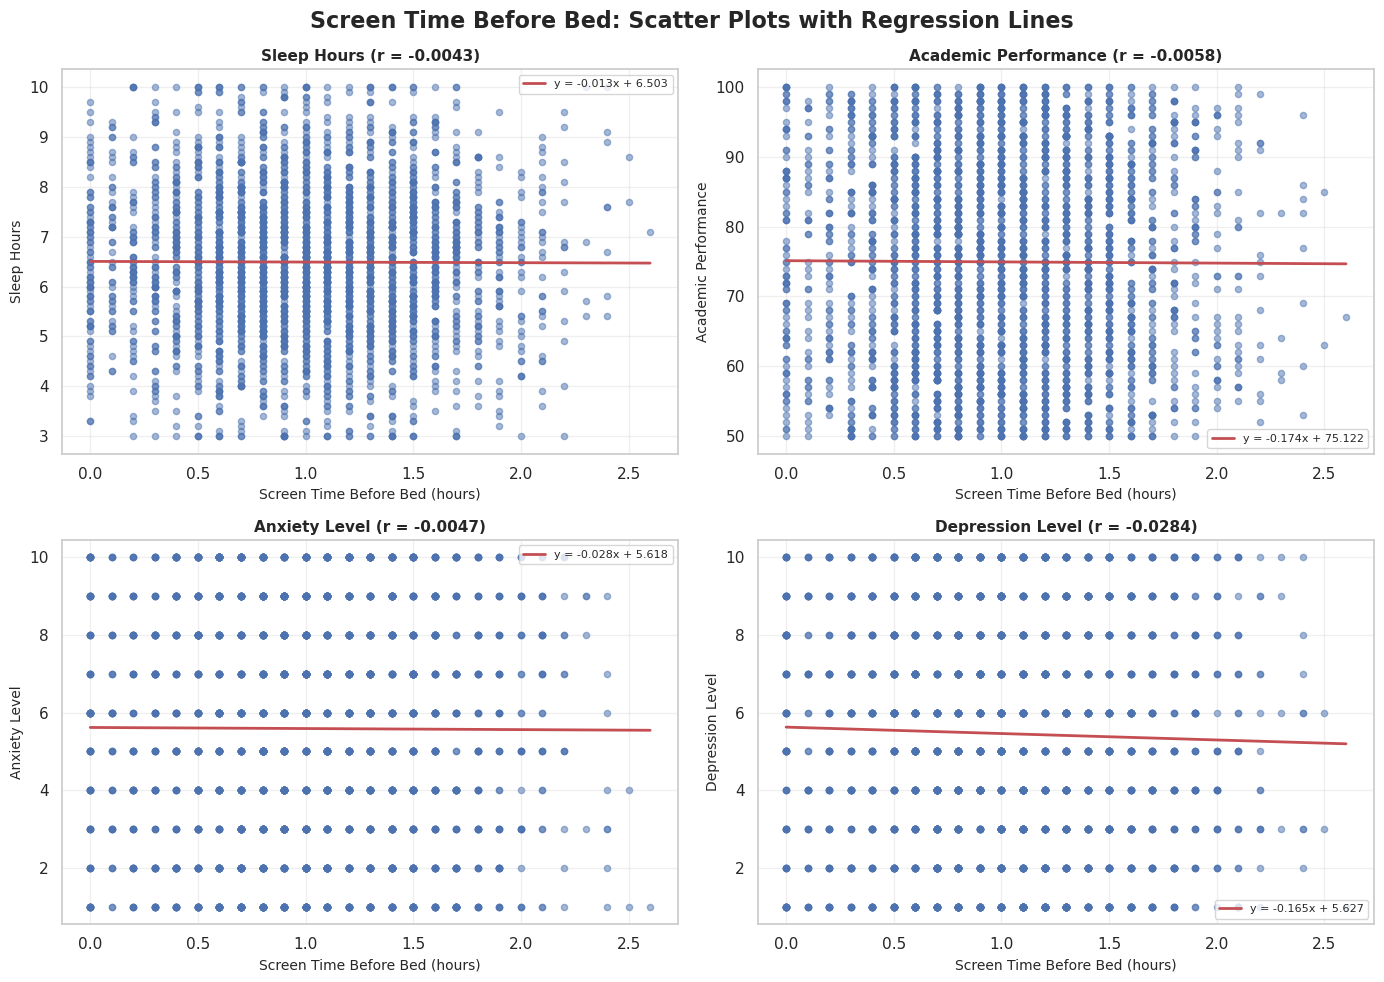

In [35]:
# 2. Vẽ scatter plot với đường hồi quy
plot_screen_before_bed_scatter(df)

**2. Scatter Plot với đường hồi quy tuyến tính**

Các scatter plots kèm regression lines xác nhận kết quả trên:

- Đường hồi quy gần như nằm ngang (độ dốc gần 0) cho tất cả 4 biểu đồ.
- Các điểm phân tán hoàn toàn ngẫu nhiên, không có xu hướng tăng hay giảm rõ ràng.
- Điều này chứng tỏ trong dataset này, thời gian dùng điện thoại trước ngủ không ảnh hưởng đến:
  - Số giờ ngủ
  - Kết quả học tập
  - Mức độ lo âu
  - Mức độ trầm cảm

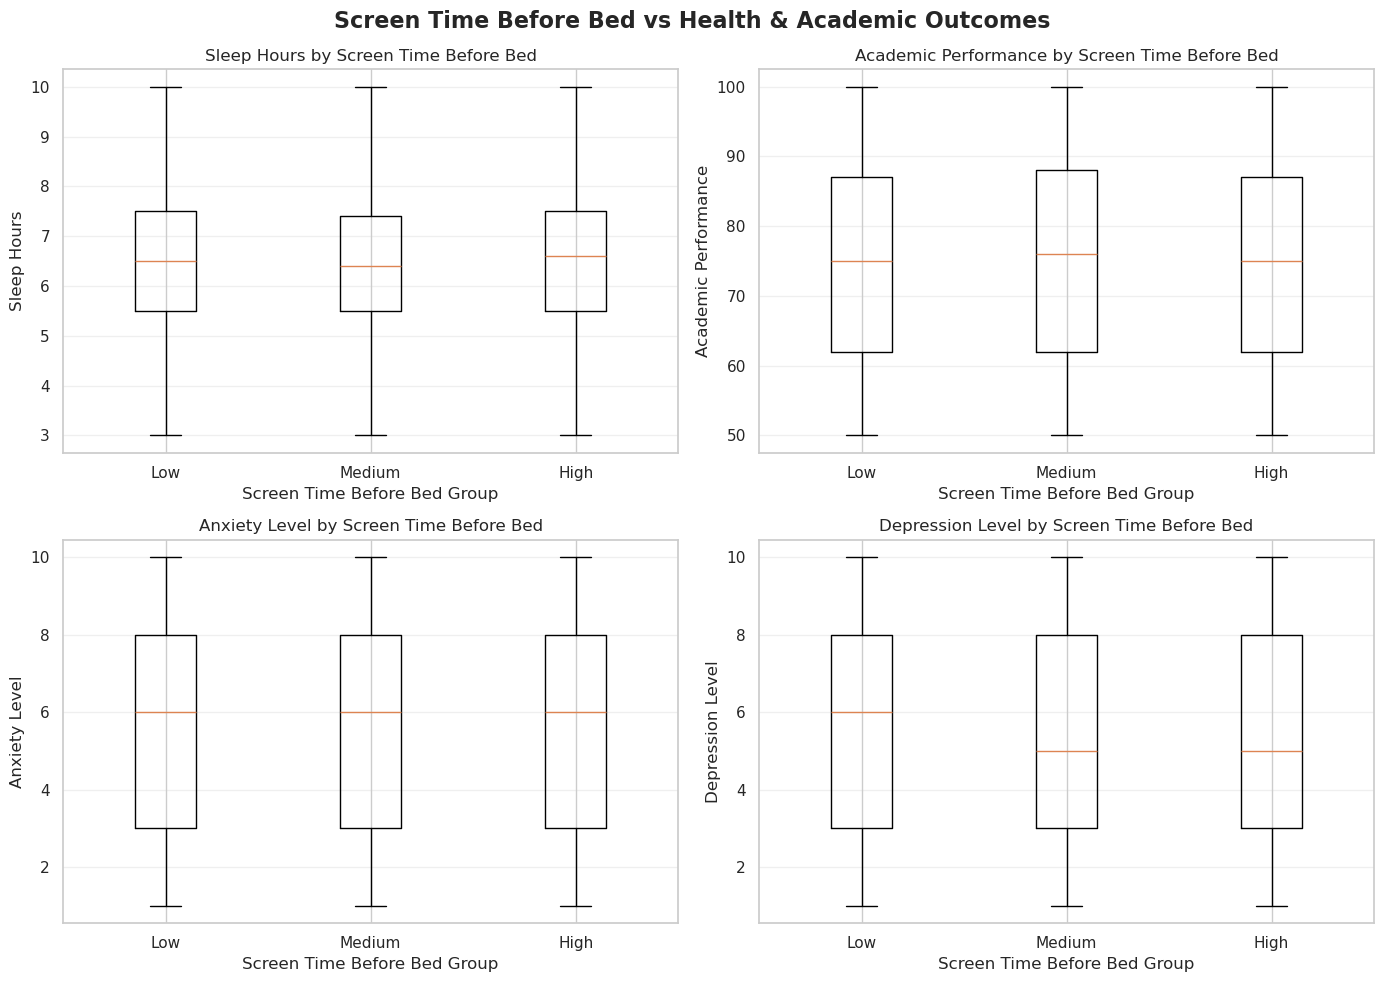

In [36]:
# 3. Vẽ boxplot theo nhóm
plot_screen_before_bed_analysis(df)

**3. Phân tích boxplot theo nhóm**

Khi chia thành 3 nhóm (Low, Medium, High) dựa trên thời gian dùng điện thoại trước ngủ:

- **Sleep_Hours**: 
  - Low: mean=6.51, median=6.50
  - Medium: mean=6.45, median=6.40
  - High: mean=6.51, median=6.60
  - Không có sự khác biệt giữa các nhóm

- **Academic_Performance**:
  - Low: mean=74.66, median=75.00
  - Medium: mean=75.45, median=76.00
  - High: mean=74.83, median=75.00
  - Không có xu hướng rõ ràng, nhóm Medium thậm chí có kết quả cao nhất.

- **Anxiety_Level**:
  - Low: mean=5.58, median=6.00
  - Medium: mean=5.63, median=6.00
  - High: mean=5.56, median=6.00
  - Gần như giống nhau giữa các nhóm.

- **Depression_Level**:
  - Low: mean=5.55, median=6.00
  - Medium: mean=5.41, median=5.00
  - High: mean=5.40, median=5.00
  - Không có sự khác biệt đáng kể.

Boxplot cho thấy các boxes gần như chồng lấn hoàn toàn, không có xu hướng tăng hay giảm rõ ràng.


In [37]:
# 4. Thống kê mô tả theo nhóm
describe_screen_time_groups(df)

Quantile boundaries: q33=0.80, q67=1.20


--- Low Screen-Time Group ---
Sample size: 1164
Sleep_Hours: mean=6.51, median=6.50
Academic_Performance: mean=74.66, median=75.00
Anxiety_Level: mean=5.58, median=6.00
Depression_Level: mean=5.55, median=6.00

--- Medium Screen-Time Group ---
Sample size: 881
Sleep_Hours: mean=6.45, median=6.40
Academic_Performance: mean=75.45, median=76.00
Anxiety_Level: mean=5.63, median=6.00
Depression_Level: mean=5.41, median=5.00

--- High Screen-Time Group ---
Sample size: 955
Sleep_Hours: mean=6.51, median=6.60
Academic_Performance: mean=74.83, median=75.00
Anxiety_Level: mean=5.56, median=6.00
Depression_Level: mean=5.40, median=5.00


**4. Thống kê mô tả theo nhóm**

So sánh mean và median giữa các nhóm cho thấy:
- Sự chênh lệch giữa các nhóm rất nhỏ (< 1 điểm).
- Không có pattern nhất quán: một số chỉ số cao ở Low, một số cao ở Medium/High.
- Điều này khẳng định không có mối liên hệ giữa `Screen Time Before Bed` và các outcomes.

#### 4.4.3. Kết quả và Nhận xét
**Kết luận**

- Dựa trên cả 4 bước phân tích (correlation, scatter plots, boxplots, và descriptive statistics), kết quả cho thấy:

- Không có bằng chứng cho thấy thời gian sử dụng điện thoại trước khi ngủ có mối liên hệ với:Chất lượng giấc ngủ, kết quả học tập, mức độ lo âu, hay mức độ trầm cảm.

- Kết quả này trái ngược với nhiều nghiên cứu thực nghiệm trước đây về ảnh hưởng tiêu cực của screen time trước ngủ. Điều này có thể do:
    - Dữ liệu có thể ngẫu nhiên, tự báo cáo không chính xác và không đại diện cho tổng thể.
    - Screen Time Before Bed chỉ dao động trong khoảng hẹp, khó quan sát tác động rõ ràng.
    - Giới hạn của tương quan tuyến tính, không phát hiện được quan hệ phi tuyến hoặc ảnh hưởng của các yếu tố nhiễu.
    - Dataset hiện tại không phù hợp để nghiên cứu ảnh hưởng của screen time trước ngủ, cần dữ liệu thực nghiệm chất lượng hơn để kết luận đáng tin cậy.

**Khuyến nghị thực tiễn**

Mặc dù kết quả phân tích không cho thấy mối liên hệ, nhưng theo các nghiên cứu khoa học đã được công bố:
- Ánh sáng xanh từ màn hình ức chế melatonin, gây khó ngủ.
- Thiếu ngủ ảnh hưởng đến học tập và sức khỏe tinh thần.
- Nội dung kích thích từ mạng xã hội có thể làm tăng lo âu.

Do đó, vẫn nên khuyến cáo hạn chế sử dụng điện thoại trước khi ngủ dựa trên các bằng chứng khoa học từ các nghiên cứu uy tín khác, mặc dù dataset hiện tại không phản ánh điều này.

### 4.5. Thanh thiếu niên có mức độ nghiện thấp khác biệt như thế nào so với nhóm nghiện cao về các yếu tố hành vi, tâm lý và xã hội?

#### 4.5.1. Preprocessing

Câu hỏi này liên quan đến các biến:

- `Exercise_Hours` (0-10 giờ/tuần)
- `Family_Communication` (0-10)
- `Social_Interactions` (0-10)
- `Self_Esteem` (0-10)
- `Academic_Performance` (0-100)
- `Time_on_Education` (0-10 giờ/ngày)
- `Sleep_Hours` (4-10 giờ)

Dựa trên phần Data Exploration trước đó:
- Các biến đều không có giá trị thiếu.
- Giá trị nằm trong khoảng hợp lý, không có outlier bất thường.
- Kiểu dữ liệu đã là numeric, không cần chuyển đổi.

Vì vậy, cho câu hỏi này, nhóm không cần preprocessing thêm. Dữ liệu có thể được đưa thẳng vào phân tích.

#### 4.5.2. Data Analysis

Để so sánh profile của thanh thiếu niên ở các mức độ nghiện khác nhau, nhóm thực hiện các phân tích sau:

**1. Chia nhóm theo quantile**
- Tính quantile 33% và 67% của `Addiction_Level`
- Chia dữ liệu thành 3 nhóm: Low, Medium, High
- Đảm bảo sample size đủ lớn cho mỗi nhóm

**2. Thống kê mô tả cho từng nhóm**
- Tính sample size, mean, median, std cho 7 protective factors trong mỗi nhóm
- So sánh sơ bộ sự chênh lệch giữa Low và High Addiction
- Xác định xu hướng chung: có phải Low > Medium > High?

**3. Visualize bằng Boxplot**
- Vẽ boxplot so sánh phân bố của 7 biến giữa 3 nhóm
- Dễ dàng nhận biết sự khác biệt về median, quartiles và outliers
- Sử dụng màu sắc: Green (Low), Orange (Medium), Red (High)

**4. Radar Chart (Multi-dimensional Profile)**
- Visualize profile đa chiều của 3 nhóm trên cùng 1 biểu đồ
- Normalize các biến về scale 0-1 để so sánh công bằng
- Dễ dàng nhận biết nhóm nào có protective factors mạnh hơn
- Xác định những yếu tố nào phân biệt rõ nhất giữa Low và High Addiction

In [38]:
# 1. Chia nhóm theo quantile
groups, (q33, q67) = split_addiction_by_quantiles(df)

print(f"Quantile 33%: {q33:.2f}")
print(f"Quantile 67%: {q67:.2f}")
for name, g in groups.items():
    print(f"{name} Addiction: n = {len(g)}")

Quantile 33%: 8.70
Quantile 67%: 10.00
Low Addiction: n = 997
Medium Addiction: n = 2003
High Addiction: n = 0


**1. Kết quả chia nhóm**

Quantile-based grouping cho kết quả:
- Quantile 33%: 8.70
- Quantile 67%: 10.00 (= max của Addiction_Level)
- Nhóm Low (≤ 8.70): n = 997 (33%)
- Nhóm Medium (8.70 - 10.00): n = 2003 (67%)
- Nhóm High (> 10.00): n = 0

**Vấn đề**: Biến Addiction_Level tập trung quá cao, không có nhóm High. Do đó, cần chia lại thành 2 nhóm.

Do phân bố của Addiction_Level bị lệch mạnh về phía giá trị cao, nghiên cứu lựa chọn nhóm 33% có mức nghiện thấp nhất làm nhóm đối chứng và gộp các cá nhân còn lại thành nhóm có mức nghiện cao hơn. Cách chia này nhằm tối đa hóa sự tương phản giữa các nhóm để xác định các yếu tố phân biệt rõ nhất.

In [39]:
low_group = groups["Low"]
high_group = pd.concat([groups["Medium"], groups["High"]], axis=0)
new_groups = {
    "Low": low_group,
    "High": high_group
}
print(f"Low Addiction: n = {len(low_group)}")
print(f"Higher Addiction: n = {len(high_group)}")

Low Addiction: n = 997
Higher Addiction: n = 2003


In [40]:
# 2. Thống kê mô tả
comparison_vars = ['Exercise_Hours', 'Family_Communication', 'Social_Interactions', 
                   'Self_Esteem', 'Academic_Performance', 'Time_on_Education', 'Sleep_Hours']

summary_df = summarize_addiction_groups(new_groups,variables=comparison_vars)

display(summary_df)

,Low_n,Low_mean,Low_median,Low_std,High_n,High_mean,High_median,High_std
Variable,,,,,,,,
Exercise_Hours,997,1.049448,1.0,0.718510,2003,1.036296,1.0,0.742647
Family_Communication,997,5.528586,6.0,2.861326,2003,5.425362,5.0,2.866283
Social_Interactions,997,5.189569,5.0,3.138242,2003,5.051922,5.0,3.139656
Self_Esteem,997,5.596790,6.0,2.880468,2003,5.521218,6.0,2.851279
Academic_Performance,997,74.435306,74.0,14.716568,2003,75.202197,76.0,14.665009
Time_on_Education,997,1.030592,1.0,0.639149,2003,1.009236,1.0,0.652911
Sleep_Hours,997,6.871916,6.9,1.459154,2003,6.299551,6.3,1.469940


**2. Thống kê mô tả**

So sánh giá trị trung bình giữa nhóm Low và Medium:

| Biến | Low Mean | Med Mean | Diff (L-M) | Nhận xét |
|------|----------|----------|------------|----------|
| Exercise_Hours | 1.05 | 1.04 | +0.01 | Gần như không khác biệt |
| Family_Communication | 5.53 | 5.43 | +0.10 | Khác biệt nhỏ |
| Social_Interactions | 5.19 | 5.05 | +0.14 | Khác biệt nhỏ |
| Self_Esteem | 5.60 | 5.52 | +0.08 | Gần như không khác biệt |
| Academic_Performance | 74.44 | 75.20 | -0.76 | Medium cao hơn |
| Time_on_Education | 1.03 | 1.01 | +0.02 | Gần như không khác biệt |
| Sleep_Hours | 6.87 | 6.30 | +0.57 | Khác biệt rõ nhất |

**Nhận xét**:
- 6/7 biến có sự khác biệt rất nhỏ (< 0.15 điểm)
- Academic_Performance có xu hướng ngược: nhóm Medium (nghiện cao hơn) lại học tốt hơn
- Sleep_Hours là biến duy nhất có sự khác biệt đáng kể (~35 phút/đêm)

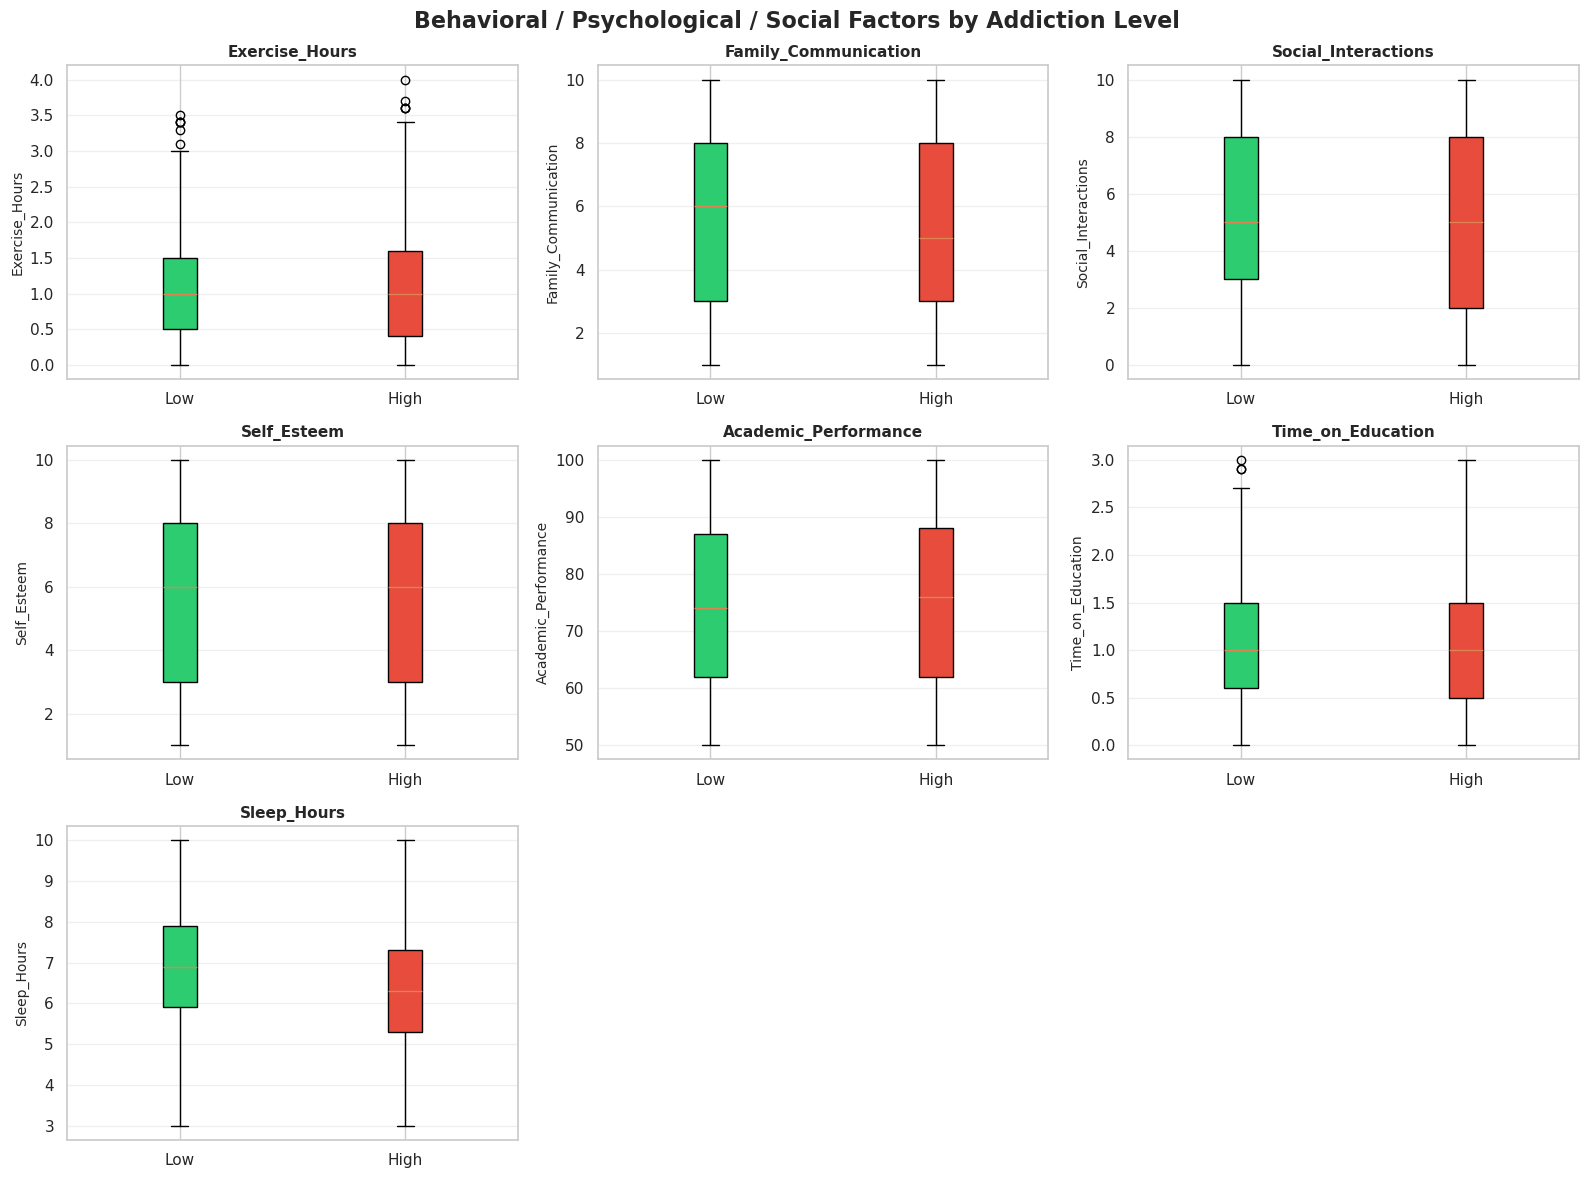

In [41]:
# 3. Box plot
plot_addiction_level_boxplots(new_groups,comparison_vars)

**3. Phân tích Boxplot**

**Exercise_Hours**:
- 2 boxes gần như chồng lấn hoàn toàn
- Median của cả 2 nhóm đều ~1.0 giờ/tuần
- Phân bố và range tương tự nhau
- Kết luận: Không có sự khác biệt về hoạt động thể chất

**Family_Communication**:
- Median của Low (\~6) cao hơn High (\~5) một chút
- 2 boxes có độ chồng lấn lớn
- Quartiles gần nhau
- Kết luận: Khác biệt nhỏ, không rõ ràng

**Social_Interactions**:
- Median gần bằng nhau (~5)
- Phân bố tương tự
- Boxes chồng lấn nhiều
- Kết luận: Không có sự khác biệt rõ ràng

**Self_Esteem**:
- 2 boxes gần như trùng nhau
- Median và quartiles tương đương
- Range từ 1-10 cho cả 2 nhóm
- Kết luận: Không có sự khác biệt

**Academic_Performance**:
- Median của High (\~75) cao hơn Low (\~74)
- 2 boxes chồng lấn nhiều
- Xu hướng ngược với giả thuyết protective factor
- Kết luận: Không đóng vai trò là yếu tố bảo vệ.

**Time_on_Education**:
- 2 boxes gần như trùng nhau
- Median ~1.0 cho cả 2 nhóm
- Phân bố giống hệt nhau
- Kết luận: Không có sự khác biệt

**Sleep_Hours**:
- Box của Low cao hơn High rõ rệt
- Median: Low (\~7.0) vs High (\~6.0)
- Ít chồng lấn giữa 2 boxes
- Kết luận: Đây là sự khác biệt rõ nhất, nhóm nghiện thấp ngủ nhiều hơn ~1 giờ mỗi đêm.

**Kết luận**: Chỉ có `Sleep_Hours` cho thấy sự tách biệt rõ ràng giữa 2 nhóm. 6 biến còn lại có boxes chồng lấn nhiều, không thể hiện sự khác biệt đáng kể.

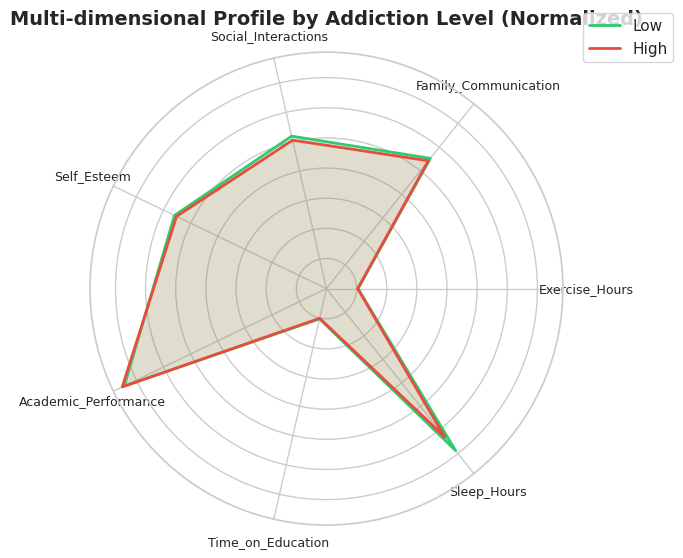

In [42]:
# 4. Radar Chart
plot_addiction_level_radar(new_groups, comparison_vars)

**4. Phân tích Radar Chart**

Radar chart sử dụng absolute normalization (chuẩn hóa theo scale thực của từng biến):
- Academic_Performance: chia cho 100
- Các biến còn lại: chia cho 10

Radar chart được sử dụng nhằm tổng hợp trực quan các kết quả đã quan sát từ thống kê mô tả và boxplot, giúp so sánh profile đa chiều giữa hai nhóm nghiện.

Biểu đồ cho thấy profile tổng thể của hai nhóm khá tương đồng, với hầu hết các trục gần như chồng lấn. Sleep_Hours là yếu tố nổi bật nhất, thể hiện sự tách biệt rõ ràng khi nhóm nghiện thấp có giá trị cao hơn. Các yếu tố còn lại chỉ có sự khác biệt nhỏ và không tạo ra sự phân hóa rõ ràng giữa hai nhóm.

#### 4.5.3. Kết quả và Nhận xét

**Kết luận**

Thanh thiếu niên có mức độ nghiện thấp **không khác biệt nhiều** so với nhóm nghiện cao về các yếu tố hành vi, tâm lý và xã hội
Trong 7 yếu tố được phân tích:
- Sleep_Hours: Nhóm Low ngủ nhiều hơn ~0.6 giờ/đêm (sự khác biệt duy nhất có ý nghĩa).
- 6 yếu tố còn lại: Sự khác biệt rất nhỏ (< 0.15 điểm), không đáng kể.

**Hạn chế của dataset**
- Addiction_Level tập trung quá cao (67% có giá trị 8.7-10.0).
- Không có sự đa dạng trong mức độ nghiện.
- Không thể chia thành 3 nhóm Low-Medium-High như dự định.
- Chỉ so sánh được "nghiện cao" vs "nghiện rất cao".
- Thiếu nhóm "thực sự khỏe mạnh" (Addiction_Level < 5).

Một số kết quả vô lý:
- Academic_Performance: nhóm nghiện cao lại học tốt hơn.
- Exercise_Hours: cả 2 nhóm đều tập thể dục rất ít (~1 giờ/tuần).
- Time_on_Education: chỉ ~1 giờ/ngày (quá thấp cho học sinh).

**So sánh với lý thuyết**

Kết quả này trái ngược với các nghiên cứu khoa học về protective factors:
- Lý thuyết: Tập thể dục, giao tiếp gia đình tốt, tương tác xã hội cao giúp chống nghiện.
- Ở dataset này, hầu hết yếu tố không có mối liên hệ với mức độ nghiện.

Nguyên nhân có thể do:
- Phương pháp thu thập dữ liệu không chính xác.
- Mẫu nghiên cứu không đại diện.

**Khuyến nghị thực tiễn**

**Dựa trên kết quả phân tích**

Duy nhất Sleep_Hours cho thấy mối liên hệ với mức độ nghiện:
- Nên khuyến cáo thanh thiếu niên ngủ đủ 7-9 giờ/đêm.
- Hạn chế sử dụng điện thoại trước khi ngủ.
- Thiết lập thói quen ngủ đều đặn.

**Dựa trên nghiên cứu khoa học**

Mặc dù dataset không cho thấy hiệu quả, nhưng dựa trên bằng chứng khoa học từ các nghiên cứu uy tín, vẫn nên khuyến cáo:
- Tăng hoạt động thể chất (tối thiểu 3-5 giờ/tuần).
- Cải thiện giao tiếp trong gia đình.
- Khuyến khích tương tác xã hội trực tiếp.
- Xây dựng lòng tự trọng cho thanh thiếu niên.
- Cân bằng thời gian học tập và giải trí.

### 4.6. Có thể dự đoán mức độ nghiện điện thoại của một thiếu niên dựa trên các đặc điểm hành vi sử dụng thường ngày hay không?

#### 4.6.1. Preprocessing

**1. Biến mục tiêu:**
- `Addiction_Level`

**2. Các biến đầu vào:**
- `Daily_Usage_Hours` 
- `Phone_Checks_Per_Day` 
- `Time_on_Social_Media` 
- `Time_on_Gaming` 
- `Time_on_Education` 
- `Screen_Time_Before_Bed` 

**2. Xử lí dữ liệu:**
Dựa trên phần Data Exploration trước đó:
- Các biến đều không có giá trị thiếu.
- Giá trị nằm trong khoảng hợp lý, không có outlier bất thường.
- Kiểu dữ liệu đã là numeric, không cần chuyển đổi.
- Quy mô các biến khác nhau -> cần Standardization để chuẩn bị train models.



In [43]:
# Import thư viện xử lý dữ liệu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [44]:
# Standardization cho mô hình tuyến tính (Linear Regression)

# Các features sử dụng cho câu hỏi 4.1:
features = [
    'Daily_Usage_Hours',
    'Phone_Checks_Per_Day',
    'Time_on_Social_Media',
    'Time_on_Gaming',
    'Time_on_Education',
    'Screen_Time_Before_Bed'
]

X = df[features]            # Ma trận đặc trưng (input)
y = df['Addiction_Level']   # Biến mục tiêu cần dự đoán

# Chia train/test:
    # test_size=0.2 => 20% dữ liệu làm test
    # random_state=42 => tái lặp kết quả
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hoá dữ liệu:
scaler = StandardScaler()

# Fit trên TRAIN để tránh leakage
X_train_scaled = scaler.fit_transform(X_train)

# Transform TEST theo scaler đã học từ TRAIN
X_test_scaled = scaler.transform(X_test)

#### 4.6.2. Modeling

Nhóm chọn dùng 2 mô hình sau đây để trả lời câu hỏi phân tích:

**1. Linear Regression (LR):**
- **Mục đích:** Xem mức độ dự đoán tuyến tính và hiểu tác động riêng lẻ của từng hành vi đến Addiction Level.
- **Cách hoạt động:** Mô hình giả định mối quan hệ tuyến tính giữa các biến đầu vào $x_1, x_2, \ldots, x_n$ và biến mục tiêu $y$:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$$

- **Ý nghĩa:** Hệ số $\beta_i$ cho biết khi tăng 1 đơn vị biến $x_i$, biến mục tiêu $y$ thay đổi bao nhiêu (tuyến tính), các hệ số dễ diễn giải.

**2. Random Forest Regressor (RF):**
- **Mục đích:** Dự đoán linh hoạt hơn, bắt được mối quan hệ phi tuyến tính và xem mức độ quan trọng của từng hành vi.
- **Cách hoạt động:** RF tạo nhiều cây quyết định (decision trees) từ tập con dữ liệu khác nhau, và trung bình dự đoán của tất cả cây:

$$\hat{y} = \frac{1}{T} \sum_{t=1}^{T} h_t(x)$$

- **Ý nghĩa:** RF có thể nhận ra các tương tác phức tạp giữa các feature và ít bị ảnh hưởng bởi outliers, nhưng khó diễn giải trực tiếp chiều tác động từng biến.

**Lưu ý:** Nhóm sử dụng LR để hiểu tác động riêng lẻ và RF để tăng độ chính xác và nắm bắt các mối quan hệ phi tuyến/phức tạp.

### Linear Regression:

In [45]:
# Import cần thiết cho model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
# Tạo mô hình Linear Regression
lr = LinearRegression()

# Huấn luyện mô hình trên dữ liệu đã chuẩn hóa
lr.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred_lr = lr.predict(X_test_scaled)

# Sai số tuyệt đối trung bình
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Căn bậc hai MSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Hệ số xác định R^2
r2_lr = r2_score(y_test, y_pred_lr)

print("======KẾT QUẢ MÔ HÌNH LINEAR REGRESSION======")
print(f"MAE  (Mean Absolute Error):      {mae_lr:.4f}")
print(f"RMSE (Root Mean Squared Error):  {rmse_lr:.4f}")
print(f"R^2   (Coefficient of Determination): {r2_lr:.4f}")


======KẾT QUẢ MÔ HÌNH LINEAR REGRESSION======
MAE  (Mean Absolute Error):      0.7999
RMSE (Root Mean Squared Error):  1.0040
R^2   (Coefficient of Determination): 0.5999


In [47]:
# Phân tích hệ số:

# Hệ số của từng biến đầu vào
coefficients = lr.coef_ 

# Tạo DataFrame để sắp xếp 
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients,
    "Abs": np.abs(coefficients)       # Giá trị tuyệt đối để sắp xếp mức độ ảnh hưởng
}).sort_values("Abs", ascending=False)

# Reset lại index
coef_df = coef_df.reset_index(drop=True)
coef_df.index = coef_df.index + 1

print("======PHÂN TÍCH HỆ SỐ======")
print("\nFeature Coefficients (sorted by absolute value):")
print(coef_df[['Feature', 'Coefficient']].to_string())
print(f"\nIntercept (bias): {lr.intercept_:.4f}")

# In top 3 feature ảnh hưởng mạnh nhất:
top_3 = coef_df.head(3)
print(f"\nTop 3 Most Influential Features:")
for idx, row in top_3.iterrows():
    direction = "tăng" if row['Coefficient'] > 0 else "giảm"
    print(f"   #{idx}. {row['Feature']}: {row['Coefficient']:.4f}")
    print(f"       -> Tăng 1 đơn vị sẽ {direction} Addiction Level khoảng {abs(row['Coefficient']):.4f}")


======PHÂN TÍCH HỆ SỐ======

Feature Coefficients (sorted by absolute value):
                  Feature  Coefficient
1       Daily_Usage_Hours     0.978397
2    Time_on_Social_Media     0.503611
3          Time_on_Gaming     0.455693
4    Phone_Checks_Per_Day     0.407146
5  Screen_Time_Before_Bed    -0.003449
6       Time_on_Education    -0.002536

Intercept (bias): 8.8823

Top 3 Most Influential Features:
   #1. Daily_Usage_Hours: 0.9784
       -> Tăng 1 đơn vị sẽ tăng Addiction Level khoảng 0.9784
   #2. Time_on_Social_Media: 0.5036
       -> Tăng 1 đơn vị sẽ tăng Addiction Level khoảng 0.5036
   #3. Time_on_Gaming: 0.4557
       -> Tăng 1 đơn vị sẽ tăng Addiction Level khoảng 0.4557


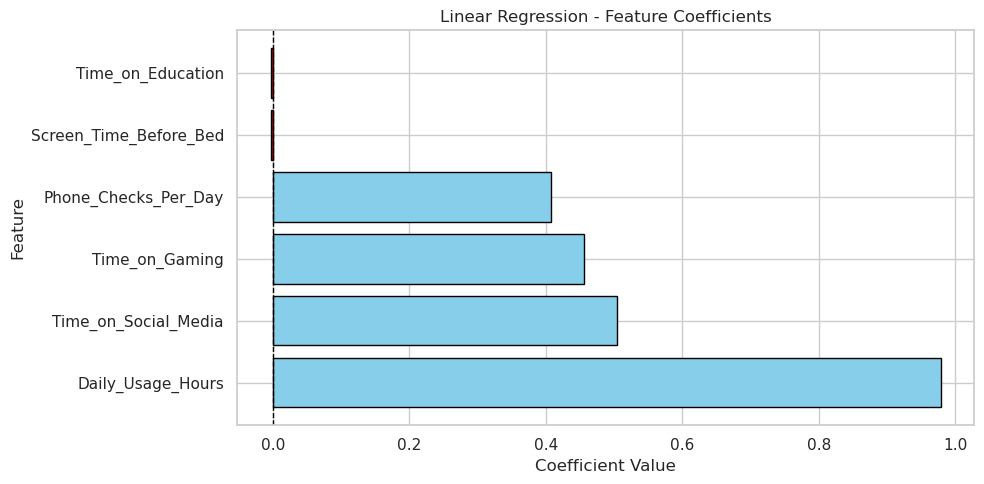

In [48]:
# Biểu đồ Coefficients
plt.figure(figsize=(10, 5))
# Màu theo dấu hệ số (âm = đỏ, dương = xanh)
colors = ['red' if c < 0 else 'skyblue' for c in coef_df["Coefficient"]]
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color=colors, edgecolor='black')
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # đường mốc 0
plt.title("Linear Regression - Feature Coefficients", fontsize=12)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### 4.6.3.1. Kết quả và Nhận xét

**1. Kết quả đánh giá mô hình Linear Regression**

Metrics trên tập test:
- MAE  (Mean Absolute Error):          0.7999
- RMSE (Root Mean Squared Error):      1.0040
- R^2  (Coefficient of Determination): 0.5999  

**Nhận xét**: 
- R^2 = 0.60 -> mô hình giải thích ~60% phương sai của mức độ nghiện (Addiction_Level).
- MAE = 0.80 -> Sai số trung bình dự đoán lệch khoảng ±0.8 điểm.
- RMSE = 1.00 > MAE -> có vài dự đoán lệch lớn hơn bình thường.
- Với sai số ~8%, mô hình có độ chính xác chấp nhận được cho dự đoán sơ bộ.  

**2. Phân tích hệ số**

Top 3 Feature ảnh hưởng mạnh nhất:

| Feature             | Coefficient | Ảnh hưởng      | 
|---------------------|-------------|----------------|
|Daily_Usage_Hours    |   0.9784    |Tăng 1 đơn vị -> Addiction Level tăng 0.9784  |
|Time_on_Social_Media |   0.5036    |Tăng 1 đơn vị -> Addiction Level tăng 0.5036  |
|Time_on_Gaming       |   0.4557    |Tăng 1 đơn vị -> Addiction Level tăng 0.4557   |

**Lưu ý:** Do features đã standardized (mean=0, std=1), coefficients thể hiện tác động khi tăng 1 **độ lệch chuẩn** (standard deviation), không phải 1 giờ.   

**Nhận xét**:
- Screen_Time_Before_Bed và Time_on_Education: Gần như không ảnh hưởng nhiều và không phản ánh mức độ nghiện điện thoại hằng ngày.
- Daily_Usage_Hours trong đó Time_on_Social_Media, Time_on_Gaming, Phone_Checks_Per_Day: là những hành vi hằng ngày phản ánh rõ nhất mức độ nghiện điện thoại -> tăng 1 đơn vị sẽ làm tăng mức độ nghiện tương ứng với hệ số.
- Intercept (bias) = 8.8823 -> Giá trị addiction dự đoán khi tất cả features ở mức trung bình (= 0 sau standardization).

**3. Đồ thị trực quan**

**Linear Regression Coefficients (Horizontal Bar Chart)**:
- Màu xanh: hệ số dương -> những hành vi có thể dễ nhận biết và làm tăng mức độ nghiện.
- Màu đỏ: hệ số âm -> những hành vi khó có thể nhận biết về mức độ nghiện.
- Thanh dài nhất: Daily_Usage_Hours -> ảnh hưởng lớn nhất.
- Ý nghĩa: Biểu đồ trực quan hóa mức độ ảnh hưởng của từng hành vi tới Addiction Level.

**4. Kết luận từ mô hình Linear Regression**:
- **Daily_Usage_Hours** là yếu tố ảnh hưởng và phản ảnh rõ nhất đến mức độ nghiện:
   - Daily_Usage_Hours có hệ số cao so với các features khác  
- **Nội dung sử dụng** ảnh hưởng và phản ánh rõ đến mức độ nghiện: 
   - Social Media và Gaming có hệ số tương đối cao là hành vi thể hiển rõ mức độ nghiện
   - Sử dụng cho Education không làm tăng mức độ nghiện  
- **Số lần check phone** cũng là chỉ báo tốt
   - Phone_Checks_Per_Day có correlation với addiction  
- Biểu đồ hệ số giúp nhận diện hành vi nào cần can thiệp để giảm mức độ nghiện: chủ yếu hạn chế thời gian sử dụng điện thoại, mạng xã hội và chơi game.

**5. Khuyến nghị dựa trên mô hình**:
- Giảm số giờ sử dụng điện thoại hàng ngày.
- Giới hạn thời gian chơi game và mạng xã hội.
- Dùng điện thoại với các mục đích phù hợp chứ không sử dụng một cách mất kiểm soát.  

**6. Lưu ý về model**:
- Mô hình Linear Regression với 6 feature hành vi hàng ngày dự đoán mức độ nghiện điện thoại đạt R^2 ~ 0.60, nghĩa là giải thích được khoảng 60% biến thiên của Addiction_Level. Sai số trung bình MAE ~ 0.8 (trên thang 0–10) cho thấy mô hình dự đoán lệch trung bình ±0.8 điểm.  
- Điều này chứng tỏ:  
   + Mô hình có khả năng dự đoán sơ bộ mức độ nghiện dựa trên hành vi hàng ngày.
   + Tuy nhiên, 40% phương sai còn lại chưa được giải thích, có thể do các yếu tố tâm lý, xã hội, môi trường, hoặc các hành vi khác chưa đưa vào mô hình.
   + Mô hình đúng trong phạm vi các feature đã chọn (các hành vi sử dụng điện thoại hằng ngày).

### Random Forest Regression:

In [49]:
# Import cần thiết cho model
from sklearn.ensemble import RandomForestRegressor

In [50]:
# Khởi tạo mô hình Random Forest với các hyperparameter tối ưu
rf = RandomForestRegressor( 
    n_estimators=100,    # số cây
    max_depth=10,        # độ sâu tối đa của mỗi cây
    min_samples_split=5, # Số mẫu tối thiểu để tách node
    min_samples_leaf=2,  # Số mẫu tối thiểu ở mỗi lá
    random_state=42,     # tái lập kết quả
    n_jobs=-1            # Dùng toàn bộ CPU để train nhanh nhất
)

# Huấn luyện mô hình Random Forest trên dữ liệu train
rf.fit(X_train, y_train)

# Dự đoán giá trị Addiction_Level cho tập test
y_pred_rf = rf.predict(X_test)

# Sai số tuyệt đối TB
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Căn bậc hai MSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Hệ số R^2
r2_rf = r2_score(y_test, y_pred_rf)

print("======KẾT QUẢ MÔ HÌNH RANDOM FOREST REGRESSION======")
print(f"MAE  (Mean Absolute Error):      {mae_rf:.4f}")
print(f"RMSE (Root Mean Squared Error):  {rmse_rf:.4f}")
print(f"R²   (Coefficient of Determination): {r2_rf:.4f}")


======KẾT QUẢ MÔ HÌNH RANDOM FOREST REGRESSION======
MAE  (Mean Absolute Error):      0.5575
RMSE (Root Mean Squared Error):  0.8494
R²   (Coefficient of Determination): 0.7136


In [51]:
# Phân tích độ quan trọng của từng feature

# Mức ảnh hưởng của từng feature
importance = rf.feature_importances_

# Tạo bảng DataFrame
fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance,
    "Importance_Pct": importance * 100
}).sort_values("Importance", ascending=False)

# Reset index
fi_df = fi_df.reset_index(drop=True)
fi_df.index = fi_df.index + 1

print("\nFeature Importance Rankings:")
print(fi_df.to_string())

# In top 3
print(f"\nTop 3 Most Important Features:")
top_3 = fi_df.head(3)
for idx, row in top_3.iterrows():
    print(f"   #{idx}. {row['Feature']}: {row['Importance_Pct']:.2f}%")



Feature Importance Rankings:
                  Feature  Importance  Importance_Pct
1       Daily_Usage_Hours    0.486749       48.674917
2          Time_on_Gaming    0.163112       16.311228
3    Time_on_Social_Media    0.162353       16.235315
4    Phone_Checks_Per_Day    0.136791       13.679102
5       Time_on_Education    0.026714        2.671417
6  Screen_Time_Before_Bed    0.024280        2.428022

Top 3 Most Important Features:
   #1. Daily_Usage_Hours: 48.67%
   #2. Time_on_Gaming: 16.31%
   #3. Time_on_Social_Media: 16.24%


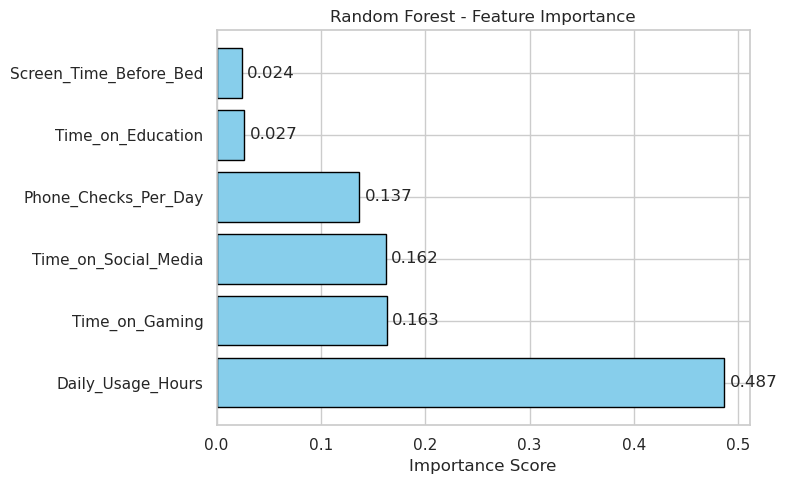

In [52]:
# Biểu đồ
plt.barh(fi_df['Feature'], fi_df['Importance'], color='skyblue', edgecolor='black')
for i, val in enumerate(fi_df['Importance']):
    plt.text(val + 0.005, i, f"{val:.3f}", va='center')
plt.xlabel("Importance Score")
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()

#### 4.6.3.2. Kết quả và Nhận xét

**1. Kết quả đánh giá mô hình Random Forest Regression**

Metrics trên tập test:
- MAE  (Mean Absolute Error):          0.5569
- RMSE (Root Mean Squared Error):      0.8491
- R^2  (Coefficient of Determination): 0.7138

**Nhận xét**: 
- R^2 = 0.71 -> mô hình giải thích ~71% phương sai của mức độ nghiện (Addiction_Level).
- MAE = 0.56 -> sai số trung bình dự đoán lệch khoảng ±0.56 điểm.
- RMSE < 1.0 -> phần lớn dự đoán sai < 1 điểm
- Random Forest là mô hình phi tuyến, có thể bắt được các mối quan hệ phức tạp giữa hành vi hằng ngày và mức độ nghiện điện thoại.

**2. Phân tích độ quan trọng của các feature**

Mức độ ảnh hưởng của các feature: 

| Feature               | Importance (%) | 
|-----------------------|----------------|
|Daily_Usage_Hours      |    48.68       |
|Time_on_Gaming         |    16.31       |
|Time_on_Social_Media   |    16.24       |
|Phone_Checks_Per_Day   |    13.7        |
|Time_on_Education      |    2.7         |
|Screen_Time_Before_Bed |    2.4         |

**Nhận xét**:
- Daily_Usage_Hours là hành vi phản ánh rõ nhất mức độ nghiện (~48.68%).
- Time_on_Gaming ảnh hưởng đáng kể đến mức độ nghiện (~16.3%).
- Time_on_Social_Media cũng ảnh hưởng đáng kể đến mức độ nghiện (~16.2%).
- Phone_Checks_Per_Day có mức độ quan trọng trung bình (~13.7%).
- Time_on_Education và Screen_Time_Before_Bed ít ảnh hưởng(<3%).

**3. Đồ thị trực quan**

**Feature Importance (Horizontal Bar Chart)**:
- Thanh dài nhất: Daily_Usage_Hours dài gần gấp 3 lần các thanh khác -> ảnh hưởng nhất nhất.
- Trong đó các thanh còn lại giảm dần theo thứ tự: Time_on_Gaming, Time_on_Social_Media, Phone_Checks_Per_Day, Time_on_Education, Screen_Time_Before_Bed.
- Ý nghĩa: Biểu đồ giúp trực quan nhận biết hành vi nào cần ưu tiên trong can thiệp.

**4. Kết luận từ mô hình Random Forest Regression**:
- Các hành vi hằng ngày giúp nhận diện mức độ nghiện điện thoại:
    + Quan trọng nhất: Daily_Usage_Hours.
    + Trong đó, quan trọng trung bình: Time_on_Gaming, Time_on_Social_Media, Phone_Checks_Per_Day.
    + Ít quan trọng: Time_on_Education, Screen_Time_Before_Bed. 
- Lưu ý: Mô hình phi tuyến bắt được mối quan hệ phức tạp hơn, nhưng không cho biết chiều tác động.  

**5. Khuyến nghị dựa trên mô hình**:
- Dựa trên các feature quan trọng nên ưu tiên giảm số giờ sử dụng điện thoại hàng ngày.
- Giới hạn thời gian chơi game và mạng xã hội.
- Dùng điện thoại với các mục đích phù hợp chứ không sử dụng một cách mất kiểm soát.  

**6. Lưu ý về model**:
- Mô hình Random Forest với 6 feature hành vi hàng ngày dự đoán mức độ nghiện điện thoại đạt R^2 ~ 0.71, nghĩa là giải thích được khoảng 71% biến thiên của Addiction_Level. Sai số trung bình MAE ~ 0.56 (trên thang 0–10) cho thấy mô hình dự đoán lệch trung bình ±0.56 điểm.
- Điều này chứng tỏ:  
    + Mô hình có khả năng dự đoán sơ bộ mức độ nghiện dựa trên hành vi hàng ngày.
    + 29% phương sai còn lại chưa được giải thích, có thể do các yếu tố tâm lý, xã hội, môi trường, hoặc các hành vi khác chưa đưa vào mô hình.
    + Mô hình đúng trong phạm vi các feature đã chọn phù hợp để trả lời câu hỏi.
 



#### Trả lời câu hỏi:

**Trả lời câu hỏi nghiên cứu**: Có thể dự đoán mức độ nghiện điện thoại của thiếu niên dựa trên các đặc điểm hành vi sử dụng hàng ngày hay không?  

**Trả lời**: Dựa vào kết quả của 2 model cho thấy có thể dự đoán mức độ nghiện điện thoại của thiếu niên dựa trên các đặc điểm hành vi sử dụng hàng ngày.
 - Linear Regression đã chứng minh rằng 6 hành vi sử dụng điện thoại hàng ngày có khả năng dự đoán mức độ nghiện với R^2 = 0.5999 (giải thích ~60% phương sai).
 - Random Forest Regression đã chứng minh rằng 6 hành vi sử dụng điện thoại hàng ngày có khả năng dự đoán mức độ nghiện với R^2 = 0.71 (giải thích ~71% phương sai).

In [53]:
# So sánh 2 model 

# Tạo DataFrame so sánh metrics của 2 mô hình
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R^2': [r2_lr, r2_rf]
})

print("\n=== Model Performance Comparison ===")
print(comparison.to_string(index=False))

# Tính phần trăm cải thiện của Random Forest so với Linear Regression

# MAE, RMSE càng thấp càng tốt -> % giảm
mae_improve = ((mae_lr - mae_rf) / mae_lr) * 100
rmse_improve = ((rmse_lr - rmse_rf) / rmse_lr) * 100

# R^2 càng cao càng tốt -> % tăng
r2_improve = ((r2_rf - r2_lr) / r2_lr) * 100

print(f"\n=== Random Forest vs Linear Regression Improvements ===")
print(f"MAE  improvement: {mae_improve:+.1f}% (lower is better)")
print(f"RMSE improvement: {rmse_improve:+.1f}% (lower is better)")
print(f"R^2   improvement: {r2_improve:+.1f}% (higher is better)")



=== Model Performance Comparison ===
            Model      MAE     RMSE      R^2
Linear Regression 0.799859 1.004029 0.599861
    Random Forest 0.557487 0.849377 0.713635

=== Random Forest vs Linear Regression Improvements ===
MAE  improvement: +30.3% (lower is better)
RMSE improvement: +15.4% (lower is better)
R^2   improvement: +19.0% (higher is better)


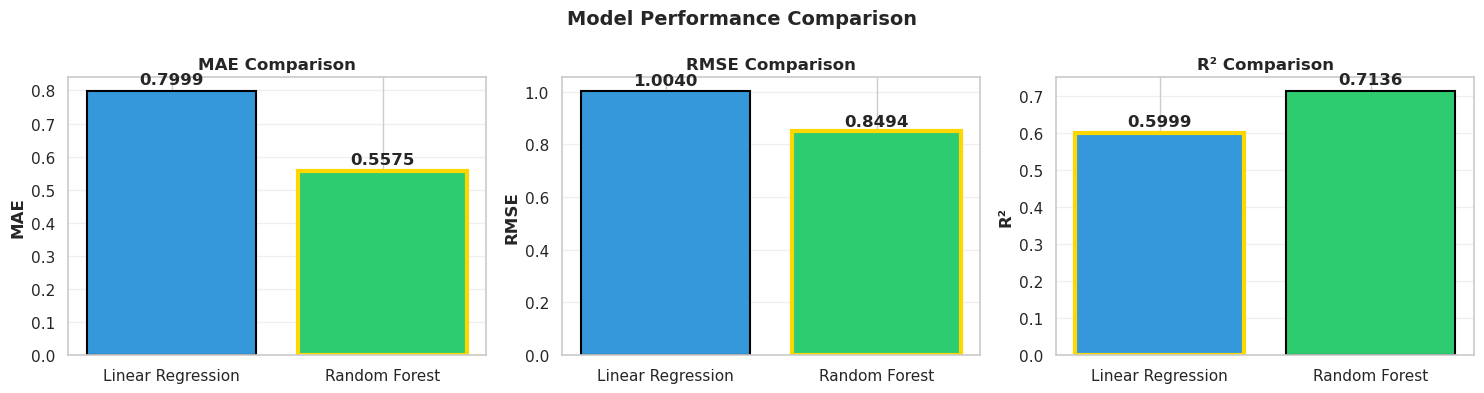

In [54]:
models = ['Linear Regression', 'Random Forest']
metrics = ['MAE', 'RMSE', 'R²']
values = [
    [mae_lr, mae_rf],
    [rmse_lr, rmse_rf],
    [r2_lr, r2_rf]
]
colors = ['#3498db', '#2ecc71']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 cột

for i, metric in enumerate(metrics):
    axes[i].bar(models, values[i], color=colors, edgecolor='black', linewidth=1.5)
    
    # in giá trị lên trên bar
    for j, val in enumerate(values[i]):
        axes[i].text(j, val + 0.01, f'{val:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # highlight winner
    if metric == 'R^2':
        best_idx = np.argmax(values[i])
    else:
        best_idx = np.argmin(values[i])
    axes[i].patches[best_idx].set_edgecolor('gold')
    axes[i].patches[best_idx].set_linewidth(3)
    
    axes[i].set_ylabel(metric, fontweight='bold')
    axes[i].set_title(f'{metric} Comparison', fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


#### So sánh Linear Regression vs Random Forest Regression:  

| Metric | Linear Regression | Random Forest | Improvement |
|--------|-------------------|---------------|-------------|
| MAE    | 0.7999            | 0.5569        | **-30.4%**  |
| RMSE   | 1.0040            | 0.8491        | **-15.4%**  |
| R²     | 0.5999            | 0.7138        | **+19.0%**  |

**Nhận xét:**
- Random Forest Regression vượt trội hơn Linear Regression về mọi metric.
- Linear Regression hữu ích khi cần phân tích tác động của từng hành vi.

**Random Forest Regression tốt hơn vì**:
- Dự đoán linh hoạt hơn:  
    + Linear Regression giả định mối quan hệ tuyến tính: tăng 2× usage -> tăng 2× addiction.
    + Random Forest linh hoạt hơn, có thể dự đoán mức độ nghiện tăng không theo tỉ lệ cố định, ví dụ 10h/ngày có thể gây nghiện nhiều hơn gấp 2 lần so với 5h.
- Nhận diện hiệu ứng kết hợp giữa các hành vi:  
    + Một người vừa chơi game nhiều, vừa dùng mạng xã hội nhiều -> mức độ nghiện cao hơn mức dự đoán riêng lẻ từng hành vi.
    + Linear Regression khó nắm được hiệu ứng này, còn Random Forest có thể phát hiện.
- Ổn định với dữ liệu bất thường:  
    + Nếu có vài cá nhân sử dụng điện thoại cực nhiều -> Linear Regression dễ bị ảnh hưởng, dự đoán lệch.
    + Random Forest trung bình dự đoán từ nhiều cây, nên ít bị ảnh hưởng bởi những trường hợp đặc biệt.

**So sánh Feature Importance vs Coefficients**

| Feature                | LR Coefficient | RF Importance | Agreement |
|------------------------|----------------|---------------|------------|
| Daily_Usage_Hours      | 0.98 (1st)     | 48.7% (1st)   |  Đồng nhất |
| Time_on_Social_Media   | 0.50 (2nd)     | 16.2% (3rd)   | Đều cao   |
| Time_on_Gaming         | 0.46 (3rd)     | 16.3% (2nd)   | Đều cao   |
| Phone_Checks_Per_Day   | 0.41 (4th)     | 13.7% (4th)   | Đồng nhất |

**Nhận xét**:   
- **Cả 2 models đồng ý:** Daily_Usage_Hours là predictor mạnh nhất.
- Linear Regression cho thấy **Time_on_Social_Media > Time_on_Gaming** (~0,04 điểm): tức là theo LR, tăng 1 giờ dùng mạng xã hội có ảnh hưởng lớn hơn 1 giờ chơi game, vì LR chỉ đo tác động tuyến tính riêng rẽ của từng feature.
- Random Forest cho thấy **Time_on_Gaming > Time_on_Social_Media** (~0,1): tức là RF nhận ra chơi game có thể ảnh hưởng mạnh hơn khi xét tổng hợp toàn bộ dữ liệu, vì RF tính trung bình tác động của feature qua nhiều cây và node, bao gồm cả các tình huống mà Gaming kết hợp với các hành vi khác.
- **Ý nghĩa**: LR xem từng hành vi riêng lẻ, còn RF “nhìn tổng thể” và nhận ra rằng mức độ nghiện thường bị ảnh hưởng mạnh hơn bởi chơi game, đặc biệt khi kết hợp với các hành vi khác.
    
**Ưu/Nhược điểm tổng quát của 2 models:**
- Linear Regression:
    + Ưu điểm: dễ hiểu, giải thích được chiều tác động của từng feature, nhanh.
    + Nhược điểm: không nắm được mối quan hệ phi tuyến và hiệu ứng kết hợp, nhạy với outliers.
- Random Forest Regression:
    + Ưu điểm: linh hoạt, bắt được phi tuyến, nắm được tương tác giữa các feature, ổn định với dữ liệu bất thường.
    + Nhược điểm: khó diễn giải chiều tác động, tốn thời gian tính toán hơn.



## **5. Project Summary**

### **5.1. Những phát hiện quan trọng**

- **Dataset chất lượng cao**:    
    + 3000 rows × 25 columns, không missing values, chỉ một số outliers hợp lý (`Daily_Usage_Hours`, `Addiction_Level`), phản ánh đúng thực tế và không phải lỗi nhập liệu.
    + Dataset có 96 outliers cho `Addiction_Level` (IQR) và 42 outliers (Z-score), chủ yếu là các mức nghiện thấp (<5).
    + Cho phép tiến hành phân tích và xây dựng mô hình đáng tin cậy mà không cần xử lý dữ liệu thiếu.
- **Mô hình xây dựng trên 6 features chính (dự đoán Addiction_Level thông qua các hành vi dùng điện thoại hằng ngày)**:
    + `Daily_Usage_Hours`, `Time_on_Gaming`, `Time_on_Social_Media`, `Phone_Checks_Per_Day`, `Sleep_Hours`, `Exercise_Hours`.
    + Giải thích: lựa chọn 6 biến này giúp tập trung vào các hành vi quan trọng nhất để dự đoán `Addiction_Level`. Do đó, R^2 có thể không đạt tuyệt đối cao như khi dùng tất cả 25 biến, nhưng giá trị này phản ánh chính xác mức độ giải thích của các hành vi  quan trọng, và dự đoán vẫn đáng tin cậy.
- **Ảnh hưởng có các features đến mức độ nghiện( Addiction_Level)**:
    + **Daily_Usage_Hours** là predictor mạnh nhất dựa vào hành vi sử dụng điện thoại hằng ngày theo cả Linear Regression (Coefficient = 0.98) và Random Forest (Importance = 48.7%).
    + Trong đó, `Time_on_Gaming`, `Time_on_Social_Media`, `Phone_Checks_Per_Day` là những biểu hiện phản ảnh rõ nhất.
- **So sánh hiệu suất các mô hình**:
   + Random Forest Regression vượt trội hơn Linear Regression trên mọi metric:
       + MAE: 0.5569 (RF) vs 0.7999 (LR) -> giảm ~30.4%.
       + RMSE: 0.8491 (RF) vs 1.0040 (LR) -> giảm ~15.4%.
       + R^2: 0.7138 (RF) vs 0.5999 (LR) -> tăng ~19.0%.
   + RF bắt được quan hệ phi tuyến, ổn định với outliers.
   + LR hữu ích để hiểu tác động riêng lẻ.
- **Nhận diện hiệu ứng kết hợp giữa các hành vi**:
    + Linear Regression đánh giá tác động riêng lẻ: `Time_on_Social_Media` (0.50) > `Time_on_Gaming` (0.46).
    + Random Forest cho thấy Gaming (16.3%) > Social Media (16.2%) về ảnh hưởng tổng thể.
    + Ý nghĩa: Mức độ nghiện thường bị tăng lên khi thời gian sử dụng điện thoại hằng ngày tăng lên trong đó thời gian chơi game và thời gian dùng mạng xã hội nhiều là biểu hiện được thể hiện rõ nhất.
- **Insight tổng thể**:
    + `Daily_Usage_Hours` là yếu tố quan trọng nhất để dự đoán Addic`tion_Level.  
    + Trong đó, `Time_on_Gaming` có thể gây nghiện mạnh hơn khi xét tổng thể hành vi, đặc biệt kết hợp với `Time_on_Social_Media`.
    + Random Forest là mô hình phù hợp khi muốn dự đoán chính xác và nắm bắt các tương tác phức tạp giữa các hành vi, trong khi Linear Regression vẫn hữu ích để hiểu tác động riêng lẻ của từng biến.
    
### **5.2. Những giới hạn**

- **Giới hạn của bộ dữ liệu:**  
  + Sample size 3000 là vừa đủ nhưng còn hạn chế cho phân tích nhóm (giới tính, khu vực, trường học).  
  + Một số biến được tự báo cáo (self-reported), có thể tồn tại bias về cách ghi nhận thời gian sử dụng và mức độ nghiện.  
  + Dataset đã tương đối sạch, nên thiếu đa dạng về dữ liệu thô với noise thực tế.
- **Giới hạn của phần phân tích:**  
  + Mô hình ML chỉ dùng 6 features chính (dựa trên các hành vi biểu hiển quan trọng hằng ngày để dự đoán Addiction_Level); R² không đạt tuyệt đối nhưng vẫn phản ánh tốt các hành vi quan trọng.  
  + Linear Regression chỉ đánh giá tác động tuyến tính riêng lẻ; Random Forest Regression khó diễn giải chiều tác động từng biến. 
  + Một số tương tác phi tuyến phức tạp có thể chưa được khám phá đầy đủ.
- **Giới hạn phạm vi:**  
  + Không phân tích thay đổi theo thời gian (cross-sectional data).  
  + Không phân tích chi tiết theo nhóm nhỏ (tuổi, giới tính, khu vực) vì sample size hạn chế còn khá hạn chế.
  + Một số câu hỏi sức khỏe tâm thần chỉ dựa trên self-report, chưa đo lường trực tiếp.

### **5.3. Hướng phát triển trong tương lai**

- **Khám phá thêm các câu hỏi**:
    + Mối quan hệ giữa hành vi sử dụng điện thoại và các yếu tố tâm lý xã hội theo nhóm nhỏ (giới tính, khu vực, nhóm tuổi).
     + Xu hướng thay đổi hành vi và mức độ nghiện điện thoại theo thời gian.
    + Nghiên cứu yếu tố bảo vệ giúp giảm nguy cơ nghiện, ví dụ: vận động thể chất, giao tiếp gia đình, hoạt động ngoại khóa.
    + Tác động của các yếu tố môi trường (trường học, bạn bè, hoạt động ngoại khóa) đến mức độ nghiện điện thoại.
- **Phân tích sâu hơn**:
    + Khám phá các tương tác phi tuyến giữa nhiều biến hành vi với các chỉ số sức khỏe tâm thần.
    + Phân tích đa chiều: kết hợp hành vi, tâm lý và sinh hoạt hằng ngày để xây dựng profile rủi ro tổng hợp.
- **Thử các phương pháp hoặc mô hình khác**:
    + Sử dụng ensemble models Gradient Boosting (XGBoost, LightGBM) để so sánh với 2 models hiện tại.
- **Cải thiện dữ liệu và dự đoán**:
    + Thu thập dữ liệu thực tế và theo dõi cập nhật dữ liệu theo thời gian.
- **Ứng dụng thực tế**:
    + Xây dựng mô hình dự đoán nhóm nguy cơ cao để hỗ trợ can thiệp sớm.
    + Thiết kế các khuyến nghị đơn giản dựa trên các hành vi quan trọng nhất (`Daily_Usage_Hours`, `Time_on_Gaming`, `Time_on_Social_Media`).
    

### **5.4. Những ý kiến cá nhân**

#### **5.4.1. Ý kiến của Huỳnh Yến Nhi - 23120151**
- **Những thách thức và khó khăn gặp phải**:  
    + ***Những trở ngại gặp phải:***
        + Hầu hết các hệ số tương quan giữa các biến đều rất thấp (gần bằng 0), khiến em lo lắng không biết có đang làm sai hay không.
        + Kết quả phân tích thường trái ngược với giả thuyết ban đầu (ví dụ: nhóm nghiện cao lại có học lực tốt hơn).
        + Biến Addiction_Level phân bố quá lệch (67% tập trung ở 8.7-10), không thể phân nhóm Low/Medium/High như dự định.
    + ***Cách giải quyết vấn đề:*** 
        + Thừa nhận và phân tích thẳng thắn hạn chế của dataset, chấp nhận kết quả không có mối liên hệ khi bằng chứng thống kê không đủ mạnh.
        + Khi kết quả trái ngược, nhóm không bác bỏ lý thuyết mà đưa ra các giả thuyết giải thích liên quan đến chất lượng dữ liệu và phương pháp thu thập.
        + Báo cáo trung thực kết quả và phân tích nguyên nhân có thể, đồng thời bổ sung khuyến nghị dựa trên nghiên cứu khoa học bên ngoài.
    + ***Khía cạnh khó khăn nhất:***  
        + Cân bằng giữa việc báo cáo trung thực kết quả không có tương quan đáng kể và việc cung cấp insight có giá trị cho người đọc.
        + Giải thích tại sao kết quả lại khác biệt nhiều so với các nghiên cứu trước đây mà không làm mất tính khách quan.
- **Học tập & Phát triển**:  
    + ***Điều em đã học được:***
        + Học cách áp dụng quy trình phân tích có hệ thống và kết hợp nhiều phương pháp để xác nhận kết quả.
        + Hiểu được cách sử dụng các loại biểu đồ phù hợp cho từng mục đích phân tích.
        + Tư duy phản biện với dữ liệu, không mặc định dữ liệu đúng, phải luôn đặt câu hỏi về chất lượng, phân bố và nguồn gốc dữ liệu.
    + ***Điều làm em bất ngờ:*** 
        + Nhiều yếu tố được cho là quan trọng lại không thể hiện tác động trong dataset, gần như không có mối quan hệ đáng kể giữa các biến trong tất cả 5 câu hỏi nghiên cứu.
        + Một số kết quả đi ngược kì vọng, như nhóm nghiện cao lại có `Academic_Performance` cao hơn một chút, cho thấy dữ liệu khảo sát không phải lúc nào cũng phản ánh đúng thực tế.
        + `Sleep_Hours` là yếu tố duy nhất cho thấy sự khác biệt rõ ràng giữa nhóm nghiện thấp và cao.
    + ***Đồ án đã thay đổi cách nhìn về Data Science:*** 
        + Nhận ra rằng Data Science không chỉ là tìm pattern và correlation mạnh, mà còn là xác định khi nào dữ liệu không đủ tốt.
        + Học được tầm quan trọng của việc trung thực với dữ liệu thay vì cố gắng tìm ra những mối liên hệ không tồn tại.

#### **5.4.2. Ý kiến của Hồ Khổng Tuyết Như - 2312152**
- **Những thách thức và khó khăn gặp phải**:  
    + ***Những trở ngại gặp phải:***
        + Khó khăn trong việc chọn các features quan trọng để giúp dự đoán mức độ nghiện điện thoại thông qua hành vi xử dụng điện thoại hằng ngày mà vẫn tránh overfitting, thấy lo lắng khi R^2 không cao nhưng lúc đầu tưởng tượng.
        + Khó khăn trong việc chọn models thực hiện.
        + Tìm hiểu và so sánh kết quả giữa Linear Regression và Random Forest, đặc biệt về coefficient, feature importance, và ảnh hưởng của outliers.  
      + Diễn giải kết quả mô hình sao cho dễ hiểu.
    + ***Cách giải quyết vấn đề:*** 
      + Tìm hiều và tham khảo nhiều nguồn về Linear Regression và Random Forest.
      + Thử nhiều cách trình bày kết quả để vừa thuyết phục vừa dễ hiểu.  
    - ***Khía cạnh khó khăn nhất:***  
      + Trong việc chọn models và lo lắng khi thấy R^2 không cao như tưởng tượng. Sau đó nhận ra lí do và tìm cách giải thích vì sao dùng 6 features mà R^2 thấp hơn so với dùng tất cả biến, nhưng dự đoán vẫn đáng tin cậy.
- **Học tập & Phát triển**:  
    + ***Điều em đã học được:***
        + Được thực hành nhiều, do đó học được thêm và hiểu hơn về Python.  
        + Có kinh nghiệm hơn trong việc chọn features quan trọng, cách đánh giá và so sánh mô hình ML. 
        + Kỹ năng trình bày kết quả phân tích dữ liệu và mô hình sao cho súc tích và dễ hiểu.  
    + ***Điều làm em bất ngờ:*** 
        + Mức độ ảnh hưởng của `Daily_Usage_Hours` lớn nhất trong đó `Time_on_Gaming` và `Time_on_Social_Media` là những biểu hiển rõ nhất. Nhận ra bản thân cũng là một người đang có nguy cơ hoặc đã nghiện điện thoại.
    + ***Đồ án đã thay đổi cách nhìn về Data Science:***  
        + Hiểu được quy trình thực hiện từ exploring -> preprocessing -> feature selection -> model building -> result interpretation.  
        + Nhận ra tầm quan trọng của domain knowledge để chọn feature và giải thích insight từ mô hình ML.

#### **5.4.3. Ý kiến của Trần Thị Thủy Tiên - 23120172**
- **Những thách thức và khó khăn gặp phải**:  
    + ***Những trở ngại gặp phải:***
        + Bộ dữ liệu quá sạch khiến các bước preprocessing phổ biến như xử lý missing values, làm sạch dữ liệu, chuẩn hóa category gần như không cần thực hiện.
        + khi phân tích mối quan hệ giữa các biến, tương quan giữa các biến nhìn chung rất thấp.
        + Nhiều giả định ban đầu dựa trên trực giác (ví dụ: nghiện điện thoại ảnh hưởng mạnh đến học tập, giấc ngủ, sức khỏe tâm thần) không được phản ánh rõ ràng trong dữ liệu.
    + ***Cách giải quyết vấn đề:*** Thay vì cố ép các bước preprocessing không cần thiết, nhóm đã thay đổi cách tiếp cận
      + Chấp nhận đặc điểm của dữ liệu, coi việc dataset sạch là một thuộc tính của dữ liệu, không phải là thiếu sót của quá trình phân tích.
      + Chuyển trọng tâm từ làm sạch dữ liệu sang đánh giá chất lượng và giới hạn của dữ liệu.
    - ***Khía cạnh khó khăn nhất:***  
      + Em thắc mắc làm sao để rút ra insight có giá trị khi dữ liệu không cho thấy các mối quan hệ mạnh cũng như làm sao để trình bày kết quả trên một cách khoa học, hợp lý vì bộ dataset này không quá nhấn mạnh các vấn đề dẫn đến việc nghiện điện thoại.
- **Học tập & Phát triển**:  
    + ***Điều em đã học được:***
        + Không phải dataset nào cũng bẩn để áp dụng đầy đủ preprocessing. Data Exploration không chỉ để tìm lỗi, mà còn để hiểu giới hạn của dữ liệu.
        + Hành vi và sức khỏe tâm thần của con người là các hiện tượng phức tạp, khó phản ánh đầy đủ bằng dữ liệu khảo sát đơn giản. 
    + ***Điều làm em bất ngờ:*** 
        + Nhiều biến được kỳ vọng có ảnh hưởng mạnh (như giấc ngủ, học tập, lo âu, trầm cảm) lại không thể hiện mối quan hệ rõ ràng với mức độ nghiện điện thoại trong bộ dữ liệu này.
        + Điều này cho thấy trực giác hoặc định kiến xã hội không phải lúc nào cũng được dữ liệu ủng hộ, và dữ liệu cần được phân tích một cách khách quan.
    + ***Đồ án đã thay đổi cách nhìn về Data Science:***  
        + Dự án này giúp em nhận ra rằng Data Science không chỉ là làm sạch dữ liệu hay tìm ra các mối tương quan mạnh, mà còn là quá trình hiểu rõ giới hạn của dữ liệu, đặt câu hỏi phù hợp và diễn giải kết quả một cách trung thực. Ngay cả khi dữ liệu sạch và tương quan thấp, việc phân tích cẩn thận vẫn mang lại những insight có ý nghĩa.